In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import copy
import pandas as pd
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


sns.set_context('paper',font_scale=1.5)

In [2]:
import os
os.chdir('./results/')

In [3]:
os.getcwd()

'/Users/tima/Desktop/pastel2.0/results'

In [4]:
class Plot_Arguments():
    def __init__(self):
        self.epochs = 100
        self.legends = ["Main task - Black box", "Main task - Model Replacement", "Attack success rate - black box",
                        "Attack success rate - model replacement"]
        self.maxy = 110
        self.ylabel = 'Accuracy (%)'
        self.xlabel = 'FL rounds'
        self.colors = ['black',
                       '#339933',
                       '#fdae61',
                       '#d7191c', '#000000', '#B03A2E', '#85C1E9']
        self.patterns = ['x', 'o', 'd', 'v', '^', '<', '>']

In [5]:
import numpy as np

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
def generate_histogram(plot_config, experiment_name, y_label, column_name, min_y, max_y,file, average=False, display_err = True, extension="pdf", label_rotation=15, std=None, x_fontsize=None, bar_fontsize=15):

    labels = []
    colors = []
    values = []
    errs = []
    
    for exp in plot_config["data"]:
        labels.append(exp["exp_name"])
        colors.append(exp["color"])
        if exp["file_path"] is None:

            values.append(min_y)

            errs.append(0)
        else:
            if average:
                max_value, std_dev = get_max_average(exp["file_path"],column_name)
                values.append(max_value)
                errs.append(std_dev)
            else:
                values.append(get_max_avg_value(exp["file_path"],column_name))
                errs.append(get_std_dev_value(exp["file_path"], column_name))
        
    # the histogram of the data
    print(errs)
    plot_args = Plot_Arguments()
    if std == None:
        errs = None
        
    values = [round(x) for x in values]
    print("Labels")
    print(labels)
    print(values)
    print(errs)
    ax = sns.barplot(x = labels,y =values, palette='magma_r')
    

    plot_args.ylabel= y_label

    ax.set_ylabel(plot_args.ylabel, fontsize=17)
    
    ax.tick_params(labelrotation=label_rotation)
    
    if x_fontsize != None:
            ax.tick_params(labelsize=x_fontsize)


    num_locations = 1
    hatches = itertools.cycle(['/',  '-', '//', '\\', '', 'o', 'O', '.'])
    for i, bar in enumerate(ax.patches):
        if i % num_locations == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)

    for i in ax.containers:
        try:
            ax.bar_label(i,[np.round(z) if z != min_y else "N/A" for z in values], fontsize=bar_fontsize)

        except:
            pass
    
    new_value = 0.4
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
    ax.set(ylim=(min_y, max_y))
    ax.set_xlabel('')
    ax.set_title('')
    plt.savefig('{}/{}_{}.{}'.format(file,plot_config['dataset_name'], experiment_name, extension),bbox_inches='tight')

    plt.show()
    

In [6]:
def generate_manual_histogram(plot_config, experiment_name, y_label, column_name, min_y, max_y,file, average=False, display_err = True, extension="pdf", label_rotation=15, std=None, x_fontsize=None, bar_fontsize=14, values = []):

    labels = []
    colors = []

    errs = []
    
    for exp in plot_config["data"]:
        labels.append(exp["exp_name"])
        colors.append(exp["color"])
    # the histogram of the data
    print(errs)
    plot_args = Plot_Arguments()
    if std == None:
        errs = None
        
    values = [round(x) for x in values]
    print("Labels")
    print(labels)
    print(values)
    print(errs)
    ax = sns.barplot(x = labels,y =values, palette='magma_r')
    

    plot_args.ylabel= y_label

    ax.set_ylabel(plot_args.ylabel, fontsize=18)
    
    ax.tick_params(labelrotation=label_rotation)
    
    if x_fontsize != None:
            ax.tick_params(labelsize=x_fontsize)


    num_locations = 1
    hatches = itertools.cycle(['/',  '-', '//', '\\', '', 'o', 'O', '.'])
    for i, bar in enumerate(ax.patches):
        if i % num_locations == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)

    for i in ax.containers:
        try:
            ax.bar_label(i,[np.round(z) if z != min_y else "N/A" for z in values], fontsize=bar_fontsize)

        except:
            pass
    
    new_value = 0.4
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
    ax.set(ylim=(min_y, max_y))
    ax.set_xlabel('')
    ax.set_title('')
    plt.savefig('{}/{}_{}.{}'.format(file,plot_config['dataset_name'], experiment_name, extension),bbox_inches='tight')

    plt.show()

In [7]:
def generate_xy_plot(plot_config, experiment_name, y_label, column_name, min_y=0, max_y=100, min_x=0, max_x=100, average=False, extension='.pdf', markevery=5, max_range = None):
    
    labels = []
    colors = []
    values = []
    markers = []
    
    for exp in plot_config["data"]:
        
        if exp["file_path"] is None:
            continue
            
        labels.append(exp["exp_name"])
        colors.append(exp["color"])
        markers.append(exp["symbol"])
        if average:
            values.append(compute_average_per_round(exp["file_path"],column_name))
        else:
            values.append(get_max_avg_value(exp["file_path"],column_name))
    
    if max_range is not None : 
        for i in range(len(values)):
            values[i] = values[i][:max_range]
    plot_args = Plot_Arguments()
    fig, ax = plt.subplots()
    
    
    plot_args.ylabel= y_label
    
    

    x = range(1, len(values[0]) + 1)
    
    for i in range(len(labels)):
        print(labels[i])
        print(len(values[i]))
        ax.plot(x, values[i], color= colors[i] ,label=labels[i], linewidth=1, marker=markers[i], markersize=6, markevery=markevery+9*(i+1))
            
    plt.ylabel(plot_args.ylabel)
    plt.xlabel(plot_args.xlabel)
    change_width(ax, .2)
    # plt.subplots_adjust(top=0.75)
    lgd = ax.legend(ncol=5, loc='best')
    ax.set_xlim(1, len(values[0])+1)
    ax.set_ylim(min_y, max_y)
    ax.set_xlim(min_x, max_x)
    


    
    plt.savefig('./figures/{}_{}.{}'.format(plot_config['dataset_name'], experiment_name, extension),bbox_inches='tight')

    plt.show()
    

        

In [8]:
def generate_tradeoff_plot(plot_config, experiment_name, x_label, y_label, x_column_name, y_column_name, min_y, max_y, min_x, max_x,file, average=False, extension="pdf", max_round = None, markerscale=1.5, legend_fontsize=14):
    
    labels = []
    colors = []
    values = []
    markers = []
    x_values = []
    y_values = []
    
    for exp in plot_config["data"]:
        if exp["file_path"] is None:
            continue
        labels.append(exp["exp_name"])
        colors.append(exp["color"])
        markers.append(exp["symbol"])
        if average:
            

            x_values.append(get_max_average(exp["file_path"],x_column_name, max_round))
            y_values.append(get_max_average(exp["file_path"],y_column_name, max_round))

        else:
            x_values.append(get_max_avg_value(exp["file_path"],x_column_name))
            y_values.append(get_max_avg_value(exp["file_path"],y_column_name))

        
    
    x_axis = [x for (x,_) in x_values]
    y_axis = [x for (x,_) in y_values]
    plot_args = Plot_Arguments()
    fig, ax = plt.subplots()
    plot_args.xlabel = x_label
    plot_args.ylabel= y_label
    
    ax = sns.scatterplot(x=x_axis, y= y_axis, hue=labels, style=labels,s=200, palette='magma_r', markers=True)
    
#    for line in range(0,len(y_axis)):
#        ax.text(x_axis[line]*1.001, y_axis[line], "P = {}%\nU = {}%".format(str(round(y_axis[line],1)), str(round(x_axis[line],1))), horizontalalignment='left', 
#         size='medium', color='black')

    handles, labels  =  ax.get_legend_handles_labels()

    ax.legend(handles, labels,markerscale=markerscale, fontsize=legend_fontsize)

    ax.set_ylabel(y_label, fontsize=20)
    ax.set_xlabel(x_label, fontsize=20)
    ax.set(ylim=(min_y, max_y), xlim=( min_x, max_x))

    
#     for i, txt in enumerate(labels):
#         ax.annotate(txt, (x_values[i] + 2 , y_values[i] -1), fontsize=8)
    
    plt.savefig('{}/{}_{}.{}'.format(file,plot_config['dataset_name'], experiment_name, extension),bbox_inches='tight')
    print('{}/{}_{}.{}'.format(file,plot_config['dataset_name'], experiment_name, extension))
    plt.show()
    

In [9]:
def generate_tradeoff_manual_plot(plot_config, experiment_name, x_label, y_label, x_column_name, y_column_name, min_y, max_y, min_x, max_x, file,average=False, extension="pdf", max_round = None, markerscale=1.5, legend_fontsize=14, x_values=[], y_values=[]):
    
    labels = []
    colors = []
    values = []
    markers = []

    for exp in plot_config["data"]:
        if exp["file_path"] is None:
            continue
        labels.append(exp["exp_name"])
        colors.append(exp["color"])
        markers.append(exp["symbol"])

        
    
    x_axis = [x for x in x_values]
    y_axis = [x for x in y_values]
    plot_args = Plot_Arguments()
    fig, ax = plt.subplots()
    plot_args.xlabel = x_label
    plot_args.ylabel= y_label
    
    ax = sns.scatterplot(x=x_axis, y= y_axis, hue=labels, style=labels,s=200, palette='magma_r', markers=True)
    
#    for line in range(0,len(y_axis)):
#        ax.text(x_axis[line]*1.001, y_axis[line], "P = {}%\nU = {}%".format(str(round(y_axis[line],1)), str(round(x_axis[line],1))), horizontalalignment='left', 
#         size='medium', color='black')

    handles, labels  =  ax.get_legend_handles_labels()

    ax.legend(handles, labels,markerscale=markerscale, fontsize=legend_fontsize)

    ax.set_ylabel(y_label, fontsize=18)
    ax.set_xlabel(x_label, fontsize=18)
    ax.set(ylim=(min_y, max_y), xlim=( min_x, max_x))

    
#     for i, txt in enumerate(labels):
#         ax.annotate(txt, (x_values[i] + 2 , y_values[i] -1), fontsize=8)
    
    plt.savefig('{}/{}_{}.{}'.format(file,plot_config['dataset_name'], experiment_name, extension),bbox_inches='tight')

    plt.show()
    

In [10]:
def compute_average_per_round(file_path, column_name):
    data = pd.read_csv(file_path)
    columns_to_aggregate = data.columns[data.columns.str.contains(column_name)]
    columns_to_aggregate = [x for x in columns_to_aggregate if "per_epoch" not in x]

    values = data[columns_to_aggregate].mean(axis=1)
    return values.to_list()

def compute_average(file_path, column_name):
    return compute_average_per_round(file_path, column_name)[-1]
   
    
def get_max_average(file_path, column_name, max_round=None):
    data = pd.read_csv(file_path)
    columns_to_aggregate = data.columns[data.columns.str.contains(column_name)]
    columns_to_aggregate = [x for x in columns_to_aggregate if "per_epoch" not in x]
    print("Columns to aggregate")
    print(columns_to_aggregate)
    maxs = []
    for column in columns_to_aggregate:
        if max_round is not None:
            values = data[column].to_list()[:max_round]
            print(values)
        else:
            values = data[column].to_list()
        maxs.append(max(values[-10:]))
    print(maxs)
    
    if len(columns_to_aggregate)==1:
        std_dev = np.std([x for x in data[columns_to_aggregate[0]].to_list() if x!= 0])
    else:
        std_dev = np.std(maxs)
    
    return sum(maxs)/len(maxs), std_dev

def get_max_values_per_client(file_path, column_name):
    
    data = pd.read_csv(file_path)
    values = []
    
    columns_to_compute = data.columns[data.columns.str.contains(column_name)]
    columns_to_compute = [x for x in columns_to_compute if "per_epoch" not in x]

    
    for column in columns_to_compute:
        values.append(max(data[column].to_list()))
        
    return values



def get_max_avg_value(file_path, column_name):
    data = pd.read_csv(file_path)
    columns_to_aggregate = data.columns[data.columns.str.contains(column_name)]
    columns_to_aggregate = [x for x in columns_to_aggregate if "per_epoch" not in x]

    values = data[columns_to_aggregate].mean(axis=1)
    return sum(values.to_list()[-10:])/10


def get_std_dev_value(file_path, column_name):
    data = pd.read_csv(file_path)
    columns_to_aggregate = data.columns[data.columns.str.contains(column_name)]
    columns_to_aggregate = [x for x in columns_to_aggregate if "per_epoch" not in x]

    values = data[columns_to_aggregate].std(axis=1)
    return values.to_list()[-1]


In [11]:
def plot_xy(plot_config, experiment_name, y_label, column_name, min_y, max_y, min_x, max_x,file, average=False):
    
    labels = []
    colors = []
    values = []
    markers = []

    for exp in plot_config["data"]:

        if exp["file_path"] is None:
            continue

        labels.append(exp["exp_name"])
        colors.append(exp["color"])
        markers.append(exp["symbol"])
        if average:
            values.append(compute_average_per_round(exp["file_path"],column_name))
        else:
            values.append(get_column(exp["file_path"],column_name))


    plot_args = Plot_Arguments()
    fig, ax = plt.subplots()
    plot_args.ylabel= y_label

    #x = range(1, len(values[0]) + 1)


    df = pd.DataFrame(values)
    df = df.transpose()
    df.set_axis(labels, axis=1, inplace=True)




    sns.lineplot(data=df,palette='magma_r',markers=True, dashes=False)

    plt.ylabel(plot_args.ylabel)
    plt.xlabel(plot_args.xlabel)
    change_width(ax, .2)
    # plt.subplots_adjust(top=0.75)
    #lgd = ax.legend(ncol=3, loc="lower center", bbox_to_anchor=[0.5, -0.55])
    #ax.set_xlim(1, len(values[0]))
    ax.set_ylim(min_y, max_y)
    ax.set_xlim(min_x, max_x)


    plt.savefig('{}/{}_{}.pdf'.format(file, plot_config['dataset_name'], experiment_name),bbox_inches='tight')

    plt.show()

## CIFAR-10 Resnet

In [13]:
plot_config = {
                "dataset_name": "cifar10_resnet_dp",
                "dataset_pretty_name" : "CIFAR10",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "resnet_ppm_baseline_cifar.csv",
                            "color": "black",
                            "symbol" : "+"
                        },

                    {
                            "exp_name" : "PASTEL-P",
                            "file_path": "resnet_ppm_bn17_cifar.csv",
                            "color": "grey",
                            "symbol" : "*"
                        },          
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_posterior_flattening_relaxloss_uniform_cifar_resnet.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 75, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 75, average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 65, 75, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 45, 75, 69, 70, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 45, 75, 69, 70, average=True)


# MotionSense

In [14]:
plot_config = {
                "dataset_name": "motionsense",
                "dataset_pretty_name" : "MotionSense",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_cifar10_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }
                    ,
                              
                                                                                   {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_cdp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }
                    ]
                }
            


[]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[70, 62, 53, 54, 51]
None


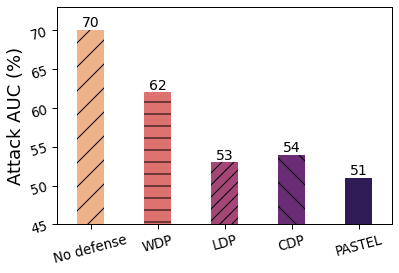

[]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[67, 59, 52, 54, 50]
None


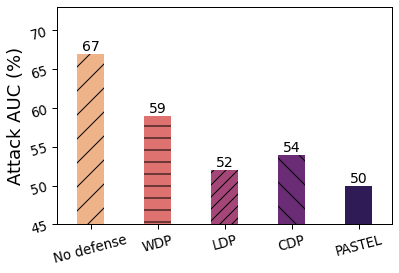

[]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[69, 66, 64, 54, 67]
None


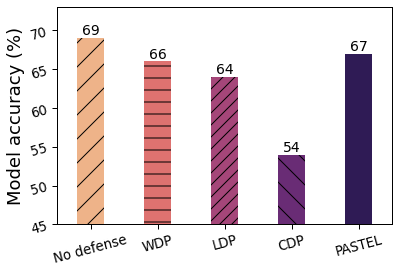

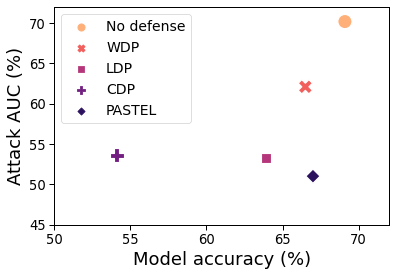

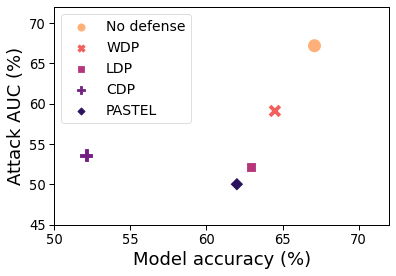

In [19]:
local_auc_values = [70.2, 62.1,53.2,53.6, 51]
global_auc_values = [67.2, 59.1,52.2,53.6, 50]

accuracy_values = [69.1, 66.5,63.9,54.1, 67]
accuracy_values_server = [67.1, 64.5,62.9,52.1, 62]

generate_manual_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 45, 73, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/MotionSense',average=True, values=local_auc_values)
generate_manual_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 73,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/MotionSense', average=True, values= global_auc_values)
generate_manual_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "server_attack", 45, 73,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/MotionSense', average=True, values= accuracy_values)

generate_tradeoff_manual_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 45, 72, 50, 72, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/MotionSense',average=True, x_values = accuracy_values, y_values=local_auc_values)
generate_tradeoff_manual_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 45, 72, 50, 72, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/MotionSense',average=True, x_values = accuracy_values_server, y_values=global_auc_values)


### Cifar 10 - VGG

In [ ]:
plot_config = {
                "dataset_name": "cifar10_vgg",
                "dataset_pretty_name" : "CIFAR10",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "resnet_ppm_baseline_cifar.csv",
                            "color": "black",
                            "symbol" : "+"
                        },

                    {
                            "exp_name" : "PASTEL-P",
                            "file_path": "vgg_ppm_bn17_cifar_vgg.csv",
                            "color": "grey",
                            "symbol" : "*"
                        },
                                        
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_posterior_flattening_relaxloss_uniform_cifar_vgg.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 75, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 75, average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 65, 85, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 40, 75, 65, 80, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 40, 75, 65, 80, average=True)


### CIFAR 100 ResNet

In [ ]:
plot_config = {
                "dataset_name": "cifar100_resnet",
                "dataset_pretty_name" : "CIFAR10",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_cifar100_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                    {
                            "exp_name" : "PASTEL-P",
                            "file_path": "ppm_bn1_cifar100_resnet.csv",
                            "color": "grey",
                            "symbol" : "*"
                        },
                                        
                                              
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_posterior_flattening_relaxloss_uniform_cifar100_resnet.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 45, 75, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 75, average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 50, 70, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 45, 65, 50, 65, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 45, 65, 50, 65, average=True)


### CIFAR 100 VGG

In [ ]:
plot_config = {
                "dataset_name": "cifar100_vgg",
                "dataset_pretty_name" : "CIFAR10",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "vgg_ppm_baseline_cifar100_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
 
                    {
                            "exp_name" : "PASTEL-P",
                            "file_path": "vgg_ppm_bn17_cifar100_vgg.csv",
                            "color": "grey",
                            "symbol" : "*"
                        },
                                        
                                              
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_posterior_flattening_relaxloss_uniform_cifar100_vgg.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 75, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 75, average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 65, 75, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 40, 75, 70, 75, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 40, 75, 70, 75, average=True)


### Speech Commands

In [77]:
plot_config = {
                "dataset_name": "speechcommands",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_speechcommands.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_speechcommands.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_speechcommands.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_speechcommands.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_last_speech_commands.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'client_attack_0', 'client_attack_4']
[58.94117647058823, 57.41176470588235, 58.235294117647065, 58.94117647058823, 57.88235294117647]
Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'client_attack_0', 'client_attack_4']
[56.11764705882353, 55.52941176470589, 56.58823529411765, 57.52941176470589, 56.58823529411765]
Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'client_attack_0', 'client_attack_4']
[51.41176470588236, 51.05882352941177, 50.70588235294118, 50.70588235294118, 51.76470588235295]
Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'client_attack_0', 'client_attack_4']
[50.0, 50.0, 50.0, 50.0, 50.0]
Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'client_attack_0', 'client_attack_4']
[50.0, 50.0, 50.0, 50.0, 50.0]
[0.5980360012771214, 0.6571407079420686, 0.41159660434202294, 0.

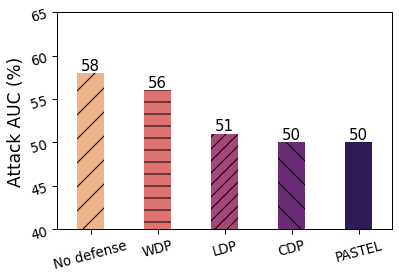

Columns to aggregate
['server_attack']
[55.86827899959928]
Columns to aggregate
['server_attack']
[54.37616387337057]
Columns to aggregate
['server_attack']
[50.15439737878038]
Columns to aggregate
['server_attack']
[50.00353581783467]
Columns to aggregate
['server_attack']
[50.00353581783467]
[0.3679334847469071, 0.18687438088195238, 0.02454671484231785, 7.105427357601002e-15, 7.105427357601002e-15]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[56, 54, 50, 50, 50]
None


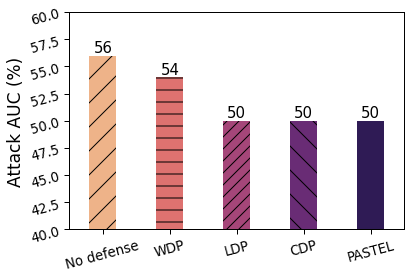

Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[85.99915146372507, 86.34799415452788, 86.24899825578655, 86.58841276575686, 86.71097911657945]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[86.62141139867062, 85.5748833262622, 85.6880214962523, 85.9142978362325, 86.56955640409183]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[55.489558289728, 55.42356102390043, 55.93268278885589, 54.8201574506199, 55.75826144345448]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[60.0575119030783, 60.37335596096733, 59.39282515438647, 59.85009192476311, 59.52953377645783]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_a

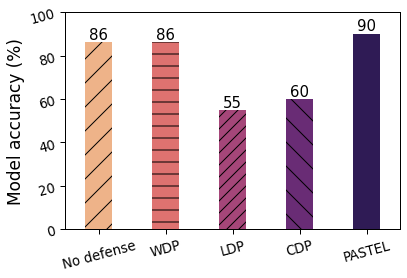

Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[85.99915146372507, 86.34799415452788, 86.24899825578655, 86.58841276575686, 86.71097911657945]
Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'client_attack_0', 'client_attack_4']
[58.94117647058823, 57.41176470588235, 58.235294117647065, 58.94117647058823, 57.88235294117647]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[86.62141139867062, 85.5748833262622, 85.6880214962523, 85.9142978362325, 86.56955640409183]
Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'client_attack_0', 'client_attack_4']
[56.11764705882353, 55.52941176470589, 56.58823529411765, 57.52941176470589, 56.58823529411765]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[55

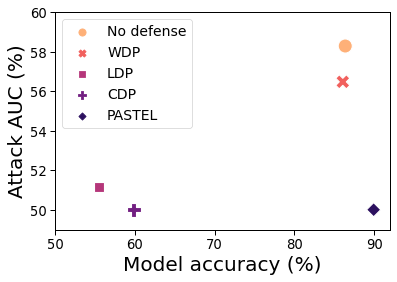

Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[85.99915146372507, 86.34799415452788, 86.24899825578655, 86.58841276575686, 86.71097911657945]
Columns to aggregate
['server_attack']
[55.86827899959928]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[86.62141139867062, 85.5748833262622, 85.6880214962523, 85.9142978362325, 86.56955640409183]
Columns to aggregate
['server_attack']
[54.37616387337057]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[55.489558289728, 55.42356102390043, 55.93268278885589, 54.8201574506199, 55.75826144345448]
Columns to aggregate
['server_attack']
[50.15439737878038]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_0', 'client_accuracy_4']
[60.0575119030783, 60.37335596096

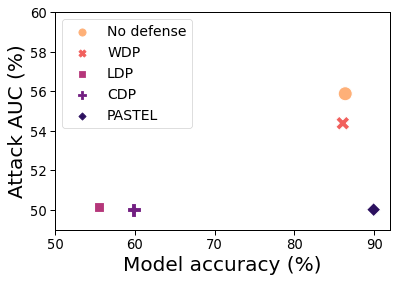

In [78]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 65, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/SpeechCommands',average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 60,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/SpeechCommands', average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 100,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/SpeechCommands', average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 49, 60, 50, 92,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/SpeechCommands', average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 60, 50, 92,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/SpeechCommands', average=True)


In [65]:
plot_config = {
                "dataset_name": "celeba_vgg_results",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                           
                            
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_conv4_true_adagrad_celeba_vgg.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[58.333333333333336, 56.99999999999999, 59.0, 55.00000000000001, 54.66666666666666]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[51.66666666666667, 53.333333333333336, 53.66666666666666, 50.66666666666667, 52.33333333333333]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[50.66666666666667, 52.0, 53.333333333333336, 52.66666666666666, 51.66666666666667]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[52.66666666666666, 56.333333333333336, 56.333333333333336, 52.66666666666666, 52.66666666666666]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[51.0, 51.0, 50.0, 50.0, 50.0]
[1.7333333333333343, 

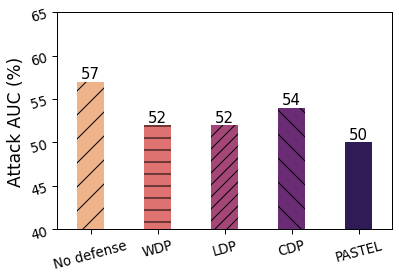

Columns to aggregate
['server_attack']
[60.88]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['server_attack']
[50.38666666666667]
Columns to aggregate
['server_attack']
[52.06666666666667]
Columns to aggregate
['server_attack']
[50.34]
[0.331421852695994, 0.0, 0.08418234177466709, 0.26823621430870903, 0.1535491235186101]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[61, 50, 50, 52, 50]
None


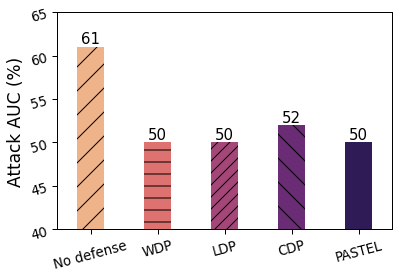

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[71.88, 71.78666666666666, 72.01333333333334, 72.14666666666668, 71.49333333333333]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[70.14666666666668, 72.32, 70.45333333333333, 69.70666666666666, 71.46666666666667]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[48.42666666666667, 48.57333333333334, 48.946666666666665, 49.28, 49.32]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[55.84, 55.93333333333334, 55.95, 55.89333333333335, 57.14555555555555]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[73.0, 72.53333333333333, 71.66666666666667, 72.9333

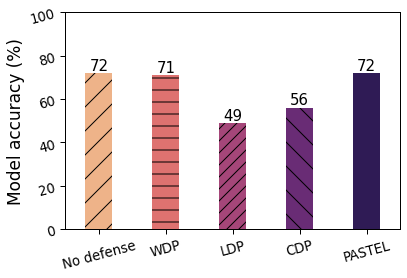

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[71.88, 71.78666666666666, 72.01333333333334, 72.14666666666668, 71.49333333333333]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[58.333333333333336, 56.99999999999999, 59.0, 55.00000000000001, 54.66666666666666]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[70.14666666666668, 72.32, 70.45333333333333, 69.70666666666666, 71.46666666666667]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[51.66666666666667, 53.333333333333336, 53.66666666666666, 50.66666666666667, 52.33333333333333]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[48.42666666666667, 48.5733333333333

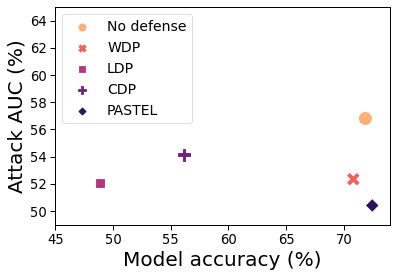

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[71.88, 71.78666666666666, 72.01333333333334, 72.14666666666668, 71.49333333333333]
Columns to aggregate
['server_attack']
[60.88]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[70.14666666666668, 72.32, 70.45333333333333, 69.70666666666666, 71.46666666666667]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[48.42666666666667, 48.57333333333334, 48.946666666666665, 49.28, 49.32]
Columns to aggregate
['server_attack']
[50.38666666666667]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[55.84, 55.93333333333334, 55.95, 55.89333333333335, 57.14555555555555]
Columns to aggregate
['serv

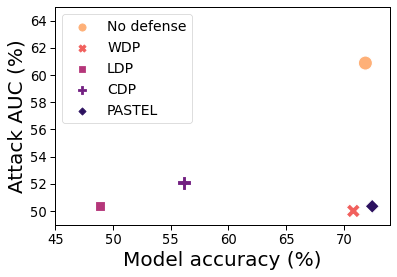

In [66]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 65,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Celeba', average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 65,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Celeba', average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, '/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Celeba',average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 100,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Celeba', average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 49, 65, 45, 74,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Celeba', average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 65, 45, 74,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Celeba', average=True)


In [ ]:
plot_config = {
                "dataset_name": "celeba_vgg_results",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                           
                            {
                            "exp_name" : "PASTEL-L",
                            "file_path": "ppm_pastel_conv7_true_adagrad_celeba_vgg.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    , 
                           
                            {
                            "exp_name" : "PASTEL-O",
                            "file_path": "ppm_pastel_conv4_true_adagrad_celeba_vgg.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


In [49]:
plot_config = {
                "dataset_name": "celeba_resnet_results",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_layer3.2_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[54.333333333333336, 60.0, 53.66666666666666, 54.66666666666666, 55.333333333333336]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[56.333333333333336, 53.62626262626262, 58.62626262626262, 52.62626262626262, 54.333333333333336]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[50.33333333333333, 50.33333333333333, 50.0, 50.33333333333333, 50.33333333333333]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[52.66666666666666, 52.99999999999999, 52.66666666666666, 52.66666666666666, 52.66666666666667]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[53.333333333333336, 52.66666666666666, 51.0, 50.3333

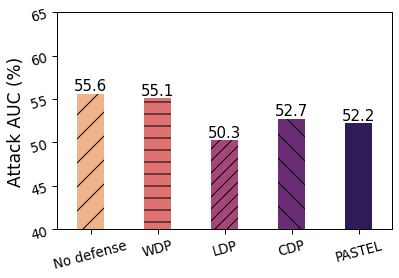

Columns to aggregate
['server_attack']
[55.53333333333333]
Columns to aggregate
['server_attack']
[50.72626262626262]
Columns to aggregate
['server_attack']
[50.04666666666666]
Columns to aggregate
['server_attack']
[52.91333333333333]
Columns to aggregate
['server_attack']
[50.366666666666674]
[1.2977587517631208, 0.22988404204835997, 0.018808981306218175, 0.490397684424476, 0.1905827321080765]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[55.53, 50.73, 50.05, 52.91, 50.37]
None


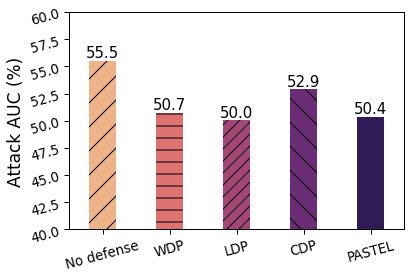

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[63.14666666666666, 64.21333333333334, 64.26666666666667, 64.65333333333334, 64.0]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[62.89333333333334, 62.98626262626262, 62.84, 62.98626262626262, 62.90626262626262]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[51.013333333333335, 50.14666666666666, 50.853333333333325, 50.29333333333334, 51.29333333333334]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[52.48525252525253, 52.52333333333333, 52.92, 52.45, 52.93333333333333]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[64.57333333333334, 64.81333

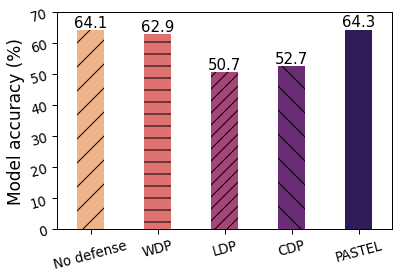

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[63.14666666666666, 64.21333333333334, 64.26666666666667, 64.65333333333334, 64.0]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[54.333333333333336, 60.0, 53.66666666666666, 54.66666666666666, 55.333333333333336]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[62.89333333333334, 62.98626262626262, 62.84, 62.98626262626262, 62.90626262626262]
Columns to aggregate
['client_attack_2', 'client_attack_0', 'client_attack_1', 'client_attack_4', 'client_attack_3']
[56.333333333333336, 53.62626262626262, 58.62626262626262, 52.62626262626262, 54.333333333333336]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[51.013333333333335, 50.14666666666

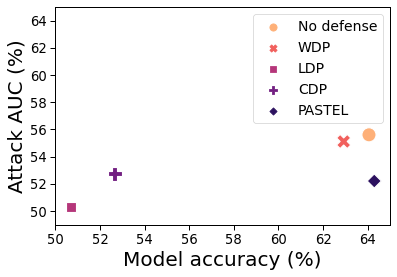

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[63.14666666666666, 64.21333333333334, 64.26666666666667, 64.65333333333334, 64.0]
Columns to aggregate
['server_attack']
[55.53333333333333]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[62.89333333333334, 62.98626262626262, 62.84, 62.98626262626262, 62.90626262626262]
Columns to aggregate
['server_attack']
[50.72626262626262]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[51.013333333333335, 50.14666666666666, 50.853333333333325, 50.29333333333334, 51.29333333333334]
Columns to aggregate
['server_attack']
[50.04666666666666]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[52.48525252525253, 52.52333333333333, 52.92, 52.4

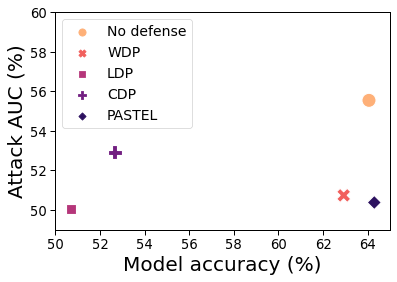

In [50]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 65,'/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Celeba', average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 60, '/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Celeba',average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 70,'/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Celeba', average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 49, 65, 50, 65, '/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Celeba',average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 60, 50, 65, '/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Celeba',average=True)


In [80]:
plot_config = {
                "dataset_name": "cifar10_resnet_dp",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_cifar10_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }
                    ,
                              
                                                                                   {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_cdp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }
                    ]
                }
            


[]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[69, 66, 64, 54, 50]
None


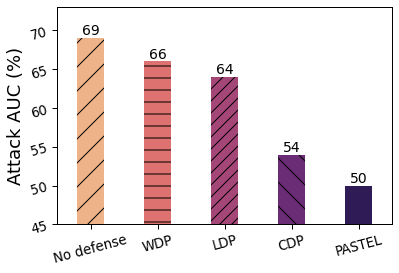

[]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[66, 65, 60, 58, 51]
None


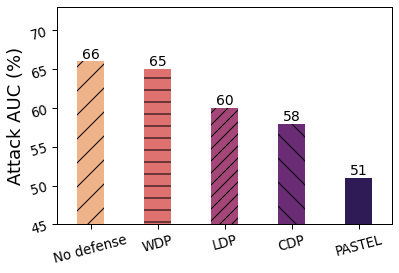

[]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[70, 66, 52, 68, 69]
None


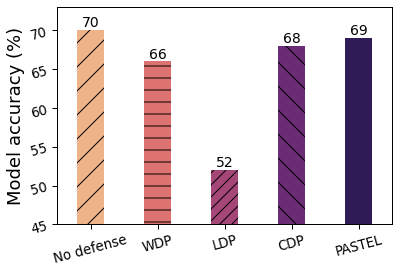

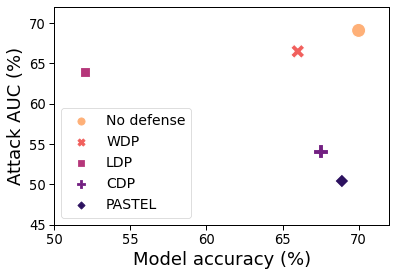

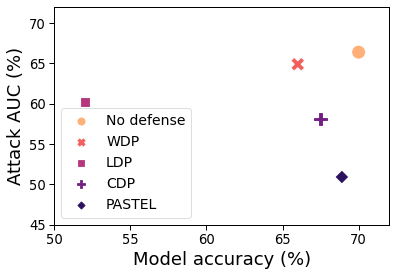

In [81]:
local_auc_values = [69.1, 66.5, 63.9, 54.1,50.4]
global_auc_values = [66.4, 64.9, 60.2, 58.1,50.9]

accuracy_values = [70, 66, 52, 67.5,68.9]
generate_manual_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 45, 73, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10',average=True, values=local_auc_values)
generate_manual_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 73,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10', average=True, values= global_auc_values)
generate_manual_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "server_attack", 45, 73,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10', average=True, values= accuracy_values)

generate_tradeoff_manual_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 45, 72, 50, 72, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10',average=True, x_values = accuracy_values, y_values=local_auc_values)
generate_tradeoff_manual_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 45, 72, 50, 72, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10',average=True, x_values = accuracy_values, y_values=global_auc_values)


In [82]:
plot_config = {
                "dataset_name": "Cifar100_resnet_dp",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_cifar100_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_layer3.2_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


[]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[65, 64, 59, 53, 50]
None


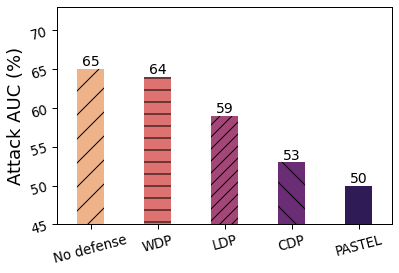

[]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[61, 63, 57, 53, 50]
None


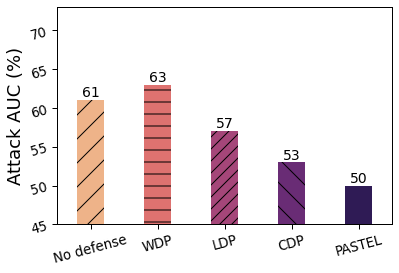

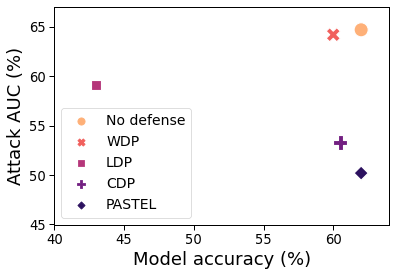

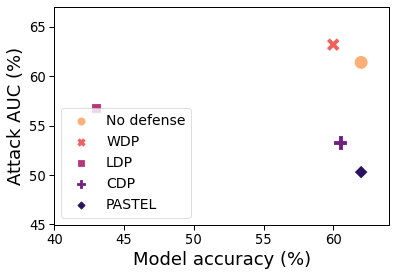

In [83]:
local_auc_values = [64.7, 64.2, 59.1, 53.3, 50.2]
global_auc_values = [61.4, 63.2, 56.8, 53.3, 50.3]

accuracy_values = [62, 60, 43, 60.5, 62]
generate_manual_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 45, 73, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar100',average=True, values=local_auc_values)
generate_manual_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 73,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar100', average=True, values= global_auc_values)

generate_tradeoff_manual_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 45, 67, 40, 64,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar100', average=True, x_values = accuracy_values, y_values=local_auc_values)
generate_tradeoff_manual_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 45, 67, 40, 64,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar100', average=True, x_values = accuracy_values, y_values=global_auc_values)


In [69]:
plot_config = {
                "dataset_name": "gtsrb_vgg_results",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_gtsrb_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_gtsrb_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_gtsrb_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_gtsrb_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                           
                     {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_layer3.1_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[51.84745762711864, 52.82485875706215, 54.51977401129944, 52.9774011299435, 53.954802259887]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[50.0, 52.38983050847458, 52.82485875706215, 52.54237288135594, 58.19209039548022]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[52.9774011299435, 52.12994350282486, 52.12994350282486, 52.9774011299435, 50.56497175241242]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[52.25988700564972, 52.82485875706215, 52.25988700564972, 52.82485875706215, 52.23728813559322]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[52.54237288135594, 55.932203389830505, 52.824858

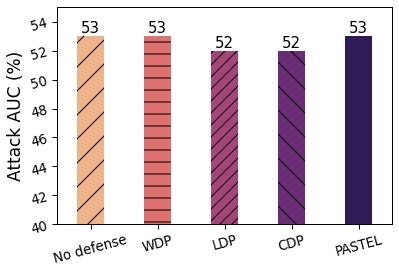

Columns to aggregate
['server_attack']
[51.44774427567445]
Columns to aggregate
['server_attack']
[50.51008841522523]
Columns to aggregate
['server_attack']
[50.21537066424847]
Columns to aggregate
['server_attack']
[50.53842666062117]
Columns to aggregate
['server_attack']
[50.009036499659935]
[0.0376845391291765, 0.06418471803104618, 0.0970078774943905, 0.06015455922782519, 0.0011687044177733526]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[51, 51, 50, 51, 50]
None


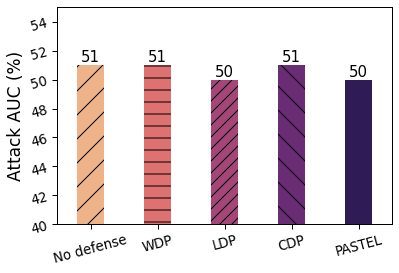

No defense
50
WDP
50
LDP
50
CDP
50
PASTEL
50


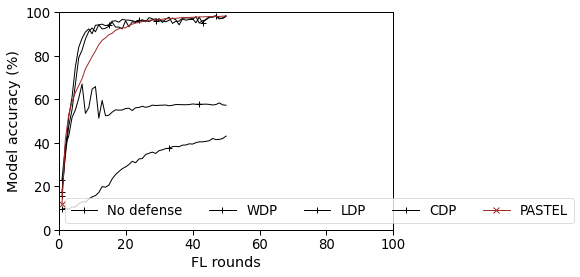

Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[98.71911131262752, 98.87780548628427, 99.08184085241442, 98.58308773520744, 98.94581727499433]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[98.67377012015416, 98.97982316934936, 99.0478349580594, 98.9118113806393, 98.5717524370891]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[43.13080934028565, 42.63205622307867, 43.16481523464067, 44.37769213330311, 42.24665608705509]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[58.24302875165721, 58.36771707055857, 58.22035815542054, 57.88025525187033, 58.36771707055857]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'clie

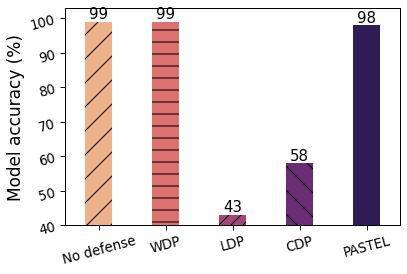

Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[98.71911131262752, 98.87780548628427, 99.08184085241442, 98.58308773520744, 98.94581727499433]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[51.84745762711864, 52.82485875706215, 54.51977401129944, 52.9774011299435, 53.954802259887]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[98.67377012015416, 98.97982316934936, 99.0478349580594, 98.9118113806393, 98.5717524370891]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[50.0, 52.38983050847458, 52.82485875706215, 52.54237288135594, 58.19209039548022]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[43.13080934028565, 

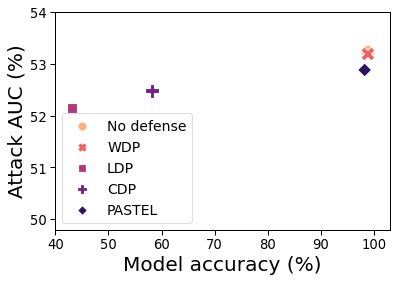

Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[98.71911131262752, 98.87780548628427, 99.08184085241442, 98.58308773520744, 98.94581727499433]
Columns to aggregate
['server_attack']
[51.44774427567445]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[98.67377012015416, 98.97982316934936, 99.0478349580594, 98.9118113806393, 98.5717524370891]
Columns to aggregate
['server_attack']
[50.51008841522523]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[43.13080934028565, 42.63205622307867, 43.16481523464067, 44.37769213330311, 42.24665608705509]
Columns to aggregate
['server_attack']
[50.21537066424847]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[58.24302875165721, 58.3677170

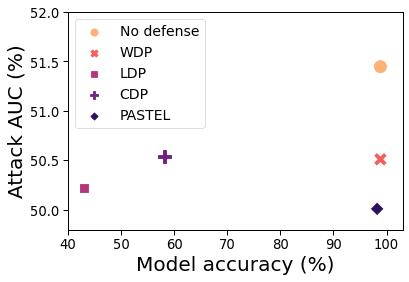

In [73]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 55,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/GTSRB', average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 55,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/GTSRB', average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 40, 103, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/GTSRB',average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 49.8, 54, 40, 103, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/GTSRB',average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49.8, 52, 40, 103, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/GTSRB',average=True)


In [63]:
plot_config = {
                "dataset_name": "gtsrb_resnet_results",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_gtsrb_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                                           {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_gtsrb_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_gtsrb_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_gtsrb_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }, 
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_layer3.1_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }
            


Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[55.08474576271186, 52.82485875706215, 51.9774011299435, 54.51977401129944, 55.08474576271186]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[53.10734463276836, 51.41242937853108, 51.69491525423729, 54.51977401129944, 56.77966101694916]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[51.41242937853108, 50.282485875706215, 51.69491525423729, 51.12994350282486, 50.56497175141242]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[52.51237288135194, 52.51237288135194, 51.69491525123729, 51.9774011299435, 52.25988700564972]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[52.54237288135594, 55.932203389

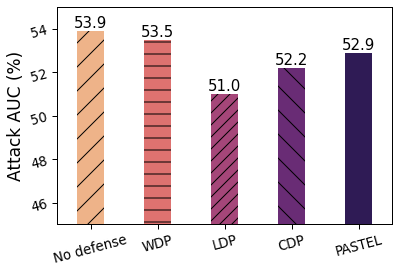

Columns to aggregate
['server_attack']
[51.088188619360686]
Columns to aggregate
['server_attack']
[51.01450918159147]
Columns to aggregate
['server_attack']
[50.073679437769215]
Columns to aggregate
['server_attack']
[50.20403516613013]
Columns to aggregate
['server_attack']
[50.009036499659935]
[0.2657378975444087, 0.05835477087091691, 0.0175239456288124, 0.035503165369757325, 0.0011687044177733526]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[51.09, 51.01, 50.07, 50.2, 50.01]
None


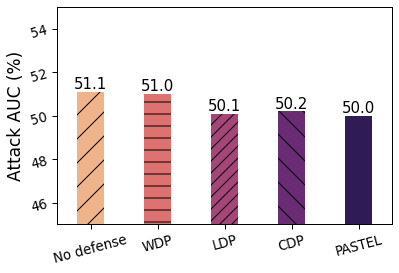

Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[99.13851734300611, 98.95715257311268, 99.0478349580594, 99.26320562230786, 98.95715257311268]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[99.36522330537294, 99.33121741101792, 99.30854681478122, 99.00249376558602, 99.37655860349128]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[52.07435955565632, 51.2582180911358, 51.6776241215144, 51.60961233280435, 51.99501246882793]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[58.85547018815555, 58.8778058528425, 58.85547018815555, 58.88514078440253, 58.70777501450518]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'clien

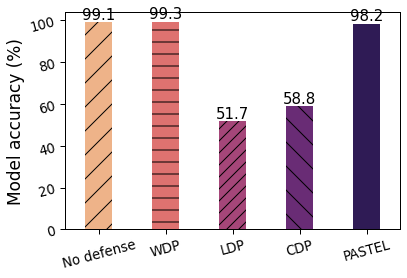

Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[99.13851734300611, 98.95715257311268, 99.0478349580594, 99.26320562230786, 98.95715257311268]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[55.08474576271186, 52.82485875706215, 51.9774011299435, 54.51977401129944, 55.08474576271186]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[99.36522330537294, 99.33121741101792, 99.30854681478122, 99.00249376558602, 99.37655860349128]
Columns to aggregate
['client_attack_3', 'client_attack_0', 'client_attack_4', 'client_attack_1', 'client_attack_2']
[53.10734463276836, 51.41242937853108, 51.69491525423729, 54.51977401129944, 56.77966101694916]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[52

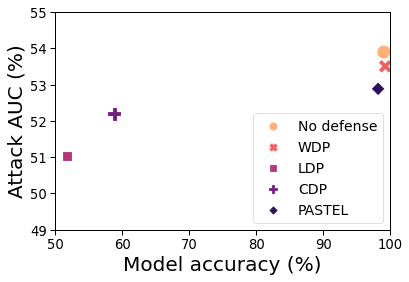

Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[99.13851734300611, 98.95715257311268, 99.0478349580594, 99.26320562230786, 98.95715257311268]
Columns to aggregate
['server_attack']
[51.088188619360686]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[99.36522330537294, 99.33121741101792, 99.30854681478122, 99.00249376558602, 99.37655860349128]
Columns to aggregate
['server_attack']
[51.01450918159147]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[52.07435955565632, 51.2582180911358, 51.6776241215144, 51.60961233280435, 51.99501246882793]
Columns to aggregate
['server_attack']
[50.073679437769215]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_0', 'client_accuracy_4', 'client_accuracy_1', 'client_accuracy_2']
[58.85547018815555, 58.87780

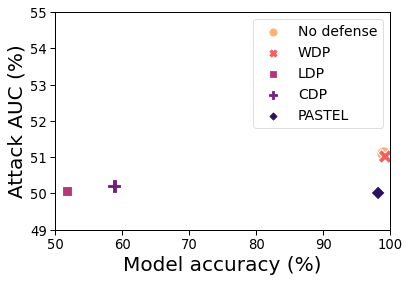

In [65]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 45, 55, '/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Cifar10',average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 55,'/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Cifar10', average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 104,'/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Cifar10', average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 49, 55, 50, 100,'/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Cifar10', average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 55, 50, 100, '/Users/tima/Documents/Papers/ubicomp-2023-pastel/Figures/DP/Cifar10',average=True)


### Purchase 100

In [74]:
plot_config = {
                "dataset_name": "purchase_results",
                "dataset_pretty_name" : "Purchase 100",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_300_purchase.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                               {
                            "exp_name" : "WDP",
                            "file_path": "ppm_gnl_purchase.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                   {
                            "exp_name" : "LDP",
                            "file_path": "ppm_ldp_purchase.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                             {
                            "exp_name" : "CDP",
                            "file_path": "ppm_cdp_purchase.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                                            
                           
                    {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_features4_adagrad_purchase.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    
                    
                    ]
                }

Columns to aggregate
['client_attack_1', 'client_attack_6', 'client_attack_4', 'client_attack_9', 'client_attack_3', 'client_attack_8', 'client_attack_5', 'client_attack_7', 'client_attack_2', 'client_attack_0']
[76.0, 81.0, 77.0, 80.0, 77.0, 80.0, 79.0, 80.0, 75.0, 76.0]
Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'client_attack_4', 'client_attack_0']
[78.28282828282829, 74.24242424242425, 74.74747474747475, 75.25252525252525, 73.73737373737373]
Columns to aggregate
['client_attack_1', 'client_attack_6', 'client_attack_3', 'client_attack_9', 'client_attack_3.1', 'client_attack_8', 'client_attack_5', 'client_attack_7', 'client_attack_2', 'client_attack_0']
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
Columns to aggregate
['client_attack_1', 'client_attack_6', 'client_attack_4', 'client_attack_9', 'client_attack_4.1', 'client_attack_8', 'client_attack_5', 'client_attack_7', 'client_attack_3', 'client_attack_0']
[50.0, 50.0, 50.0, 50.0, 

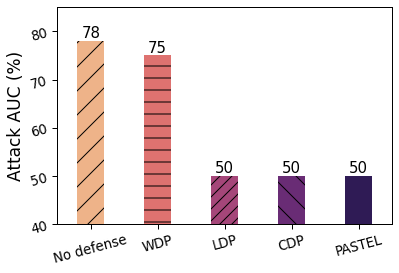

Columns to aggregate
['server_attack']
[74.79221569024934]
Columns to aggregate
['server_attack']
[57.74376647070748]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['server_attack']
[50.15203729981755]
[0.21922679738936063, 0.31377507701734747, 0.0, 0.0, 0.017716886309495385]
Labels
['No defense', 'WDP', 'LDP', 'CDP', 'PASTEL']
[75, 58, 50, 50, 50]
None


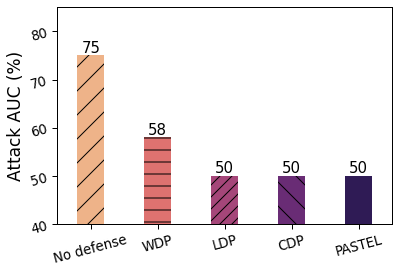

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_4', 'client_accuracy_0']
[61.62578552604906, 59.8013379282384, 61.301439286438274, 59.90269612811676, 60.004054327995135]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_3', 'client_accuracy_9', 'client_accuracy_3.1', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[35.37301175755119, 35.63753307723395, 35.576728157307926, 35.19156699777012, 35.819987837016015, 35.576728157307926, 35

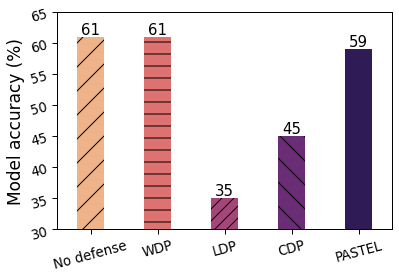

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['client_attack_1', 'client_attack_6', 'client_attack_4', 'client_attack_9', 'client_attack_3', 'client_attack_8', 'client_attack_5', 'client_attack_7', 'client_attack_2', 'client_attack_0']
[76.0, 81.0, 77.0, 80.0, 77.0, 80.0, 79.0, 80.0, 75.0, 76.0]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_4', 'client_accuracy_0']
[61.62578552604906, 59.8013379282384, 61.301439286438274, 59.90269612811676, 60.004054327995135]
Columns to aggregate
['client_attack_3', 'client_attack_1', 'client_attack_2', 'c

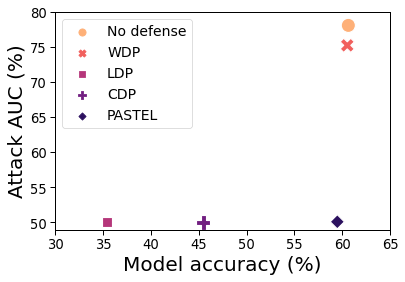

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['server_attack']
[74.79221569024934]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_4', 'client_accuracy_0']
[61.62578552604906, 59.8013379282384, 61.301439286438274, 59.90269612811676, 60.004054327995135]
Columns to aggregate
['server_attack']
[57.74376647070748]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_3', 'client_accuracy_9', 'client_accuracy_3.1', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[3

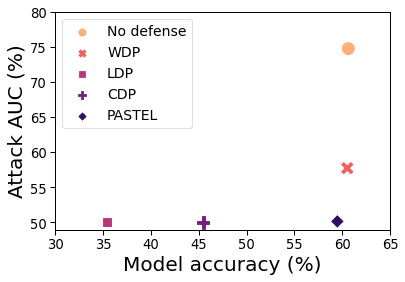

In [75]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 85, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Purchase',average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 85,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Purchase', average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 40, 70, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 30, 65,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Purchase', average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 49, 80, 30, 65, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Purchase',average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 80, 30, 65,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Purchase', average=True)


### Texas 100

In [ ]:
plot_config = {
                "dataset_name": "Texas100",
                "dataset_pretty_name" : "Texas100",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_texas.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                               
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_posterior_flattening_relaxloss_uniform_texas.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }

In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 100, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 55, average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_attack', 0, 80, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 60, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 35, 50, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 40, 55, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 48, 90, 45, 50, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack',49.5, 55, 45, 50, average=True)


### Celeba VGG

In [ ]:
plot_config = {
                "dataset_name": "celeba_vgg",
                "dataset_pretty_name" : "CelebA",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                               
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_bn8_adagrad_celeba_vgg.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }


                    ]
                }

In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 60, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 70, average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 102, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 60, 80, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 60, 70, 75, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 48, 70, 70, 75, average=True)

generate_histogram(plot_config, "local_model_0_attack_accuracy_hist", "Attack AUC (%)", "client_auc_0", 45, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_1_attack_accuracy_hist", "Attack AUC (%)", "client_auc_1", 45, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_2_attack_accuracy_hist", "Attack AUC (%)", "client_auc_2", 45, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_3_attack_accuracy_hist", "Attack AUC (%)", "client_auc_3", 45, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_4_attack_accuracy_hist", "Attack AUC (%)", "client_auc_4", 45, 60, average=True, extension = "png")


generate_histogram(plot_config, "local_model_0_accuracy_hist", "Model accuracy (%)", "client_accuracy_0", 60, 80, average=True, extension = "png")
generate_histogram(plot_config, "local_model_1_accuracy_hist", "Model accuracy (%)", "client_accuracy_1", 60, 80, average=True, extension = "png")
generate_histogram(plot_config, "local_model_2_accuracy_hist", "Model accuracy (%)", "client_accuracy_2", 60, 80, average=True, extension = "png")
generate_histogram(plot_config, "local_model_3_accuracy_hist", "Model accuracy (%)", "client_accuracy_3", 60, 80, average=True, extension = "png")
generate_histogram(plot_config, "local_model_4_accuracy_hist", "Model accuracy (%)", "client_accuracy_4", 60, 80, average=True, extension = "png")

generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client1', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_0', 'client_auc_0', 45, 60, 60, 80, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client2', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_1', 'client_auc_1', 45, 60, 60, 80, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client3', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_2', 'client_auc_2', 45, 60, 60, 80, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client4', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_3', 'client_auc_3', 45, 60, 60, 80, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client5', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_4', 'client_auc_4', 45, 60, 60, 80, average=True)



In [ ]:
plot_xy(plot_config, 'client_accuracy_0', 'Model accuracy (%)', 'client_accuracy_0', 0, 80, average=True)
plot_xy(plot_config, 'client_accuracy_1', 'Model accuracy (%)', 'client_accuracy_1', 0, 80, average=True)
plot_xy(plot_config, 'client_accuracy_2', 'Model accuracy (%)', 'client_accuracy_2', 0, 80, average=True)
plot_xy(plot_config, 'client_accuracy_3', 'Model accuracy (%)', 'client_accuracy_3', 0, 80, average=True)
plot_xy(plot_config, 'client_accuracy_4', 'Model accuracy (%)', 'client_accuracy_4', 0, 80, average=True)

### CelebA ResNet20

In [ ]:
plot_config = {
                "dataset_name": "celeba_resnet",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_resnet.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },
                                               
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_firstbatch_last_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        }
                            
                    ]
                }

In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 40, 60, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 60, average=True)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 60, 70, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 60, 60, 70, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 52, 60, 70, average=True)

generate_histogram(plot_config, "local_model_0_attack_accuracy_hist", "Attack AUC (%)", "client_auc_0", 40, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_1_attack_accuracy_hist", "Attack AUC (%)", "client_auc_1", 40, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_2_attack_accuracy_hist", "Attack AUC (%)", "client_auc_2", 40, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_3_attack_accuracy_hist", "Attack AUC (%)", "client_auc_3", 40, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_4_attack_accuracy_hist", "Attack AUC (%)", "client_auc_4", 40, 60, average=True, extension = "png")


generate_histogram(plot_config, "local_model_0_accuracy_hist", "Model accuracy (%)", "client_accuracy_0", 60, 80, average=True, extension = "png")
generate_histogram(plot_config, "local_model_1_accuracy_hist", "Model accuracy (%)", "client_accuracy_1", 60, 80, average=True, extension = "png")
generate_histogram(plot_config, "local_model_2_accuracy_hist", "Model accuracy (%)", "client_accuracy_2", 60, 80, average=True, extension = "png")
generate_histogram(plot_config, "local_model_3_accuracy_hist", "Model accuracy (%)", "client_accuracy_3", 60, 80, average=True, extension = "png")
generate_histogram(plot_config, "local_model_4_accuracy_hist", "Model accuracy (%)", "client_accuracy_4", 60, 80, average=True, extension = "png")

generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client1', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_0', 'client_auc_0', 48, 60, 60, 75, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client2', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_1', 'client_auc_1', 48, 60, 60, 75, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client3', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_2', 'client_auc_2', 48, 60, 60, 75, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client4', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_3', 'client_auc_3', 48, 60, 60, 75, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client5', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_4', 'client_auc_4', 48, 60, 60, 75, average=True)


In [ ]:
plot_xy(plot_config, 'client_accuracy_0', 'Model accuracy (%)', 'client_accuracy_0', 0, 80, average=True)
plot_xy(plot_config, 'client_accuracy_1', 'Model accuracy (%)', 'client_accuracy_1', 0, 80, average=True)
plot_xy(plot_config, 'client_accuracy_2', 'Model accuracy (%)', 'client_accuracy_2', 0, 80, average=True)
plot_xy(plot_config, 'client_accuracy_3', 'Model accuracy (%)', 'client_accuracy_3', 0, 80, average=True)
plot_xy(plot_config, 'client_accuracy_4', 'Model accuracy (%)', 'client_accuracy_4', 0, 80, average=True)

### GTSRB - ResNet

In [ ]:
plot_config = {
                "dataset_name": "GTSRB_resnet",
                "dataset_pretty_name" : "GTSRB_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_gtsrb_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                {
                            "exp_name" : "LDP (Eps = 0.3)",
                            "file_path": "ppm_ldp_03_gtsrb_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                                {
                            "exp_name" : "LDP (Eps = 0.5)",
                            "file_path": "ppm_ldp_05_gtsrb_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                            {
                            "exp_name" : "LDP (Eps = 0.7)",
                            "file_path": "ppm_ldp_07_gtsrb_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                    
                    
                    
                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_firstbatch_last_gtsrb_resnet.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    ]
                }

In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 60, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 60, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 70, 103, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 60, 95, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 48, 55, 95, 101.5, average=True)

generate_histogram(plot_config, "local_model_0_attack_accuracy_hist", "Attack AUC (%)", "client_auc_0", 45, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_1_attack_accuracy_hist", "Attack AUC (%)", "client_auc_1", 45, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_2_attack_accuracy_hist", "Attack AUC (%)", "client_auc_2", 45, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_3_attack_accuracy_hist", "Attack AUC (%)", "client_auc_3", 45, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_4_attack_accuracy_hist", "Attack AUC (%)", "client_auc_4", 45, 60, average=True, extension = "png")


generate_histogram(plot_config, "local_model_0_accuracy_hist", "Model accuracy (%)", "client_accuracy_0", 90, 101.5, average=True, extension = "png")
generate_histogram(plot_config, "local_model_1_accuracy_hist", "Model accuracy (%)", "client_accuracy_1", 90, 101.5, average=True, extension = "png")
generate_histogram(plot_config, "local_model_2_accuracy_hist", "Model accuracy (%)", "client_accuracy_2", 90, 101.5, average=True, extension = "png")
generate_histogram(plot_config, "local_model_3_accuracy_hist", "Model accuracy (%)", "client_accuracy_3", 90, 101.5, average=True, extension = "png")
generate_histogram(plot_config, "local_model_4_accuracy_hist", "Model accuracy (%)", "client_accuracy_4", 90, 101.5, average=True, extension = "png")

generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client1', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_0', 'client_auc_0', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client2', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_1', 'client_auc_1', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client3', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_2', 'client_auc_2', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client4', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_3', 'client_auc_3', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client5', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_4', 'client_auc_4', 48, 60, 90, 101.5, average=True)


### GTSRB - VGG

In [ ]:
plot_config = {
                "dataset_name": "GTSRB_vgg",
                "dataset_pretty_name" : "GTSRB_VGG",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_gtsrb_vgg.csv",
                            "color": "black",
                            "symbol" : "+"
                        },

                           
                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_pastel_last_gtsrb_vgg.csv",
                            "color": "brown",
                            "symbol" : "x"
                        }
                    
                    ]
                }

In [ ]:
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 40, 60, average=True)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 40, 55, average=True)

generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 90, 101.5, average=True)

generate_histogram(plot_config, "local_model_0_attack_accuracy_hist", "Attack AUC (%)", "client_attack_0", 40, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_1_attack_accuracy_hist", "Attack AUC (%)", "client_attack_1", 40, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_2_attack_accuracy_hist", "Attack AUC (%)", "client_attack_2", 40, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_3_attack_accuracy_hist", "Attack AUC (%)", "client_attack_3", 40, 60, average=True, extension = "png")
generate_histogram(plot_config, "local_model_4_attack_accuracy_hist", "Attack AUC (%)", "client_attack_4", 40, 60, average=True, extension = "png")


generate_histogram(plot_config, "local_model_0_accuracy_hist", "Model accuracy (%)", "client_accuracy_0", 90, 101.5, average=True, extension = "png")
generate_histogram(plot_config, "local_model_1_accuracy_hist", "Model accuracy (%)", "client_accuracy_1", 90, 101.5, average=True, extension = "png")
generate_histogram(plot_config, "local_model_2_accuracy_hist", "Model accuracy (%)", "client_accuracy_2", 90, 101.5, average=True, extension = "png")
generate_histogram(plot_config, "local_model_3_accuracy_hist", "Model accuracy (%)", "client_accuracy_3", 90, 101.5, average=True, extension = "png")
generate_histogram(plot_config, "local_model_4_accuracy_hist", "Model accuracy (%)", "client_accuracy_4", 90, 101.5, average=True, extension = "png")

generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client1', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_0', 'client_attack_0', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client2', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_1', 'client_attack_1', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client3', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_2', 'client_attack_2', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client4', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_3', 'client_attack_3', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client5', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy_4', 'client_attack_4', 48, 60, 90, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 48, 55, 95, 101.5, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 48, 60, 95, 101.5, average=True)


### Ablative analysis purchase

In [225]:
plot_config = {
                "dataset_name": "purchase_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_300_purchase.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - FC",
                            "file_path": "ppm_pastel_features0_adagrad_purchase.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - FC",
                            "file_path": "ppm_pastel_features2_adagrad_purchase.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - FC",
                            "file_path": "ppm_pastel_features4_adagrad_purchase.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - FC",
                            "file_path": "ppm_pastel_features6_adagrad_purchase.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                                                                                                                                        {
                            "exp_name" : "5 - Classifier",
                            "file_path": "ppm_pastel_features6_classifier_adagrad_purchase.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      } 
                            
                    ]
                }

Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[76.0, 81.0, 77.0, 80.0, 77.0, 80.0, 79.0, 80.0, 75.0, 76.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[55.00000000000001, 55.99999999999999, 55.99999999999999, 55.99999999999999, 53.0, 55.00000000000001, 54.0, 56.99999999999999, 52.0, 53.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[51.0, 52.0, 51.0, 52.0, 52.0, 52.0, 53.0, 52.0, 51.0, 51.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0

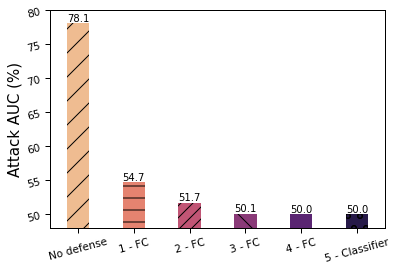

Columns to aggregate
['server_attack']
[74.79221569024934]
Columns to aggregate
['server_attack']
[50.58787755929455]
Columns to aggregate
['server_attack']
[50.1621731198054]
Columns to aggregate
['server_attack']
[50.15203729981755]
Columns to aggregate
['server_attack']
[50.01013581998783]
Columns to aggregate
['server_attack']
[50.0]
[0.21922679738936063, 0.29249676967422644, 0.11219821150564697, 0.017716886309495385, 0.009223719946587274, 0.0]
Labels
['No defense', '1 - FC', '2 - FC', '3 - FC', '4 - FC', '5 - Classifier']
[74.79, 50.59, 50.16, 50.15, 50.01, 50.0]
None


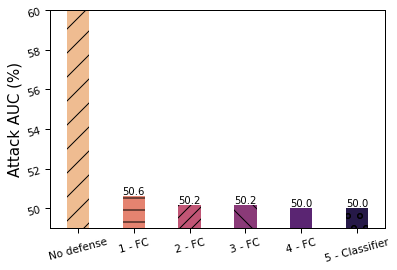

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.68660044597608, 60.787958645854445, 60.72714372592743, 60.673018447192376, 60.7474153659031, 60.47719440502737, 60.78126900466248, 60.69329008716805, 60.72714372592743, 60.69329008716805]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'clien

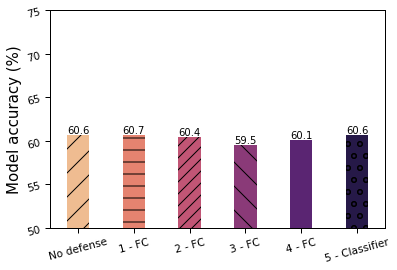

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[76.0, 81.0, 77.0, 80.0, 77.0, 80.0, 79.0, 80.0, 75.0, 76.0]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.68660044597608, 60.787958645854445, 60.72714372592743, 60.673018447192376, 60.7474153659031, 60.477

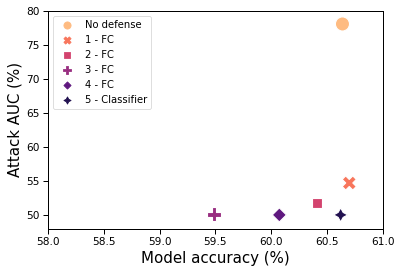

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['server_attack']
[74.79221569024934]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.68660044597608, 60.787958645854445, 60.72714372592743, 60.673018447192376, 60.7474153659031, 60.47719440502737, 60.78126900466248, 60.69329008716805, 60.72714372592743, 60.69329008716805]
Columns to aggregate
['server_attack']
[50.58787755929455]
Columns to aggregate
['client_accura

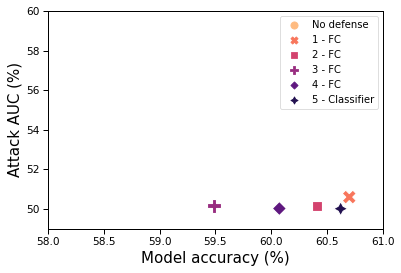

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


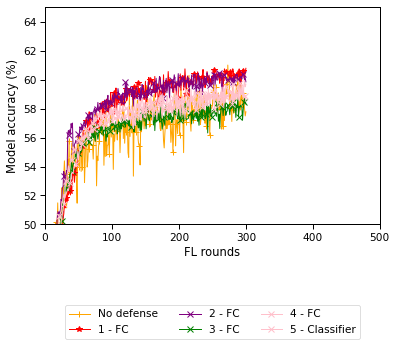

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


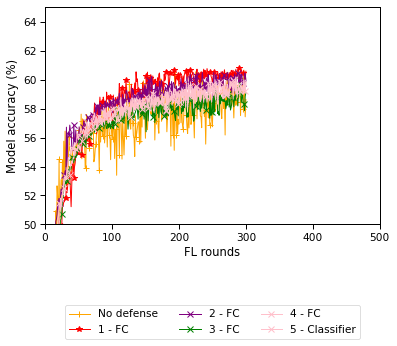

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


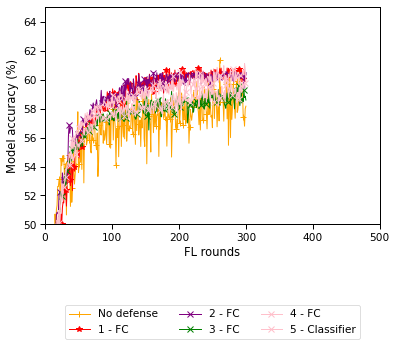

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


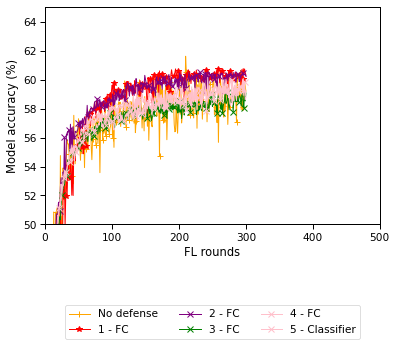

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


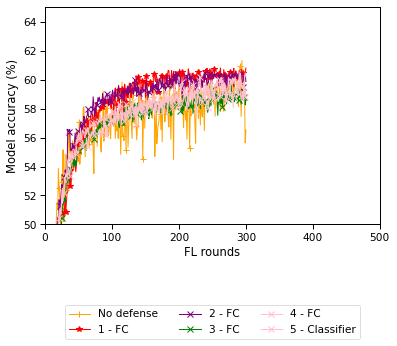

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


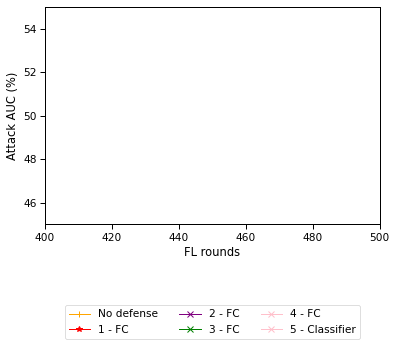

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


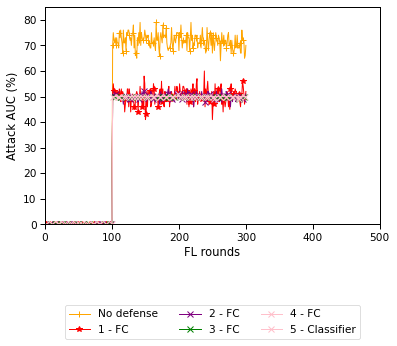

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


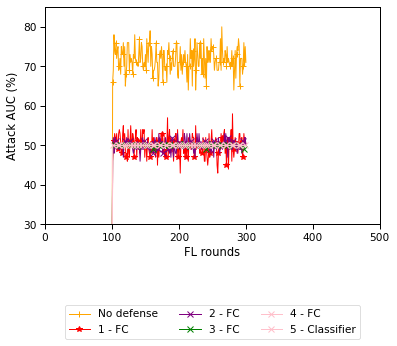

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


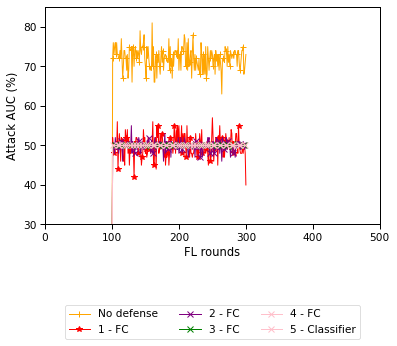

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


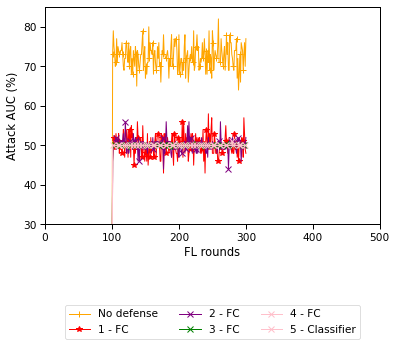

No defense
300
1 - FC
300
2 - FC
300
3 - FC
300
4 - FC
300
5 - Classifier
300


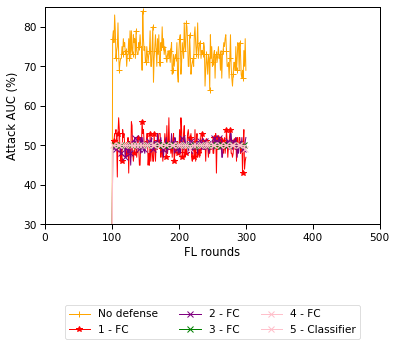

In [226]:
r = 300

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 80, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 60, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 50, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 80, 58, 61, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 60, 58, 61, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

In [ ]:
plot_config = {
                "dataset_name": "purchase_pastelp_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_300_purchase.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - FC",
                            "file_path": "ppm_pastel_features0_purchase.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - FC",
                            "file_path": "ppm_pastel_features2_purchase.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - FC",
                            "file_path": "ppm_pastel_features4_purchase.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - FC",
                            "file_path": "ppm_pastel_features6_purchase.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                                                                                                                         {
                            "exp_name" : "5 - Classifier",
                            "file_path": "ppm_pastel_features6_classifier_adam_purchase.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      }   
                            
                    ]
                }

In [ ]:
r = 300

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 90, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 55, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 90, 58, 61, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 55, 58, 61, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Purchase 2 Layers Adagrad

In [ ]:
plot_config = {
                "dataset_name": "purchase_2_layers_pastel_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_purchase_2_layers.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - L",
                            "file_path": "ppm_pastel_purchase_2_layers_features0_adagrad.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - L",
                            "file_path": "ppm_pastel_purchase_2_layers_features2_adagrad.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - L",
                            "file_path": "ppm_pastel_purchase_2_layers_classifier_adagrad.csv",
                            "color": "green",
                            "symbol" : "x"
                        }
                            
                    ]
                }

In [ ]:
r = 300

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 90, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 75, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 75, 54, 57, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 75, 54, 57, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Purchase 2 Layers Adam

In [ ]:
plot_config = {
                "dataset_name": "purchase_2_layers_pastelp_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_purchase_2_layers.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - FC",
                            "file_path": "ppm_pastel_purchase_2_layers_features0_adam.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - FC",
                            "file_path": "ppm_pastel_purchase_2_layers_features2_adam.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - Classifier",
                            "file_path": "ppm_pastel_purchase_2_layers_classifier_adam.csv",
                            "color": "green",
                            "symbol" : "x"
                        }
                            
                    ]
                }

In [ ]:
r = 300

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 90, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 75, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 90, 55, 61, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 75, 55, 61, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Purchase 6 Layers Adagrad

In [ ]:
plot_config = {
                "dataset_name": "purchase_6_layers_adagrad_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_purchase_6_layers.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features0_adagrad.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features2_adagrad.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features4_adagrad.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features6_adagrad.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                             {
                            "exp_name" : "5 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features8_adagrad.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                    {
                                "exp_name" : "6 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features10_adagrad.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                     {
                                "exp_name" : "7 - Classifier",
                            "file_path": "ppm_pastel_purchase_6_layers_classifier_adagrad.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      } 
                            
                    ]
                }

In [ ]:
r = 300

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 90, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 75, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 90, 55, 61, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 75, 55, 61, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

In [ ]:
plot_config = {
                "dataset_name": "purchase_6_layers_adam_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_purchase_6_layers.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features0_adam.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features2_adam.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features4_adam.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features6_adam.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                             {
                            "exp_name" : "5 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features8_adam.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                    {
                                "exp_name" : "6 - FC",
                            "file_path": "ppm_pastel_purchase_6_layers_features10_adam.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                     {
                                "exp_name" : "7 - Classifier",
                            "file_path": "ppm_pastel_purchase_6_layers_classifier_adam.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      } 
                            
                    ]
                }

In [ ]:
r = 300

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 85, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 60, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 85, 55, 60, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 60, 55, 60, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Texas

In [ ]:
plot_config = {
                "dataset_name": "texas_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_texas.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - FC",
                            "file_path": "ppm_pastel_adagrad_features0_texas.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - FC",
                            "file_path": "ppm_pastel_adagrad_features2_texas.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - FC",
                            "file_path": "ppm_pastel_adagrad_features4_texas.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - FC",
                            "file_path": "ppm_pastel_adagrad_features6_texas.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                                                                                                                                        {
                            "exp_name" : "5 - Classifier",
                            "file_path": "ppm_pastel_adagrad_classifier_texas.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      } 
                            
                    ]
                }

In [ ]:
r = 200

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 90, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 75, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 90, 44, 48, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 90, 44, 48, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Texas 2 Layers PASTEL

In [ ]:
plot_config = {
                "dataset_name": "texas_2_layers_adagrad_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_texas_2_layers_.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - FC",
                            "file_path": "ppm_pastel_texas_2_layers_features0_adagrad.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - FC",
                            "file_path": "ppm_pastel_texas_2_layers_features2_adagrad.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - Classifier",
                            "file_path": "ppm_pastel_texas_2_layers_classifier_adagrad.csv",
                            "color": "green",
                            "symbol" : "x"
                        }
                            
                    ]
                }

In [ ]:
r = 200

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 85, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 60, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 85, 48, 50, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 60, 48, 50, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Texas 6 Layers PASTEL

In [ ]:
plot_config = {
                "dataset_name": "texas_6_layers_adagrad_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_texas_6_layers.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - FC",
                            "file_path": "ppm_pastel_texas_6_layers_features0_adagrad.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - FC",
                            "file_path": "ppm_pastel_texas_6_layers_features2_adagrad.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - FC",
                            "file_path": "ppm_pastel_texas_6_layers_features4_adagrad.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - FC",
                            "file_path": "ppm_pastel_texas_6_layers_features6_adagrad.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                             {
                            "exp_name" : "5 - FC",
                            "file_path": "ppm_pastel_texas_6_layers_features8_adagrad.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                    {
                                "exp_name" : "6 - FC",
                            "file_path": "ppm_pastel_texas_6_layers_features10_adagrad.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                     {
                                "exp_name" : "7 - Classifier",
                            "file_path": "ppm_pastel_texas_6_layers_classifier_adagrad.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      } 
                            
                    ]
                }

In [ ]:
r = 200

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 85, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 65, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 0, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 85, 48, 50, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 65, 48, 50, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Ablative analysis Celeba VGG

In [ ]:
plot_config = {
                "dataset_name": "celeba_vgg_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_vgg.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },
                          {
                            "exp_name" : "1 - C",
                            "file_path": "ppm_pastel_conv_true_adagrad_celeba_vgg.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                            

                    
                     {
                            "exp_name" : "1 - BN",
                            "file_path": "ppm_pastel_bn1_true_adagrad_celeba_vgg.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                                    {
                            "exp_name" : "2 - C",
                            "file_path": "ppm_pastel_conv2_true__adagrad_celeba_vgg.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                               
                                                {
                            "exp_name" : "2 - BN",
                            "file_path": "ppm_pastel_bn2_true__adagrad_celeba_vgg.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                                                  {
                            "exp_name" : "3 - C",
                            "file_path": "ppm_pastel_conv3_true_adagrad_celeba_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - BN",
                            "file_path": "ppm_pastel_bn3_true_adagrad_celeba_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                    
                                                                                                      {
                            "exp_name" : "4 - C",
                            "file_path": "ppm_pastel_conv4_true_adagrad_celeba_vgg.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - BN",
                            "file_path": "ppm_pastel_bn4_true_adagrad_celeba_vgg.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "5 - C",
                            "file_path": "ppm_pastel_conv5_true_adagrad_celeba_vgg.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                            {
                            "exp_name" : "5 - BN",
                            "file_path": "ppm_pastel_bn5_true_adagrad_celeba_vgg.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                   {
                            "exp_name" : "6 - C",
                            "file_path": "ppm_pastel_conv6_true_adagrad_celeba_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "6 - BN",
                            "file_path": "ppm_pastel_bn6_true_adagrad_celeba_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                     
                                           {
                            "exp_name" : "7 - C",
                            "file_path": "ppm_pastel_conv7_true_adagrad_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                           {
                            "exp_name" : "7 - BN",
                            "file_path": "ppm_pastel_bn7_true_adagrad_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "8 - C",
                            "file_path": "ppm_pastel_conv8_true_adgrad_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "8 - BN",
                            "file_path": "ppm_pastel_bn8_true_adgrad_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                                    {
                            "exp_name" : "FC",
                            "file_path": "ppm_pastel_linear_true_adagrad_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                }
                    
                    
                    ]
                }

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 65, 75, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 53, 71, 74, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 52, 71, 74, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

In [ ]:
plot_config = {
                "dataset_name": "celeba_vgg_adam_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_vgg.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },
                          {
                            "exp_name" : "1 - C",
                            "file_path": "ppm_pastel_conv_true_adam_celeba_vgg.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                    
                    
                     {
                            "exp_name" : "1 - BN",
                            "file_path": "ppm_pastel_bn1_true_adam_celeba_vgg.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                                    {
                            "exp_name" : "2 - C",
                            "file_path": "ppm_pastel_conv2_true__adam_celeba_vgg.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                               
                                                {
                            "exp_name" : "2 - BN",
                            "file_path": "ppm_pastel_bn2_true_adam_celeba_vgg.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                                                  {
                            "exp_name" : "3 - C",
                            "file_path": "ppm_pastel_conv3_true_adam_celeba_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - BN",
                            "file_path": "ppm_pastel_bn3_true_adam_celeba_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                    
                                                                                                      {
                            "exp_name" : "4 - C",
                            "file_path": "ppm_pastel_conv4_true_adam_celeba_vgg.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - BN",
                            "file_path": "ppm_pastel_bn4_true_adam_celeba_vgg.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "5 - C",
                            "file_path": "ppm_pastel_conv5_true_adam_celeba_vgg.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                   {
                            "exp_name" : "6 - C",
                            "file_path": "ppm_pastel_conv6_true_adam_celeba_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "6 - BN",
                            "file_path": "ppm_pastel_bn6_true_adam_celeba_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                     
                                           {
                            "exp_name" : "7 - C",
                            "file_path": "ppm_pastel_conv7_true_adam_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                           {
                            "exp_name" : "7 - BN",
                            "file_path": "ppm_pastel_bn7_true_adam_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "8 - C",
                            "file_path": "ppm_pastel_conv8_true_adam_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "8 - BN",
                            "file_path": "ppm_pastel_bn8_true_adam_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                                    {
                            "exp_name" : "FC",
                            "file_path": "ppm_pastel_linear_true_adam_celeba_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                }
                    
                    
                    ]
                }

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 65, 75, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 53, 69, 73, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49.5, 52, 69, 73, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Ablative Celeba ResNet

In [ ]:
plot_config = {
                "dataset_name": "celeba_resnet_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_resnet.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },

                     {
                            "exp_name" : "1 - BN",
                            "file_path": "ppm_pastel_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "2 - BN",
                            "file_path": "ppm_pastel_bn2_true__adagrad_celeba_resnet.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - BN",
                            "file_path": "ppm_pastel_bn3_true_adagrad_celeba_resnet.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - BN",
                            "file_path": "ppm_pastel_bn4_true_adagrad_celeba_resnet.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                            {
                            "exp_name" : "5 - BN",
                            "file_path": "ppm_pastel_bn5_true_adagrad_celeba_resnet.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "6 - BN",
                            "file_path": "ppm_pastel_bn6_true_adagrad_celeba_resnet.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "7 - BN",
                            "file_path": "ppm_pastel_bn7_true_adagrad_celeba_resnet.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                                     {
                            "exp_name" : "8 - BN",
                            "file_path": "ppm_pastel_bn8_true_adgrad_celeba_resnet.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                                                         {
                            "exp_name" : "9 - BN",
                            "file_path": "ppm_pastel_bn8_true_adgrad_celeba_resnet.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        } 
                    ]
                }

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=25, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=25, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 60, 70, average=True, label_rotation=25, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 52, 55, 60, 66, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 52, 60, 66, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Gradient descent techniques

In [34]:
          plot_config = {
                "dataset_name": "purchase_gradient_descent",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                    {
                            "exp_name" : "Adam",
                            "file_path": "/home2/cboscher/code/pastel2.0/results/ppm_adam_purchase.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },
                    
                                                                {
                            "exp_name" : "ADGD",
                            "file_path": "ppm_pastel_features6_classifier_adgd_accel_purchase.csv",
                            "color": "red",
                            "symbol" : "x"
                        },
                                                                                                                                           {
                            "exp_name" : "AdaMax",
                            "file_path": "/home2/cboscher/code/pastel2.0/results/ppm_adamax_purchase.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                    
                        {
                            "exp_name" : "AdaGrad",
                            "file_path": "/home2/cboscher/code/pastel2.0/results/ppm_adagrad_purchase.csv",
                            "color": "green",
                            "symbol" : "x"
                        }  
                                                                                                     
    
                ]
          }
                    
                    
                    

Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0, 51.0, 50.0, 50.0, 50.0, 50.0, 51.0, 50.0, 50.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
[0.0, 0.4, 0.0, 0.0]
Labels


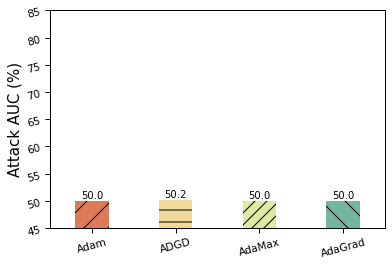

Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['server_attack']
[50.0]
[0.0, 0.02153050066403814, 0.0, 0.0]
Labels
['Adam', 'ADGD', 'AdaMax', 'AdaGrad']
[50.0, 50.0, 50.0, 50.0]
None


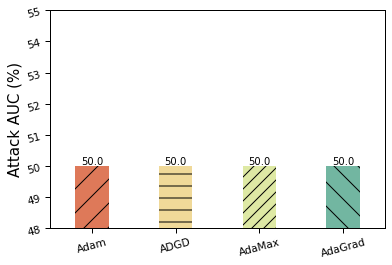

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.90269612811676, 58.78775592945469, 58.92965740928441, 58.92965740928441, 58.74052300831138, 58.55138860733833, 58.97020068923576, 58.86884248935738, 58.956821406851816, 58.56476788972228]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.48368132981958, 59.76079464828704, 58.58503952969796, 58.808027569430365, 59.193188728968174, 59.11210216906547, 59.37563348874924, 59.33509020879789, 59.51753496857896, 60.0243259679708]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'cli

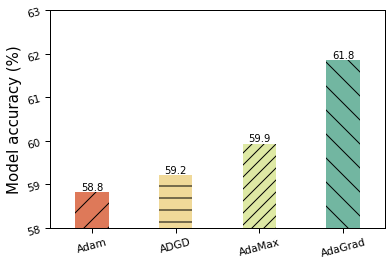

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.90269612811676, 58.78775592945469, 58.92965740928441, 58.92965740928441, 58.74052300831138, 58.55138860733833, 58.97020068923576, 58.86884248935738, 58.956821406851816, 58.56476788972228]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.48368132981958, 59.76079464828704, 58.58503952969796, 58.808027569430365, 59.193188728968174, 59.

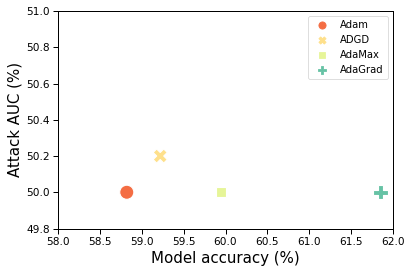

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.90269612811676, 58.78775592945469, 58.92965740928441, 58.92965740928441, 58.74052300831138, 58.55138860733833, 58.97020068923576, 58.86884248935738, 58.956821406851816, 58.56476788972228]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.48368132981958, 59.76079464828704, 58.58503952969796, 58.808027569430365, 59.193188728968174, 59.11210216906547, 59.37563348874924, 59.33509020879789, 59.51753496857896, 60.0243259679708]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_

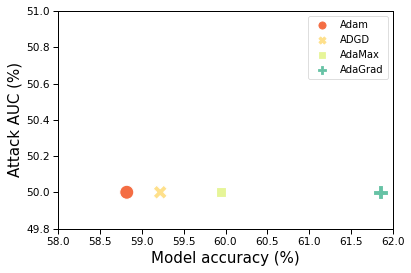

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


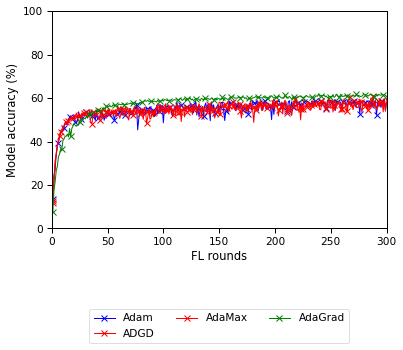

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


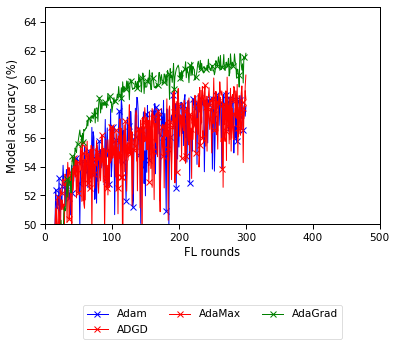

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


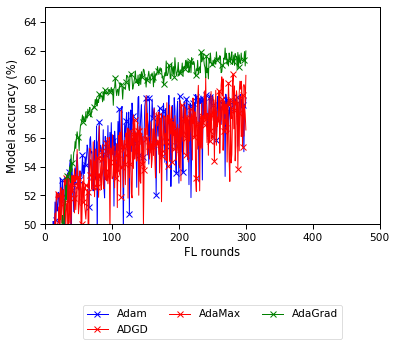

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


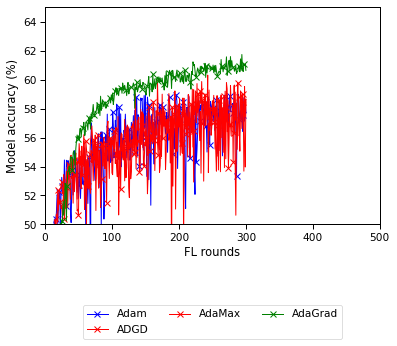

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


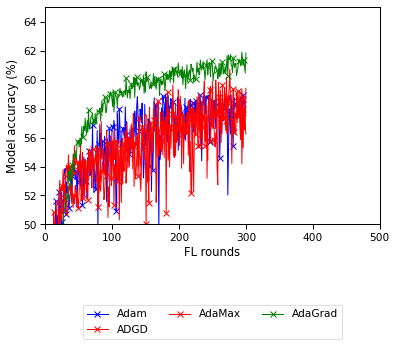

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


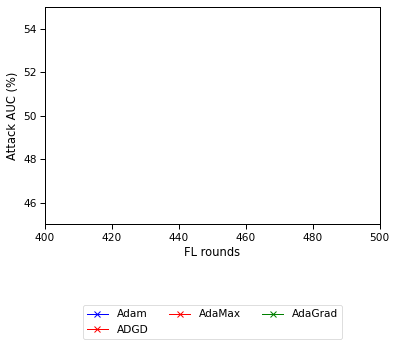

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


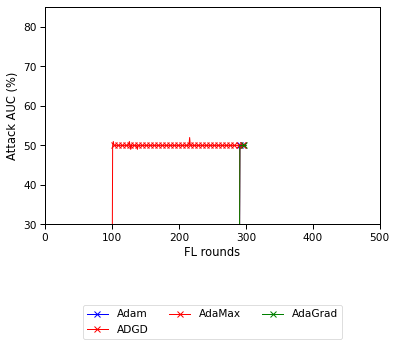

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


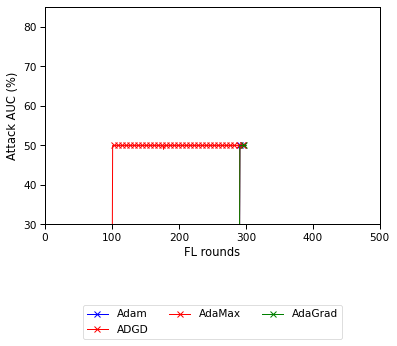

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


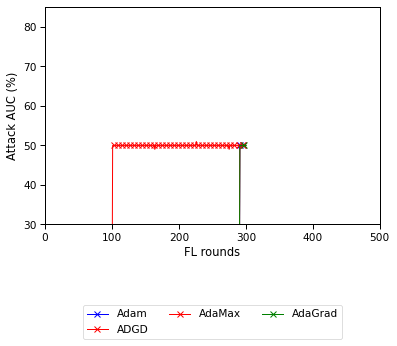

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


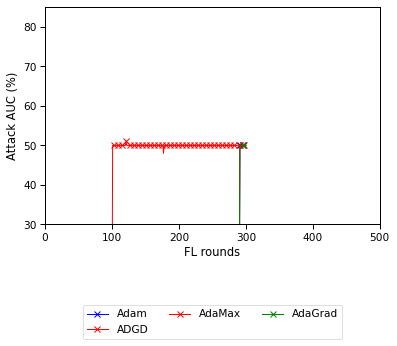

Adam
300
ADGD
300
AdaMax
300
AdaGrad
300


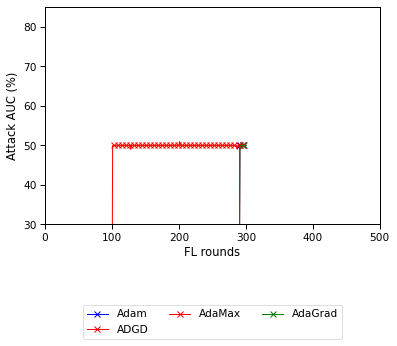

In [35]:
r = 300

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 85, average=True, label_rotation=15)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 48, 55, average=True, label_rotation=15)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 58, 63, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49.8, 51, 58, 62, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49.8, 51, 58, 62, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 300, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Loss Analysis

In [605]:
          plot_config = {
                "dataset_name": "utility_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[
                                        {
                            "exp_name" : "No Defense/Adam",
                            "file_path": "/home2/cboscher/code/pastel2.0/results/ppm_baseline_300_purchase.csv",
                            "color": "steelblue",
                            "symbol" : "o"
                        },

                    {
                            "exp_name" : "PASTEL/Adam",
                            "file_path": "/home2/cboscher/code/pastel2.0/results/ppm_adam_purchase.csv",
                            "color": "orange",
                            "symbol" : "X"
                        },
                                                                                           {
                            "exp_name" : "PASTEL/ADGD",
                            "file_path": "ppm_pastel_features6_classifier_adgd_accel_purchase.csv",
                            "color": "lightseagreen",
                            "symbol" : "s"},
                        
                                                                                        
                    {
                            "exp_name" : "PASTEL/AdaMax",
                            "file_path": "/home2/cboscher/code/pastel2.0/results/ppm_adamax_purchase.csv",
                            "color": "chocolate",
                            "symbol" : "P"
                        },
                    
                    
                        {
                            "exp_name" : "PASTEL/AdaGrad",
                            "file_path": "/home2/cboscher/code/pastel2.0/results/ppm_adagrad_purchase.csv",
                            "color": "orchid",
                            "symbol" : "D"
                        }  
                                                                                                     
    
                ]
          }
                    
                    
                    

Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[76.0, 81.0, 77.0, 80.0, 77.0, 80.0, 79.0, 80.0, 75.0, 76.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0, 51.0, 50.0, 50.0, 50.0, 50.0, 51.0, 50.0, 50.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
Columns to aggregate
['clien

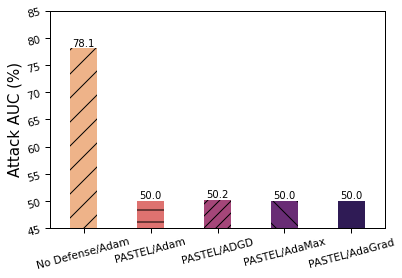

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.90269612811676, 58.78775592945469, 58.92965740928441, 58.92965740928441, 58.74052300831138, 58.55138860733833, 58.97020068923576, 58.86884248935738, 58.956821406851816, 58.56476788972228]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'clien

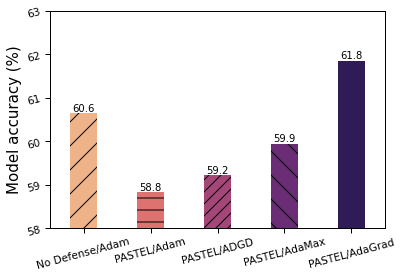

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[76.0, 81.0, 77.0, 80.0, 77.0, 80.0, 79.0, 80.0, 75.0, 76.0]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.90269612811676, 58.78775592945469, 58.92965740928441, 58.92965740928441, 58.74052300831138, 58.5513

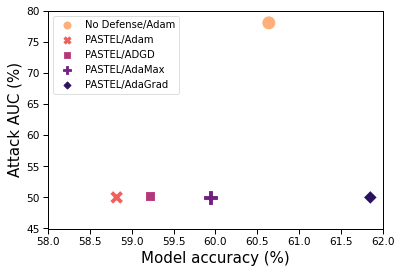

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61.443340766268, 60.22704236772755, 60.61220352726535, 59.98378268801946]
Columns to aggregate
['server_attack']
[74.79221569024934]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[58.90269612811676, 58.78775592945469, 58.92965740928441, 58.92965740928441, 58.74052300831138, 58.55138860733833, 58.97020068923576, 58.86884248935738, 58.956821406851816, 58.56476788972228]
Columns to aggregate
['server_attack']
[50.0]
Columns to aggregate
['client_accuracy_1', 'clien

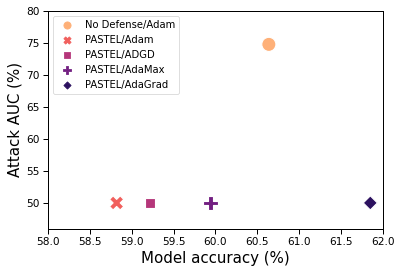

No Defense/Adam
300
PASTEL/Adam
300
PASTEL/ADGD
300
PASTEL/AdaMax
300
PASTEL/AdaGrad
300


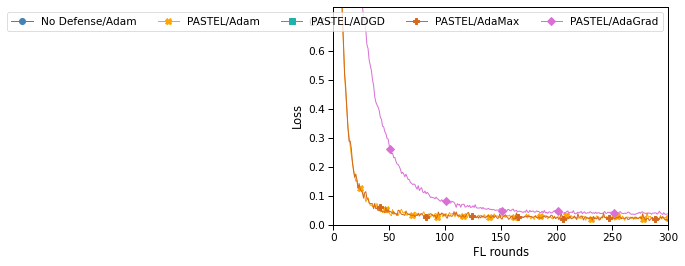

No Defense/Adam
300
PASTEL/Adam
300
PASTEL/ADGD
300
PASTEL/AdaMax
300
PASTEL/AdaGrad
300


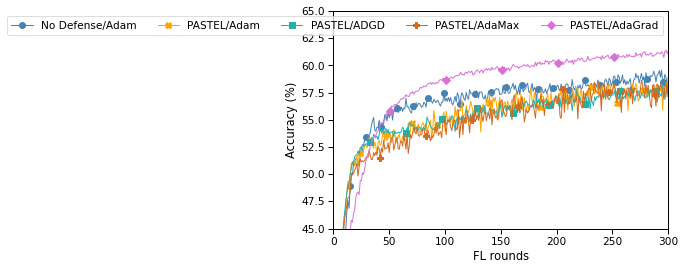

In [606]:
r = 300
generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 85, average=True, label_rotation=15)

generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 58, 63, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 45, 80, 58, 62, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 46, 80, 58, 62, average=True)

generate_xy_plot(plot_config, 'local_models_loss', 'Loss', 'client_loss', 0, 0.75, min_x=0, max_x = 300, average=True, max_range=r)
generate_xy_plot(plot_config, 'local_models_accuracy', 'Accuracy (%)', 'client_accuracy',45, 65, min_x=0, max_x = 300, average=True, max_range=r)


### Celeba ResNet all layers

In [17]:
          plot_config = {
                "dataset_name": "celeba_resnet_layer_analysis_adam",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                                            {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_resnet.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },


                    {
                            "exp_name" : "1.0 - C1",
                            "file_path": "ppm_pastel_layer1.0_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.0 - BN1",
                            "file_path": "ppm_pastel_layer1.0_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.0 - C2",
                            "file_path": "ppm_pastel_layer1.0_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.0 - BN2",
                            "file_path": "ppm_pastel_layer1.0_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "1.1 - C1",
                            "file_path": "ppm_pastel_layer1.0_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.1 - BN1",
                            "file_path": "ppm_pastel_layer1.1_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.1 - C2",
                            "file_path": "ppm_pastel_layer1.0_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.1 - BN2",
                            "file_path": "ppm_pastel_layer1.1_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "1.2 - C1",
                            "file_path": "ppm_pastel_layer1.2_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.2 - BN1",
                            "file_path": "ppm_pastel_layer1.2_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.2 - C2",
                            "file_path": "ppm_pastel_layer1.2_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.2 - BN2",
                            "file_path": "ppm_pastel_layer1.2_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },



                                      {
                            "exp_name" : "2.0 - C1",
                            "file_path": "ppm_pastel_layer2.0_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.0 - BN1",
                            "file_path": "ppm_pastel_layer2.0_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.0 - C2",
                            "file_path": "ppm_pastel_layer2.0_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.0 - BN2",
                            "file_path": "ppm_pastel_layer2.0_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "2.1 - C1",
                            "file_path": "ppm_pastel_layer2.0_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.1 - BN1",
                            "file_path": "ppm_pastel_layer2.1_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.1 - C2",
                            "file_path": "ppm_pastel_layer2.0_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.1 - BN2",
                            "file_path": "ppm_pastel_layer2.1_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "2.2 - C1",
                            "file_path": "ppm_pastel_layer2.2_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.2 - BN1",
                            "file_path": "ppm_pastel_layer2.2_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.2 - C2",
                            "file_path": "ppm_pastel_layer2.2_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.2 - BN2",
                            "file_path": "ppm_pastel_layer2.2_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.0 - C1",
                            "file_path": "ppm_pastel_layer3.0_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.0 - BN1",
                            "file_path": "ppm_pastel_layer3.0_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.0 - C2",
                            "file_path": "ppm_pastel_layer3.0_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.0 - BN2",
                            "file_path": "ppm_pastel_layer3.0_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.1 - C1",
                            "file_path": "ppm_pastel_layer3.0_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.1 - BN1",
                            "file_path": "ppm_pastel_layer3.1_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.1 - C2",
                            "file_path": "ppm_pastel_layer3.0_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.1 - BN2",
                            "file_path": "ppm_pastel_layer3.1_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.2 - C1",
                            "file_path": "ppm_pastel_layer3.2_conv1_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.2 - BN1",
                            "file_path": "ppm_pastel_layer3.2_bn1_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.2 - C2",
                            "file_path": "ppm_pastel_layer3.2_conv2_true_adam_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.2 - BN2",
                            "file_path": "ppm_pastel_layer3.2_bn2_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },
                  
                                                                                  {
                            "exp_name" : "FC",
                            "file_path": "ppm_pastel_linear_true_adam_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        }
                ]
          }



                    
                    
                    

Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[54.333333333333336, 60.00000000000001, 53.66666666666667, 54.66666666666666, 55.333333333333336]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[52.33333333333333, 53.66666666666666, 55.66666666666666, 55.66666666666666, 54.66666666666666]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[54.66666666666666, 50.66666666666666, 52.33333333333333, 54.333333333333336, 56.333333333333336]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[54.0, 55.00000000000001, 52.0, 52.33333333333334, 55.66666666666666]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[54.0, 55.66666666666666, 54.0, 52.66666666666667, 53.0]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', '

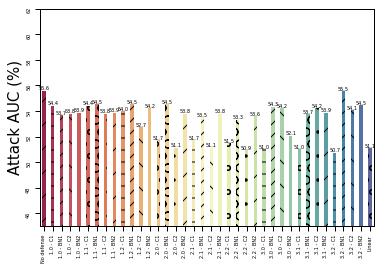

Columns to aggregate
['server_attack']
[55.53333333333333]
Columns to aggregate
['server_attack']
[50.94]
Columns to aggregate
['server_attack']
[50.513333333333335]
Columns to aggregate
['server_attack']
[50.71333333333333]
Columns to aggregate
['server_attack']
[50.74]
Columns to aggregate
['server_attack']
[50.94]
Columns to aggregate
['server_attack']
[50.74]
Columns to aggregate
['server_attack']
[50.71333333333333]
Columns to aggregate
['server_attack']
[50.66666666666667]
Columns to aggregate
['server_attack']
[50.41333333333333]
Columns to aggregate
['server_attack']
[52.68000000000001]
Columns to aggregate
['server_attack']
[50.42666666666666]
Columns to aggregate
['server_attack']
[51.42666666666666]
Columns to aggregate
['server_attack']
[50.55333333333333]
Columns to aggregate
['server_attack']
[51.55333333333333]
Columns to aggregate
['server_attack']
[50.10666666666667]
Columns to aggregate
['server_attack']
[50.4]
Columns to aggregate
['server_attack']
[50.55333333333333

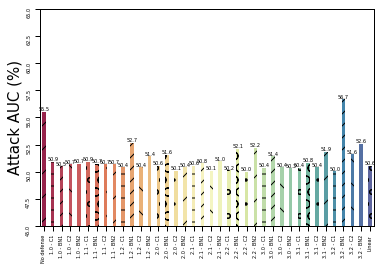

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[63.14666666666666, 64.21333333333334, 64.26666666666667, 64.65333333333334, 64.0]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[62.63999999999999, 63.10666666666667, 63.38666666666667, 65.34666666666666, 64.88000000000001]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[64.32, 62.50666666666667, 64.92, 62.373333333333335, 65.54666666666667]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[65.49333333333334, 65.13333333333333, 66.41333333333334, 63.63999999999999, 62.81333333333333]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[62.8266666666666

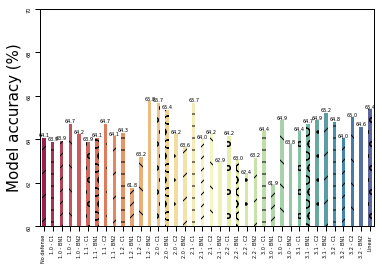

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[63.14666666666666, 64.21333333333334, 64.26666666666667, 64.65333333333334, 64.0]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[54.333333333333336, 60.00000000000001, 53.66666666666667, 54.66666666666666, 55.333333333333336]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[62.63999999999999, 63.10666666666667, 63.38666666666667, 65.34666666666666, 64.88000000000001]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[52.33333333333333, 53.66666666666666, 55.66666666666666, 55.66666666666666, 54.66666666666666]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[64.32, 62.50666666666667, 64.92, 62.37333

Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[50.0, 52.0, 51.66666666666666, 50.0, 51.0]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[62.693333333333335, 62.82666666666666, 63.14666666666666, 63.8, 63.306666666666665]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[52.33333333333333, 52.33333333333333, 56.99999999999999, 53.333333333333336, 53.0]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[63.70666666666666, 63.68000000000001, 64.82666666666667, 65.60000000000001, 63.973333333333336]
Columns to aggregate
['client_auc_2', 'client_auc_0', 'client_auc_1', 'client_auc_4', 'client_auc_3']
[52.33333333333333, 51.66666666666666, 50.0, 50.0, 51.0]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_a

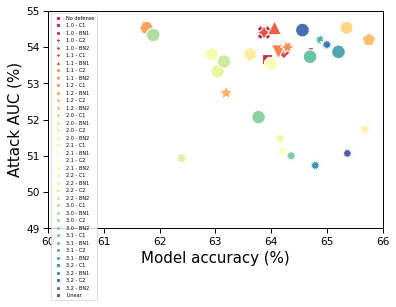

Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[63.14666666666666, 64.21333333333334, 64.26666666666667, 64.65333333333334, 64.0]
Columns to aggregate
['server_attack']
[55.53333333333333]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[62.63999999999999, 63.10666666666667, 63.38666666666667, 65.34666666666666, 64.88000000000001]
Columns to aggregate
['server_attack']
[50.94]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[64.32, 62.50666666666667, 64.92, 62.373333333333335, 65.54666666666667]
Columns to aggregate
['server_attack']
[50.513333333333335]
Columns to aggregate
['client_accuracy_2', 'client_accuracy_0', 'client_accuracy_1', 'client_accuracy_4', 'client_accuracy_3']
[65.49333333333334, 65.13333333333333, 66.41333333333334, 63.6399999999999

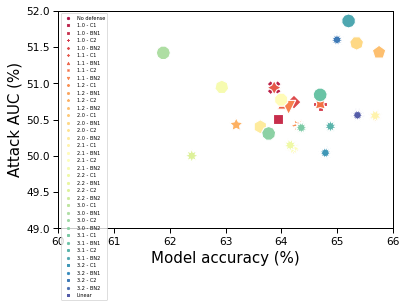

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


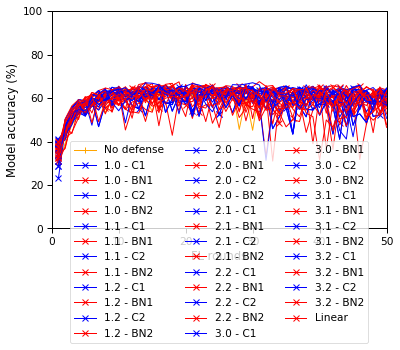

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


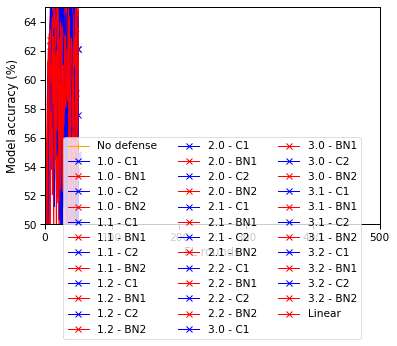

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


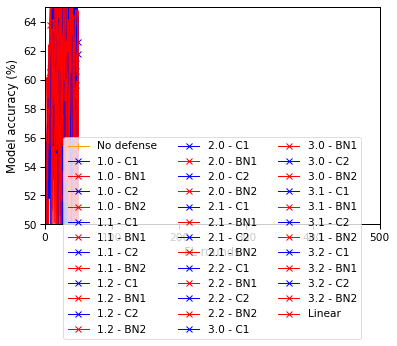

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


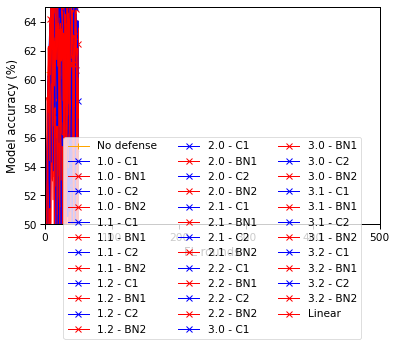

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


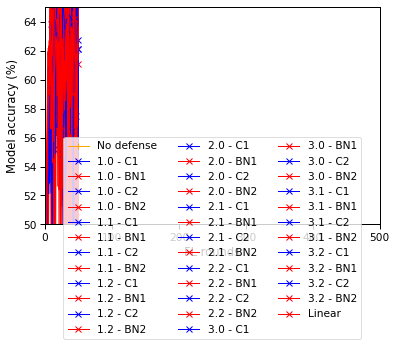

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


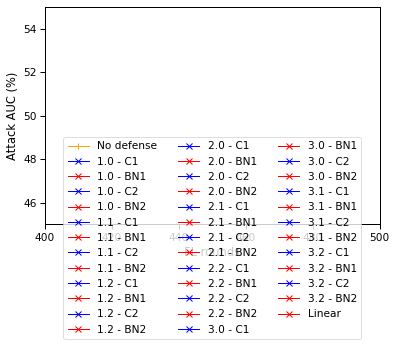

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


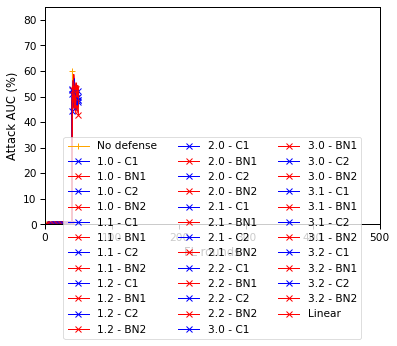

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


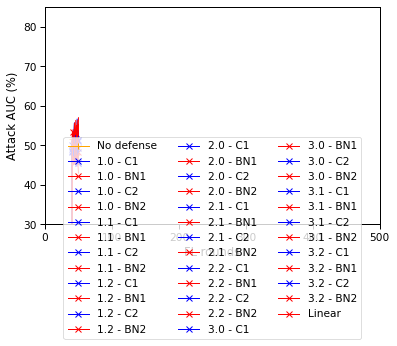

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


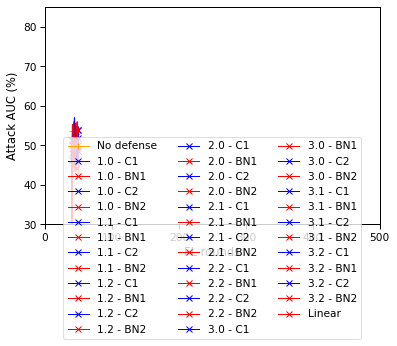

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


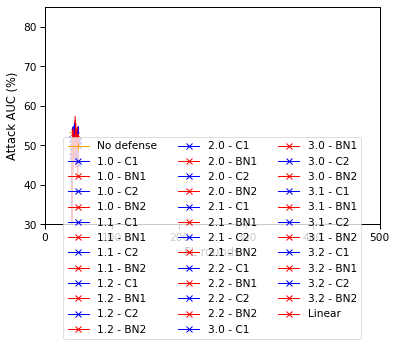

No defense
50
1.0 - C1
50
1.0 - BN1
50
1.0 - C2
50
1.0 - BN2
50
1.1 - C1
50
1.1 - BN1
50
1.1 - C2
50
1.1 - BN2
50
1.2 - C1
50
1.2 - BN1
50
1.2 - C2
50
1.2 - BN2
50
2.0 - C1
50
2.0 - BN1
50
2.0 - C2
50
2.0 - BN2
50
2.1 - C1
50
2.1 - BN1
50
2.1 - C2
50
2.1 - BN2
50
2.2 - C1
50
2.2 - BN1
50
2.2 - C2
50
2.2 - BN2
50
3.0 - C1
50
3.0 - BN1
50
3.0 - C2
50
3.0 - BN2
50
3.1 - C1
50
3.1 - BN1
50
3.1 - C2
50
3.1 - BN2
50
3.2 - C1
50
3.2 - BN1
50
3.2 - C2
50
3.2 - BN2
50
Linear
50


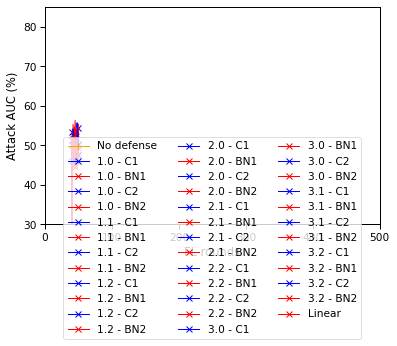

In [18]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 60, 70, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 55, 60, 66, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 52, 60, 66, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

In [ ]:
          plot_config = {
                "dataset_name": "celeba_resnet_layer_analysis_adagrad",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[

                                            {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_celeba_resnet.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },


                    {
                            "exp_name" : "1.0 - C1",
                            "file_path": "ppm_pastel_layer1.0_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.0 - BN1",
                            "file_path": "ppm_pastel_layer1.0_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.0 - C2",
                            "file_path": "ppm_pastel_layer1.0_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.0 - BN2",
                            "file_path": "ppm_pastel_layer1.0_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "1.1 - C1",
                            "file_path": "ppm_pastel_layer1.0_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.1 - BN1",
                            "file_path": "ppm_pastel_layer1.1_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.1 - C2",
                            "file_path": "ppm_pastel_layer1.0_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.1 - BN2",
                            "file_path": "ppm_pastel_layer1.1_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "1.2 - C1",
                            "file_path": "ppm_pastel_layer1.2_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.2 - BN1",
                            "file_path": "ppm_pastel_layer1.2_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.2 - C2",
                            "file_path": "ppm_pastel_layer1.2_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.2 - BN2",
                            "file_path": "ppm_pastel_layer1.2_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },



                                      {
                            "exp_name" : "2.0 - C1",
                            "file_path": "ppm_pastel_layer2.0_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.0 - BN1",
                            "file_path": "ppm_pastel_layer2.0_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.0 - C2",
                            "file_path": "ppm_pastel_layer2.0_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.0 - BN2",
                            "file_path": "ppm_pastel_layer2.0_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "2.1 - C1",
                            "file_path": "ppm_pastel_layer2.0_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.1 - BN1",
                            "file_path": "ppm_pastel_layer2.1_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.1 - C2",
                            "file_path": "ppm_pastel_layer2.0_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.1 - BN2",
                            "file_path": "ppm_pastel_layer2.1_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "2.2 - C1",
                            "file_path": "ppm_pastel_layer2.2_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.2 - BN1",
                            "file_path": "ppm_pastel_layer2.2_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.2 - C2",
                            "file_path": "ppm_pastel_layer2.2_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.2 - BN2",
                            "file_path": "ppm_pastel_layer2.2_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.0 - C1",
                            "file_path": "ppm_pastel_layer3.0_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.0 - BN1",
                            "file_path": "ppm_pastel_layer3.0_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.0 - C2",
                            "file_path": "ppm_pastel_layer3.0_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.0 - BN2",
                            "file_path": "ppm_pastel_layer3.0_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.1 - C1",
                            "file_path": "ppm_pastel_layer3.0_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.1 - BN1",
                            "file_path": "ppm_pastel_layer3.1_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.1 - C2",
                            "file_path": "ppm_pastel_layer3.0_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.1 - BN2",
                            "file_path": "ppm_pastel_layer3.1_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.2 - C1",
                            "file_path": "ppm_pastel_layer3.2_conv1_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.2 - BN1",
                            "file_path": "ppm_pastel_layer3.2_bn1_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.2 - C2",
                            "file_path": "ppm_pastel_layer3.2_conv2_true_adagrad_celeba_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.2 - BN2",
                            "file_path": "ppm_pastel_layer3.2_bn2_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },
                  
                                                                                  {
                            "exp_name" : "Linear",
                            "file_path": "ppm_pastel_linear_true_adagrad_celeba_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        }
                ]
          }



                    
                    
                    

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 60, 70, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 57, 60, 66, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 52, 60, 66, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True,  max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### GTSRB VGG PASTEL-P

In [ ]:
plot_config = {
                "dataset_name": "gtsrb_vgg_adam_layer_analysis",
                "dataset_pretty_name" : "gtsrb_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_gtsrb_vgg.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },
                          {
                            "exp_name" : "1 - C",
                            "file_path": "ppm_pastel_conv_true_adam_gtsrb_vgg.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                    
                    
                     {
                            "exp_name" : "1 - BN",
                            "file_path": "ppm_pastel_bn1_true_adam_gtsrb_vgg.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                                    {
                            "exp_name" : "2 - C",
                            "file_path": "ppm_pastel_conv2_true__adam_gtsrb_vgg.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                               
                                                {
                            "exp_name" : "2 - BN",
                            "file_path": "ppm_pastel_bn2_true_adam_gtsrb_vgg.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                                                  {
                            "exp_name" : "3 - C",
                            "file_path": "ppm_pastel_conv3_true_adam_gtsrb_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - BN",
                            "file_path": "ppm_pastel_bn3_true_adam_gtsrb_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                    
                                                                                                      {
                            "exp_name" : "4 - C",
                            "file_path": "ppm_pastel_conv4_true_adam_gtsrb_vgg.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - BN",
                            "file_path": "ppm_pastel_bn4_true_adam_gtsrb_vgg.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "5 - C",
                            "file_path": "ppm_pastel_conv5_true_adam_gtsrb_vgg.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                   {
                            "exp_name" : "6 - C",
                            "file_path": "ppm_pastel_conv6_true_adam_gtsrb_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "6 - BN",
                            "file_path": "ppm_pastel_bn6_true_adam_gtsrb_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                     
                                           {
                            "exp_name" : "7 - C",
                            "file_path": "ppm_pastel_conv7_true_adam_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                           {
                            "exp_name" : "7 - BN",
                            "file_path": "ppm_pastel_bn7_true_adam_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "8 - C",
                            "file_path": "ppm_pastel_conv8_true_adam_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "8 - BN",
                            "file_path": "ppm_pastel_bn8_true_adam_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                                    {
                            "exp_name" : "FC",
                            "file_path": "ppm_pastel_linear_true_adam_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                }
                    
   
                    
                    
                    ]
                }

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 90, 99, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 54, 99.4, 99.7, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49.8, 50.5,99.4 , 99.7, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True,  max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### GTSRB VGG PASTEL

In [ ]:
plot_config = {
                "dataset_name": "gtsrb_vgg_adagrad_layer_analysis",
                "dataset_pretty_name" : "gtsrb_ResNet",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_gtsrb_vgg.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },
                          {
                            "exp_name" : "1 - C",
                            "file_path": "ppm_pastel_conv_true_adagrad_gtsrb_vgg.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                    
                    
                     {
                            "exp_name" : "1 - BN",
                            "file_path": "ppm_pastel_bn1_true_adagrad_gtsrb_vgg.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                                    {
                            "exp_name" : "2 - C",
                            "file_path": "ppm_pastel_conv2_true__adagrad_gtsrb_vgg.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                               
                                                {
                            "exp_name" : "2 - BN",
                            "file_path": "ppm_pastel_bn2_true__adagrad_gtsrb_vgg.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                                                  {
                            "exp_name" : "3 - C",
                            "file_path": "ppm_pastel_conv3_true_adagrad_gtsrb_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - BN",
                            "file_path": "ppm_pastel_bn3_true_adagrad_gtsrb_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                    
                                                                                                      {
                            "exp_name" : "4 - C",
                            "file_path": "ppm_pastel_conv4_true_adagrad_gtsrb_vgg.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - BN",
                            "file_path": "ppm_pastel_bn4_true_adagrad_gtsrb_vgg.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "5 - C",
                            "file_path": "ppm_pastel_conv5_true_adagrad_gtsrb_vgg.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                   {
                            "exp_name" : "6 - C",
                            "file_path": "ppm_pastel_conv6_true_adagrad_gtsrb_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "6 - BN",
                            "file_path": "ppm_pastel_bn6_true_adagrad_gtsrb_vgg.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                     
                                           {
                            "exp_name" : "7 - C",
                            "file_path": "ppm_pastel_conv7_true_adagrad_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                           {
                            "exp_name" : "7 - BN",
                            "file_path": "ppm_pastel_bn7_true_adagrad_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "8 - C",
                            "file_path": "ppm_pastel_conv8_true_adgrad_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "8 - BN",
                            "file_path": "ppm_pastel_bn8_true_adgrad_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                    
                                                                    {
                            "exp_name" : "FC",
                            "file_path": "ppm_pastel_linear_true_adagrad_gtsrb_vgg.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },

                    
   
                    
                    
                    ]
                }

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 96, 100, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 54, 99.4, 99.7, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49.8, 50.5, 99.4 , 99.7, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True,  max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### GTSRB Resnet Pastel-P

In [ ]:
          plot_config = {
                "dataset_name": "gtsrb_resnet_layer_analysis_adam",
                "dataset_pretty_name" : "gtsrb_ResNet",

                "data":[

                                            {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_gtsrb_resnet.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },


                    {
                            "exp_name" : "1.0 - C1",
                            "file_path": "ppm_pastel_layer1.0_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.0 - BN1",
                            "file_path": "ppm_pastel_layer1.0_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.0 - C2",
                            "file_path": "ppm_pastel_layer1.0_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.0 - BN2",
                            "file_path": "ppm_pastel_layer1.0_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "1.1 - C1",
                            "file_path": "ppm_pastel_layer1.0_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.1 - BN1",
                            "file_path": "ppm_pastel_layer1.1_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.1 - C2",
                            "file_path": "ppm_pastel_layer1.0_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.1 - BN2",
                            "file_path": "ppm_pastel_layer1.1_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "1.2 - C1",
                            "file_path": "ppm_pastel_layer1.2_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.2 - BN1",
                            "file_path": "ppm_pastel_layer1.2_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.2 - C2",
                            "file_path": "ppm_pastel_layer1.2_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.2 - BN2",
                            "file_path": "ppm_pastel_layer1.2_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },



                                      {
                            "exp_name" : "2.0 - C1",
                            "file_path": "ppm_pastel_layer2.0_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.0 - BN1",
                            "file_path": "ppm_pastel_layer2.0_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.0 - C2",
                            "file_path": "ppm_pastel_layer2.0_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.0 - BN2",
                            "file_path": "ppm_pastel_layer2.0_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "2.1 - C1",
                            "file_path": "ppm_pastel_layer2.0_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.1 - BN1",
                            "file_path": "ppm_pastel_layer2.1_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.1 - C2",
                            "file_path": "ppm_pastel_layer2.0_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.1 - BN2",
                            "file_path": "ppm_pastel_layer2.1_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "2.2 - C1",
                            "file_path": "ppm_pastel_layer2.2_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.2 - BN1",
                            "file_path": "ppm_pastel_layer2.2_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.2 - C2",
                            "file_path": "ppm_pastel_layer2.2_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.2 - BN2",
                            "file_path": "ppm_pastel_layer2.2_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.0 - C1",
                            "file_path": "ppm_pastel_layer3.0_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.0 - BN1",
                            "file_path": "ppm_pastel_layer3.0_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.0 - C2",
                            "file_path": "ppm_pastel_layer3.0_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.0 - BN2",
                            "file_path": "ppm_pastel_layer3.0_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.1 - C1",
                            "file_path": "ppm_pastel_layer3.0_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.1 - BN1",
                            "file_path": "ppm_pastel_layer3.1_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.1 - C2",
                            "file_path": "ppm_pastel_layer3.0_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.1 - BN2",
                            "file_path": "ppm_pastel_layer3.1_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.2 - C1",
                            "file_path": "ppm_pastel_layer3.2_conv1_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.2 - BN1",
                            "file_path": "ppm_pastel_layer3.2_bn1_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.2 - C2",
                            "file_path": "ppm_pastel_layer3.2_conv2_true_adam_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.2 - BN2",
                            "file_path": "ppm_pastel_layer3.2_bn2_true_adam_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        }
                ]
          }



                    
                    
                    

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 90, 99, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 57, 98, 100, average=True,markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 52,98 , 100, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True,  max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### GTSRB - ResNet - PASTEL

In [ ]:
          plot_config = {
                "dataset_name": "gtsrb_resnet_layer_analysis_adagrad",
                "dataset_pretty_name" : "gtsrb_ResNet",

                "data":[

                                            {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_gtsrb_resnet.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },


                    {
                            "exp_name" : "1.0 - C1",
                            "file_path": "ppm_pastel_layer1.0_conv1_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.0 - BN1",
                            "file_path": "ppm_pastel_layer1.0_bn1_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.0 - C2",
                            "file_path": "ppm_pastel_layer1.0_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.0 - BN2",
                            "file_path": "ppm_pastel_layer1.0_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "1.1 - C1",
                            "file_path": "ppm_pastel_layer1.0_conv1_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.1 - BN1",
                            "file_path": "ppm_pastel_layer1.1_bn1_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.1 - C2",
                            "file_path": "ppm_pastel_layer1.0_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.1 - BN2",
                            "file_path": "ppm_pastel_layer1.1_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "1.2 - C1",
                            "file_path": "ppm_pastel_layer1.2_conv1_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.2 - BN1",
                            "file_path": "ppm_pastel_layer1.2_bn1_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "1.2 - C2",
                            "file_path": "ppm_pastel_layer1.2_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "1.2 - BN2",
                            "file_path": "ppm_pastel_layer1.2_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },



                                      {
                            "exp_name" : "2.0 - C1",
                            "file_path": "ppm_pastel_layer2.0_conv1_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.0 - BN1",
                            "file_path": "ppm_pastel_layer2.0_bn1_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.0 - C2",
                            "file_path": "ppm_pastel_layer2.0_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.0 - BN2",
                            "file_path": "ppm_pastel_layer2.0_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "2.1 - C1",
                            "file_path": "ppm_pastel_layer2.1_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.1 - BN1",
                            "file_path": "ppm_pastel_layer2.1_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.1 - C2",
                            "file_path": "ppm_pastel_layer2.1_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.1 - BN2",
                            "file_path": "ppm_pastel_layer2.1_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "2.2 - C1",
                            "file_path": "ppm_pastel_layer2.2_conv1_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.2 - BN1",
                            "file_path": "ppm_pastel_layer2.2_bn1_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "2.2 - C2",
                            "file_path": "ppm_pastel_layer2.2_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "2.2 - BN2",
                            "file_path": "ppm_pastel_layer2.2_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.0 - C1",
                            "file_path": "ppm_pastel_layer3.0_conv1_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.0 - BN1",
                            "file_path": "ppm_pastel_layer3.0_bn1_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.0 - C2",
                            "file_path": "ppm_pastel_layer3.0_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.0 - BN2",
                            "file_path": "ppm_pastel_layer3.0_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.1 - C1",
                            "file_path": "ppm_pastel_layer3.0_conv1_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.1 - BN1",
                            "file_path": "ppm_pastel_layer3.1_bn1_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.1 - C2",
                            "file_path": "ppm_pastel_layer3.0_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.1 - BN2",
                            "file_path": "ppm_pastel_layer3.1_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },


                                      {
                            "exp_name" : "3.2 - C1",
                            "file_path": "ppm_pastel_layer3.2_conv1_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.2 - BN1",
                            "file_path": "ppm_pastel_layer3.2_bn1_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        },

                                        {
                            "exp_name" : "3.2 - C2",
                            "file_path": "ppm_pastel_layer3.2_conv2_true_adagrad_gtsrb_resnet.csv",
                            "color": "blue",
                            "symbol" : "x"
                        },

                                                                {
                            "exp_name" : "3.2 - BN2",
                            "file_path": "ppm_pastel_layer3.2_bn2_true_adagrad_gtsrb_resnet.csv",
                            "color": "red",
                            "symbol" : "x"
                        }
                ]
          }



                    
                    
                    

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 90, 99, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 57, 98, 100, average=True,markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 52,98 , 100, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True,  max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

### Speech Commands

In [76]:
plot_config = {
                "dataset_name": "speechcommands_adam_layer_analysis",
                "dataset_pretty_name" : "speechcommands",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_speechcommands.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },
                          {
                            "exp_name" : "1 - C",
                            "file_path": "ppm_pastel_conv1_true_adam_speechcommands.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                    
                    
                     {
                            "exp_name" : "1 - BN",
                            "file_path": "ppm_pastel_bn1_true_adam_speechcommands.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                                    {
                            "exp_name" : "2 - C",
                            "file_path": "ppm_pastel_conv2_true_adam_speechcommands.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                               
                                                {
                            "exp_name" : "2 - BN2",
                            "file_path": "ppm_pastel_bn2_true_adam_speechcommands.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                                                  {
                            "exp_name" : "3 - C",
                            "file_path": "ppm_pastel_conv3_true_adam_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - BN",
                            "file_path": "ppm_pastel_bn3_true_adam_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                    
                                                                                                      {
                            "exp_name" : "4 - C",
                            "file_path": "ppm_pastel_conv4_true_adam_speechcommands.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - BN",
                            "file_path": "ppm_pastel_bn4_true_adam_speechcommands.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "5 - C",
                            "file_path": "ppm_pastel_conv5_true_adam_speechcommands.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                   {
                            "exp_name" : "6 - C",
                            "file_path": "ppm_pastel_conv6_true_adam_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "6 - BN",
                            "file_path": "ppm_pastel_bn6_true_adam_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                     
                                           {
                            "exp_name" : "7 - C",
                            "file_path": "ppm_pastel_conv7_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                           {
                            "exp_name" : "7 - BN",
                            "file_path": "ppm_pastel_bn7_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "8 - C",
                            "file_path": "ppm_pastel_conv8_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "8 - BN",
                            "file_path": "ppm_pastel_bn8_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                    
                         {
                            "exp_name" : "9 - C",
                            "file_path": "ppm_pastel_conv9_true_adam_speechcommands.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                    
                    
                     {
                            "exp_name" : "9 - BN",
                            "file_path": "ppm_pastel_bn9_true_adam_speechcommands.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                                    {
                            "exp_name" : "10 - C",
                            "file_path": "ppm_pastel_conv10_true_adam_speechcommands.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                               
                                                {
                            "exp_name" : "10 - BN",
                            "file_path": "ppm_pastel_bn10_true_adam_speechcommands.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                                                  {
                            "exp_name" : "11 - C",
                            "file_path": "ppm_pastel_conv11_true_adam_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "11 - BN",
                            "file_path": "ppm_pastel_bn11_true_adam_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                    
                                                                                                      {
                            "exp_name" : "12 - C",
                            "file_path": "ppm_pastel_conv12_true_adam_speechcommands.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "12 - BN",
                            "file_path": "ppm_pastel_bn12_true_adam_speechcommands.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "13 - C",
                            "file_path": "ppm_pastel_conv13_true_adam_speechcommands.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                 {
                            "exp_name" : "13 - C",
                            "file_path": "ppm_pastel_bn13_true_adam_speechcommands.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                   {
                            "exp_name" : "14 - C",
                            "file_path": "ppm_pastel_conv14_true_adam_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "14 - BN",
                            "file_path": "ppm_pastel_bn14_true_adam_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                     
                                           {
                            "exp_name" : "15 - C",
                            "file_path": "ppm_pastel_conv15_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                           {
                            "exp_name" : "15 - BN",
                            "file_path": "ppm_pastel_bn15_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "16 - C",
                            "file_path": "ppm_pastel_conv16_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "16 - BN",
                            "file_path": "ppm_pastel_bn16_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                                                        {
                            "exp_name" : "17 - C",
                            "file_path": "ppm_pastel_conv17_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "17 - BN",
                            "file_path": "ppm_pastel_bn17_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                                    {
                            "exp_name" : "Linear",
                            "file_path": "ppm_pastel_linear_true_adam_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                }
                    
                    
                    ]
                }

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 60, 100, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 55, 84.5, 87, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 55, 84.5, 87, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True,  max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

In [ ]:
plot_config = {
                "dataset_name": "speechcommands_adagrad_layer_analysis",
                "dataset_pretty_name" : "speechcommands",

                "data":[

                        {
                            "exp_name" : "No defense",
                            "file_path": "ppm_baseline_speechcommands.csv",
                            "color": "orange",
                            "symbol" : "+"
                        },
                          {
                            "exp_name" : "1 - C",
                            "file_path": "ppm_pastel_conv1_true_adagrad_speechcommands.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                    
                    
                     {
                            "exp_name" : "1 - BN",
                            "file_path": "ppm_pastel_bn1_true_adagrad_speechcommands.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                                    {
                            "exp_name" : "2 - C",
                            "file_path": "ppm_pastel_conv2_true_adagrad_speechcommands.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                               
                                                {
                            "exp_name" : "2 - BN2",
                            "file_path": "ppm_pastel_bn2_true_adagrad_speechcommands.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                                                  {
                            "exp_name" : "3 - C",
                            "file_path": "ppm_pastel_conv3_true_adagrad_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "3 - BN",
                            "file_path": "ppm_pastel_bn3_true_adagrad_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                    
                                                                                                      {
                            "exp_name" : "4 - C",
                            "file_path": "ppm_pastel_conv4_true_adagrad_speechcommands.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "4 - BN",
                            "file_path": "ppm_pastel_bn4_true_adagrad_speechcommands.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "5 - C",
                            "file_path": "ppm_pastel_conv5_true_adagrad_speechcommands.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                   {
                            "exp_name" : "6 - C",
                            "file_path": "ppm_pastel_conv6_true_adagrad_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "6 - BN",
                            "file_path": "ppm_pastel_bn6_true_adagrad_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                     
                                           {
                            "exp_name" : "7 - C",
                            "file_path": "ppm_pastel_conv7_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                           {
                            "exp_name" : "7 - BN",
                            "file_path": "ppm_pastel_bn7_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "8 - C",
                            "file_path": "ppm_pastel_conv8_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "8 - BN",
                            "file_path": "ppm_pastel_bn8_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                    
                         {
                            "exp_name" : "9 - C",
                            "file_path": "ppm_pastel_conv9_true_adagrad_speechcommands.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                    
                    
                     {
                            "exp_name" : "9 - BN",
                            "file_path": "ppm_pastel_bn9_true_adagrad_speechcommands.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                                                    {
                            "exp_name" : "10 - C",
                            "file_path": "ppm_pastel_conv10_true_adagrad_speechcommands.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                               
                                                {
                            "exp_name" : "10 - BN",
                            "file_path": "ppm_pastel_bn10_true_adagrad_speechcommands.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                                                  {
                            "exp_name" : "11 - C",
                            "file_path": "ppm_pastel_conv11_true_adagrad_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "11 - BN",
                            "file_path": "ppm_pastel_bn11_true_adagrad_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                    
                                                                                                      {
                            "exp_name" : "12 - C",
                            "file_path": "ppm_pastel_conv12_true_adagrad_speechcommands.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "12 - BN",
                            "file_path": "ppm_pastel_bn12_true_adagrad_speechcommands.csv",
                            "color": "pink",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "13 - C",
                            "file_path": "ppm_pastel_conv13_true_adagrad_speechcommands.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                 {
                            "exp_name" : "13 - C",
                            "file_path": "ppm_pastel_bn13_true_adagrad_speechcommands.csv",
                            "color": "yellow",
                            "symbol" : "x"
                        },
                                                                   {
                            "exp_name" : "14 - C",
                            "file_path": "ppm_pastel_conv14_true_adagrad_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                {
                            "exp_name" : "14 - BN",
                            "file_path": "ppm_pastel_bn14_true_adagrad_speechcommands.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                     
                                           {
                            "exp_name" : "15 - C",
                            "file_path": "ppm_pastel_conv15_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                           {
                            "exp_name" : "15 - BN",
                            "file_path": "ppm_pastel_bn15_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                        },
                                                                    {
                            "exp_name" : "16 - C",
                            "file_path": "ppm_pastel_conv16_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "16 - BN",
                            "file_path": "ppm_pastel_bn16_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                                                        {
                            "exp_name" : "17 - C",
                            "file_path": "ppm_pastel_conv17_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                {
                            "exp_name" : "17 - BN",
                            "file_path": "ppm_pastel_bn17_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                },
                                                                    {
                            "exp_name" : "Linear",
                            "file_path": "ppm_pastel_linear_true_adagrad_speechcommands.csv",
                            "color": "grey",
                            "symbol" : "x"
                                                }
                    
                    
                    ]
                }

In [ ]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 62, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 65, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 60, 100, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 55, 89, 91, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 55, 89, 91, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True,  max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

In [367]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_purchase_4_layers_normalized2.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['FC1'] = abs(aggregated_values['fc1_f'] - aggregated_values['fc1_f_test'])
results_by_layer_f['FC2'] = abs(aggregated_values['fc2_f'] - aggregated_values['fc2_f_test'])
results_by_layer_f['FC3'] = abs(aggregated_values['fc3_f'] - aggregated_values['fc3_f_test'])
results_by_layer_f['FC4'] = abs(aggregated_values['fc4_f'] - aggregated_values['fc4_f_test'])
#results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'] - aggregated_values['classifier_f_test'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'] - aggregated_values['fc1_inf_test'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'] - aggregated_values['fc2_inf_test'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc4_inf'] - aggregated_values['fc4_inf_test'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc3_inf'] - aggregated_values['fc3_inf_test'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'] - aggregated_values['classifier_inf_test'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'] - global_values['fc1_inf_test'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'] - global_values['fc2_inf_test'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3_inf'] - global_values['fc3_inf_test'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4_inf'] - global_values['fc4_inf_test'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'] - global_values['classifier_inf_test'])

In [368]:
results_by_layer_inf

{'FC1': 5.960464455334602e-09,
 'FC2': 0.0010430872440337913,
 'FC3': 0.0007718682289123979,
 'FC4': 0.001959049701690696}

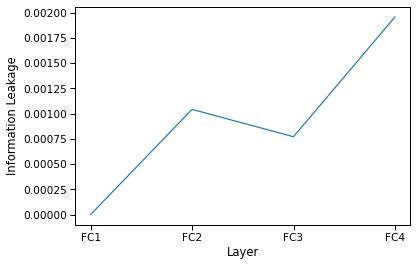

In [369]:
ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_purchase_4.png')
plt.show()



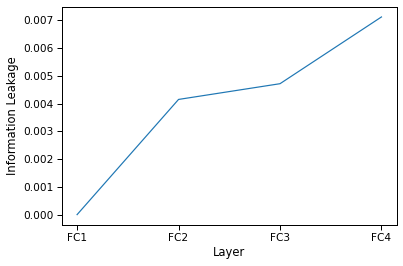

In [370]:
ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_purchase_4_global.png')
plt.show()

In [371]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_purchase_6_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['F1'] = abs(aggregated_values['fc1_f'] - aggregated_values['fc1_f_test'])
results_by_layer_f['F2'] = abs(aggregated_values['fc2_f'] - aggregated_values['fc2_f_test'])
results_by_layer_f['F3'] = abs(aggregated_values['fc3_f'] - aggregated_values['fc3_f_test'])
results_by_layer_f['F4'] = abs(aggregated_values['fc4_f'] - aggregated_values['fc4_f_test'])
#results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'] - aggregated_values['classifier_f_test'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'] - aggregated_values['fc1_inf_test'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'] - aggregated_values['fc2_inf_test'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3_inf'] - aggregated_values['fc3_inf_test'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4_inf'] - aggregated_values['fc4_inf_test'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5_inf'] - aggregated_values['fc5_inf_test'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6_inf'] - aggregated_values['fc6_inf_test'])


#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'] - aggregated_values['classifier_inf_test'])


global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'] - global_values['fc1_inf_test'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'] - global_values['fc2_inf_test'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3_inf'] - global_values['fc3_inf_test'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4_inf'] - global_values['fc4_inf_test'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5_inf'] - global_values['fc5_inf_test'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6_inf'] - global_values['fc6_inf_test'])

#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'] - global_values['classifier_inf_test'])

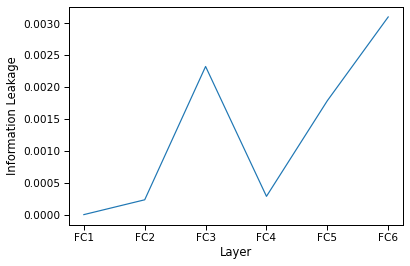

In [372]:
ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_purchase_6.png')
plt.show()

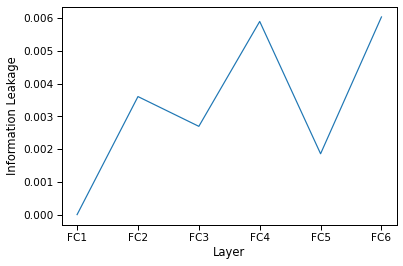

In [373]:
ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_purchase_6_global.png')
plt.show()

In [374]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_purchase_2_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
print(aggregated_values)

results_by_layer_f = {}

results_by_layer_f['FC1'] = abs(aggregated_values['fc1_f'] - aggregated_values['fc1_f_test'])
results_by_layer_f['FC2'] = abs(aggregated_values['fc2_f'] - aggregated_values['fc2_f_test'])

#results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'] - aggregated_values['classifier_f_test'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'] - aggregated_values['fc1_inf_test'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'] - aggregated_values['fc2_inf_test'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'] - aggregated_values['classifier_inf_test'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'] - global_values['fc1_inf_test'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'] - global_values['fc2_inf_test'])


#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'] - global_values['classifier_inf_test'])

{'fc1_f': 0.16006481796503066, 'fc1_1': 0.2720235466957092, 'fc1_inf': 0.5399942517280578, 'fc1_f_test': 0.16006481945514678, 'fc1_1_test': 0.2720235586166382, 'fc1_inf_test': 0.5399942338466645, 'fc2_f': 0.12860176637768744, 'fc2_1': 0.20501892119646073, 'fc2_inf': 0.5355387985706329, 'fc2_f_test': 0.12584888711571693, 'fc2_1_test': 0.20061255842447281, 'fc2_inf_test': 0.5366831421852112, 'classifier_f': 0.15027673095464705, 'classifier_1': 0.24956170171499253, 'classifier_inf': 0.5281101644039154, 'classifier_f_test': 0.14716214835643768, 'classifier_1_test': 0.2443617820739746, 'classifier_inf_test': 0.530174458026886}


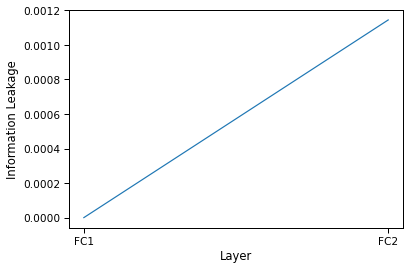

In [375]:
ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_purchase_2.png')
plt.show()

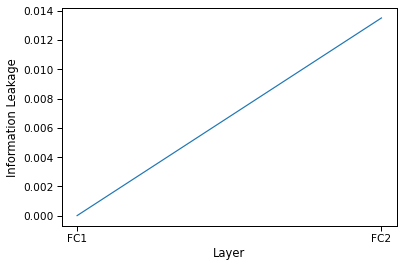

In [376]:
ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_purchase_2_global.png')
plt.show()

In [377]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_texas_2_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['FC1'] = abs(aggregated_values['fc1_f'] - aggregated_values['fc1_f_test'])
results_by_layer_f['FC2'] = abs(aggregated_values['fc2_f'] - aggregated_values['fc2_f_test'])

#results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'] - aggregated_values['classifier_f_test'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'] - aggregated_values['fc1_inf_test'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'] - aggregated_values['fc2_inf_test'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'] - aggregated_values['classifier_inf_test'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'] - global_values['fc1_inf_test'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'] - global_values['fc2_inf_test'])


#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'] - global_values['classifier_inf_test'])

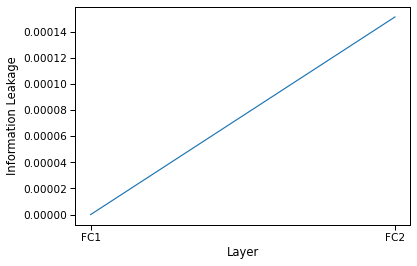

In [378]:
ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_texas_2.png')
plt.show()


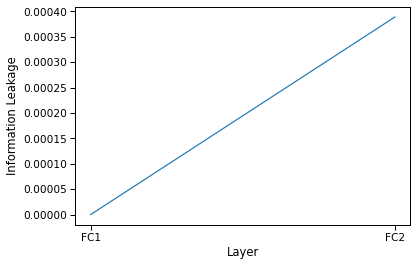

In [379]:
ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_texas_2_global.png')
plt.show()

In [380]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_texas_4_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['FC1'] = abs(aggregated_values['fc1_f'] - aggregated_values['fc1_f_test'])
results_by_layer_f['FC2'] = abs(aggregated_values['fc2_f'] - aggregated_values['fc2_f_test'])
results_by_layer_f['FC3'] = abs(aggregated_values['fc3_f'] - aggregated_values['fc3_f_test'])
results_by_layer_f['FC4'] = abs(aggregated_values['fc4_f'] - aggregated_values['fc4_f_test'])
#results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'] - aggregated_values['classifier_f_test'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'] - aggregated_values['fc1_inf_test'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'] - aggregated_values['fc2_inf_test'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3_inf'] - aggregated_values['fc3_inf_test'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4_inf'] - aggregated_values['fc4_inf_test'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'] - aggregated_values['classifier_inf_test'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'] - global_values['fc1_inf_test'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'] - global_values['fc2_inf_test'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3_inf'] - global_values['fc3_inf_test'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4_inf'] - global_values['fc4_inf_test'])


#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'] - global_values['classifier_inf_test'])

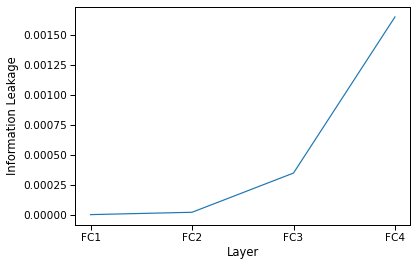

In [381]:
ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_texas_4.png')
plt.show()

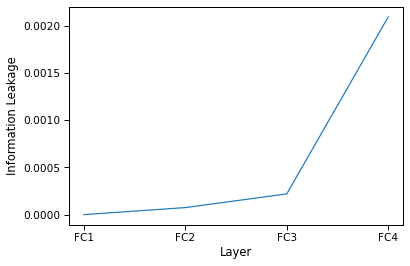

In [382]:
ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_texas_4_global.png')
plt.show()

In [383]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_texas_6_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['F1'] = abs(aggregated_values['fc1_f'] - aggregated_values['fc1_f_test'])
results_by_layer_f['F2'] = abs(aggregated_values['fc2_f'] - aggregated_values['fc2_f_test'])
results_by_layer_f['F3'] = abs(aggregated_values['fc3_f'] - aggregated_values['fc3_f_test'])
results_by_layer_f['F4'] = abs(aggregated_values['fc4_f'] - aggregated_values['fc4_f_test'])
#results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'] - aggregated_values['classifier_f_test'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'] - aggregated_values['fc1_inf_test'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'] - aggregated_values['fc2_inf_test'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3_inf'] - aggregated_values['fc3_inf_test'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4_inf'] - aggregated_values['fc4_inf_test'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5_inf'] - aggregated_values['fc5_inf_test'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6_inf'] - aggregated_values['fc6_inf_test'])


#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'] - aggregated_values['classifier_inf_test'])
global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'] - global_values['fc1_inf_test'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'] - global_values['fc2_inf_test'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3_inf'] - global_values['fc3_inf_test'])
results_by_layer_global_inf['FC4'] = abs(global_values['classifier_inf'] - global_values['classifier_inf_test'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5_inf'] - global_values['fc5_inf_test'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6_inf'] - global_values['fc6_inf_test'])

#results_by_layer_global_inf['Classifier'] = abs(global_values['fc4_inf'] - global_values['fc4_inf_test'])

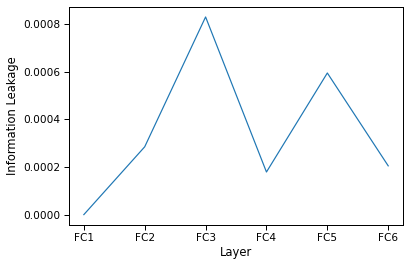

In [384]:
ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_texas_6.pdf')
plt.show()

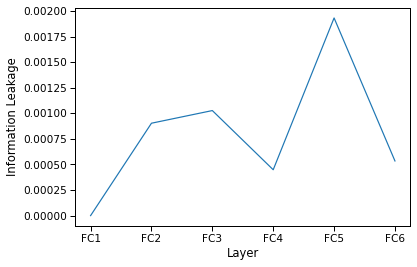

In [385]:
ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/norm_texas_6_global.pdf')
plt.show()

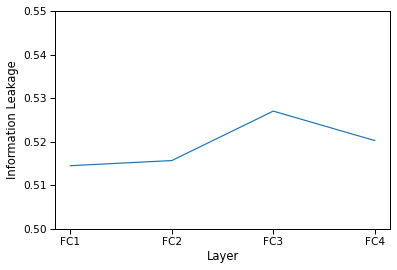

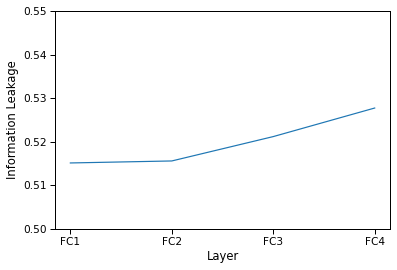

In [386]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_purchase_4_layers_normalized2.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['FC1'] = abs(aggregated_values['fc1_f'] )
results_by_layer_f['FC2'] = abs(aggregated_values['fc2_f'])
results_by_layer_f['FC3'] = abs(aggregated_values['fc3_f'])
results_by_layer_f['FC4'] = abs(aggregated_values['fc4_f'])
#results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc4_inf'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc3_inf'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3_inf'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4_inf'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0.5, 0.55)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_purchase_4.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0.5, 0.55)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_purchase_4_global.pdf')
plt.show()

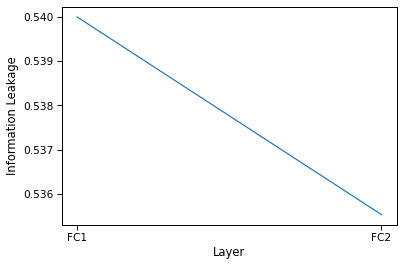

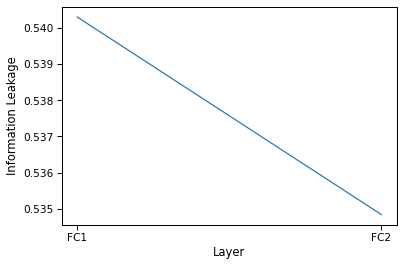

In [387]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_purchase_2_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['F1'] = abs(aggregated_values['fc1_f'] )
results_by_layer_f['F2'] = abs(aggregated_values['fc2_f'])


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_purchase_2.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_purchase_2_global.pdf')
plt.show()

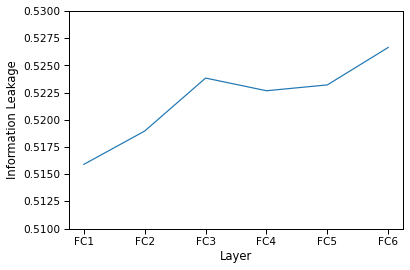

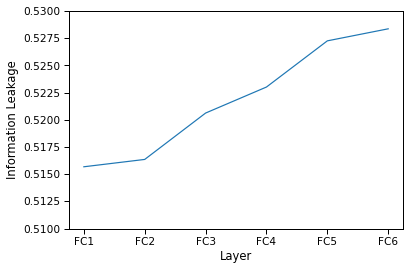

In [388]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_purchase_6_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['FC1'] = abs(aggregated_values['fc1_f'] )
results_by_layer_f['FC2'] = abs(aggregated_values['fc2_f'])
results_by_layer_f['FC3'] = abs(aggregated_values['fc3_f'])
results_by_layer_f['FC4'] = abs(aggregated_values['fc4_f'])
results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc4_inf'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc3_inf'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5_inf'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6_inf'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3_inf'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4_inf'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5_inf'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6_inf'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0.51, 0.53)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_purchase_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0.51, 0.53)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_purchase_6_global.pdf')
plt.show()

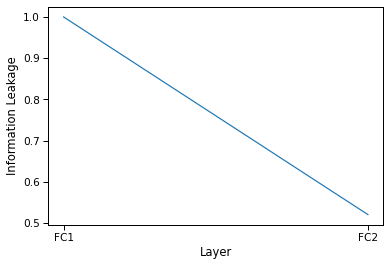

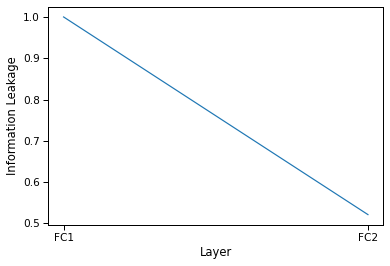

In [389]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_texas_2_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['F1'] = abs(aggregated_values['fc1_f'] )
results_by_layer_f['F2'] = abs(aggregated_values['fc2_f'])


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_texas_2.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_texas_2_global.pdf')
plt.show()

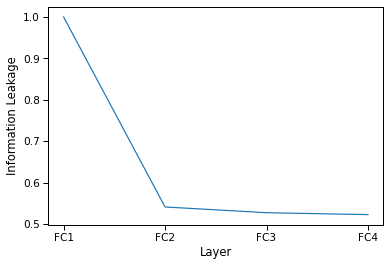

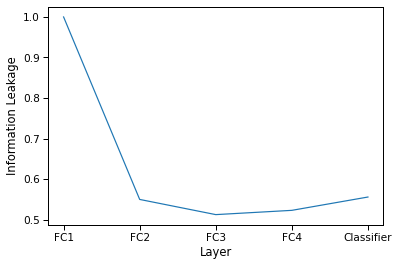

In [390]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_texas_4_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

results_by_layer_f['F1'] = abs(aggregated_values['fc1_f'] )
results_by_layer_f['F2'] = abs(aggregated_values['fc2_f'])
results_by_layer_f['F3'] = abs(aggregated_values['fc3_f'])
results_by_layer_f['F4'] = abs(aggregated_values['fc4_f'])
#results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'])

results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc4_inf'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc3_inf'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3_inf'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4_inf'])
results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_texas_4.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_texas_4_global.pdf')
plt.show()

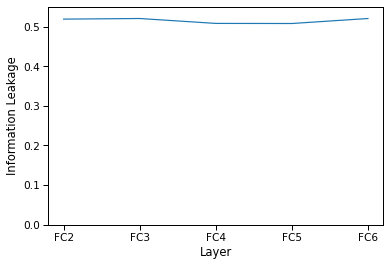

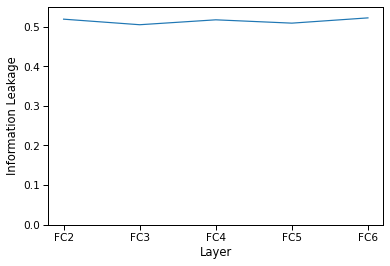

In [391]:
file = '/home2/cboscher/code/pastel2.0/results/leakage_texas_6_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_f = {}

#results_by_layer_f['FC1'] = abs(aggregated_values['fc1_f'] )
results_by_layer_f['FC2'] = abs(aggregated_values['fc2_f'])
results_by_layer_f['FC3'] = abs(aggregated_values['fc3_f'])
results_by_layer_f['FC4'] = abs(aggregated_values['fc4_f'])
results_by_layer_f['Classifier'] = abs(aggregated_values['classifier_f'])

results_by_layer_inf = {}

#results_by_layer_inf['FC1'] = abs(aggregated_values['fc1_inf'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2_inf'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc4_inf'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc3_inf'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5_inf'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6_inf'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier_inf'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

#results_by_layer_global_inf['FC1'] = abs(global_values['fc1_inf'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2_inf'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3_inf'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4_inf'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5_inf'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6_inf'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier_inf'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.55)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_texas_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.55)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/member_norm_texas_6_global.pdf')
plt.show()

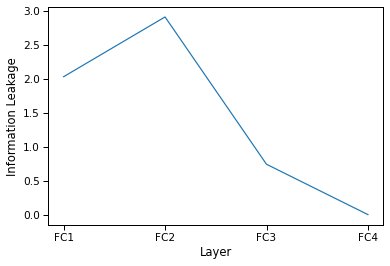

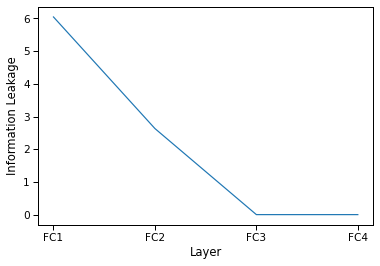

In [392]:
file = '/home2/cboscher/code/pastel2.0/results/latent_info_leakage_purchase_4_layers_normalized2.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_purchase_4.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_purchase_4_global.pdf')
plt.show()

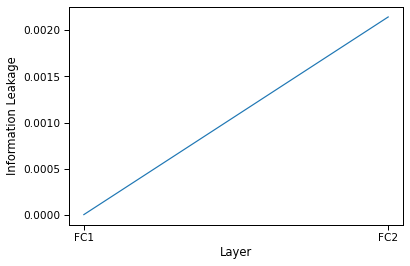

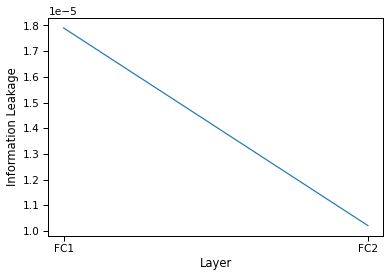

In [393]:
file = '/home2/cboscher/code/pastel2.0/results/latent_info_leakage_purchase_2_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])

#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])

#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_purchase_2.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_purchase_2_global.pdf')
plt.show()

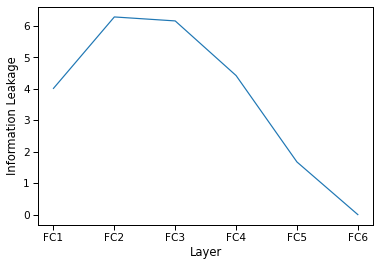

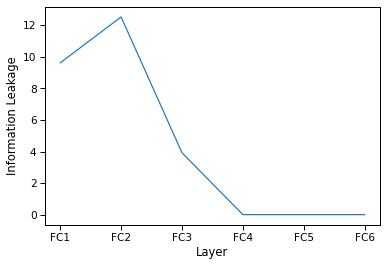

In [394]:
file = '/home2/cboscher/code/pastel2.0/results/latent_info_leakage_purchase_6_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_purchase_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_purchase_6_global.pdf')
plt.show()

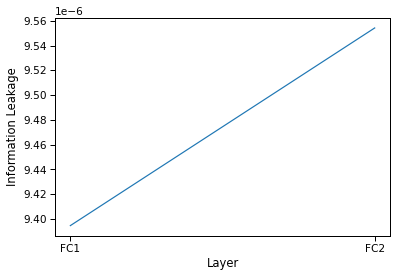

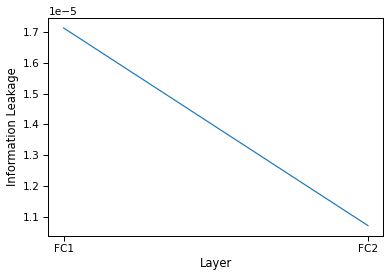

In [395]:
file = '/home2/cboscher/code/pastel2.0/results/latent_info_leakage_texas_2_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])

#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])

#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_texas_2.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_texas_2_global.pdf')
plt.show()

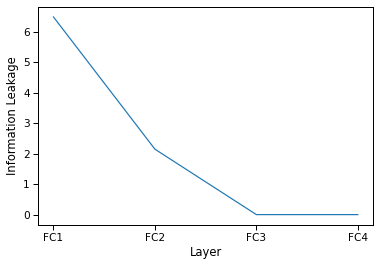

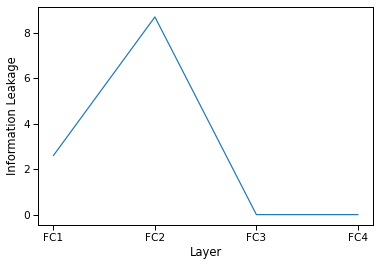

In [396]:
file = '/home2/cboscher/code/pastel2.0/results/latent_info_leakage_texas_4_layers_normalized.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_texas_4.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_texas_4_global.pdf')
plt.show()

In [397]:
plot_config = {
                "dataset_name": "Purchase_attack_layers",
                "dataset_pretty_name" : "GTSRB_VGG",

                "data":[
                                                                {
                            "exp_name" : "FC3",
                            "file_path": "test_layer_dummy_3rd_layer.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                            {
                            "exp_name" : "FC4",
                            "file_path": "test_layer_dummy.csv",
                            "color": "black",
                            "symbol" : "+"
                        },

                        {
                            "exp_name" : "Classifier",
                            "file_path": "ppm_baseline_300_purchase.csv",
                            "color": "black",
                            "symbol" : "+"
                        }

                           
                    
                    ]
                }

Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[81.0, 88.0, 83.0, 83.0, 77.0, 81.99999999999999, 82.0, 84.0, 85.0, 77.0]
Columns to aggregate
['client_auc_3', 'client_auc_1', 'client_auc_2', 'client_auc_4', 'client_auc_0']
[54.54545454545454, 59.59595959595959, 56.56565656565656, 51.51515151515152, 54.54545454545454]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[76.0, 81.0, 77.0, 80.0, 77.0, 80.0, 79.0, 80.0, 75.0, 76.0]
[3.187475490101846, 2.6648294865197784, 2.0223748416156684]
Labels
['FC3', 'FC4', 'Classifier']
[82.2, 55.35, 78.1]
None


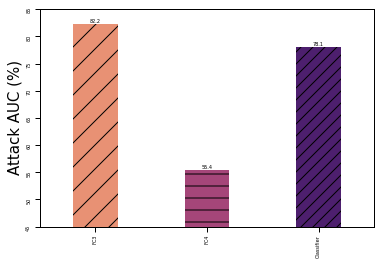

Columns to aggregate
['server_attack']
[70.48449219541861]
Columns to aggregate
['server_attack']
[50.76018649908778]
Columns to aggregate
['server_attack']
[74.79221569024934]
[0.6255771932105495, 0.21530209064541275, 0.21922679738936063]
Labels
['FC3', 'FC4', 'Classifier']
[70.48, 50.76, 74.79]
None


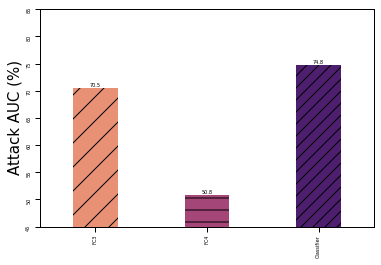

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[57.409284411108864, 58.68639772957632, 57.67281573079263, 58.0782485303061, 59.05128724913845, 58.808027569430365, 57.348469491181845, 58.321508210014194, 57.59172917088993, 57.38901277113319]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_4', 'client_accuracy_0']
[61.15953780660856, 60.91627812690047, 60.93654976687613, 61.34198256638962, 59.862152848165415]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[60.65274680721671, 60.87573484694912, 61.301439286438274, 60.2675856476789, 60.63247516724103, 60.389215487532944, 61

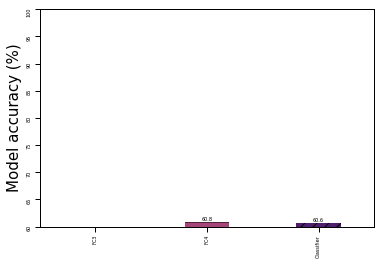

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[57.409284411108864, 58.68639772957632, 57.67281573079263, 58.0782485303061, 59.05128724913845, 58.808027569430365, 57.348469491181845, 58.321508210014194, 57.59172917088993, 57.38901277113319]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[81.0, 88.0, 83.0, 83.0, 77.0, 81.99999999999999, 82.0, 84.0, 85.0, 77.0]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_4', 'client_accuracy_0']
[61.15953780660856, 60.91627812690047, 60.93654976687613, 61.34198256638962, 59.862152848165415]
Columns to aggregate
['client_auc_3', 'client_auc_1', 'client_auc_2', 'client_auc_4', 'client_

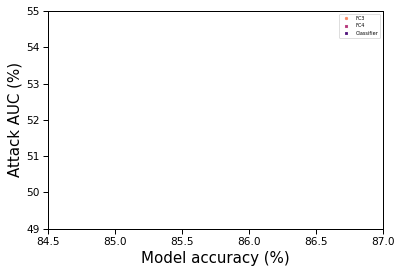

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[57.409284411108864, 58.68639772957632, 57.67281573079263, 58.0782485303061, 59.05128724913845, 58.808027569430365, 57.348469491181845, 58.321508210014194, 57.59172917088993, 57.38901277113319]
Columns to aggregate
['server_attack']
[70.48449219541861]
Columns to aggregate
['client_accuracy_3', 'client_accuracy_1', 'client_accuracy_2', 'client_accuracy_4', 'client_accuracy_0']
[61.15953780660856, 60.91627812690047, 60.93654976687613, 61.34198256638962, 59.862152848165415]
Columns to aggregate
['server_attack']
[50.76018649908778]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']


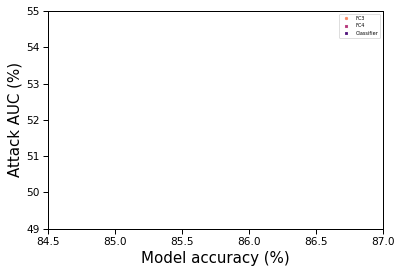

FC3
50
FC4
50
Classifier
50


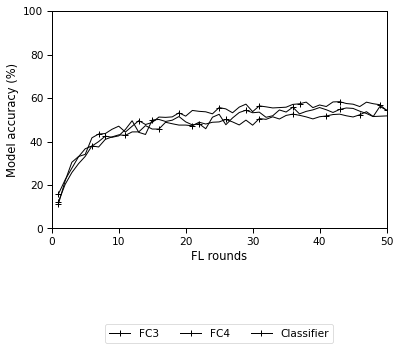

FC3
50
FC4
50
Classifier
50


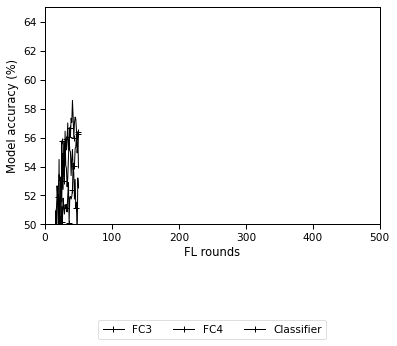

FC3
50
FC4
50
Classifier
50


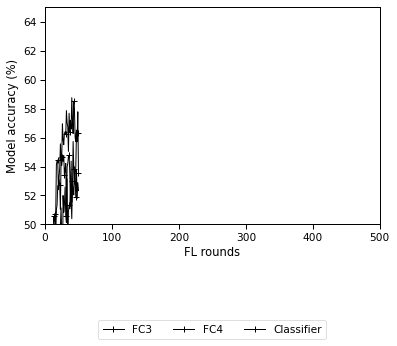

FC3
50
FC4
50
Classifier
50


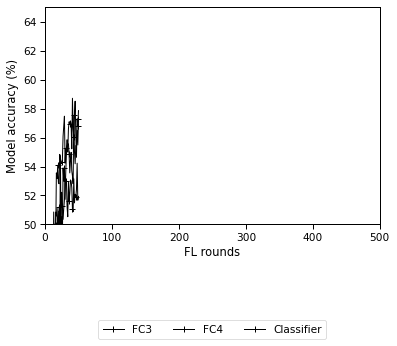

FC3
50
FC4
50
Classifier
50


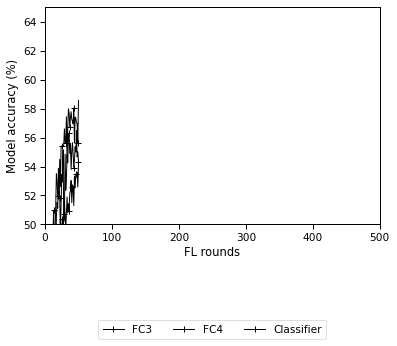

FC3
50
FC4
50
Classifier
50


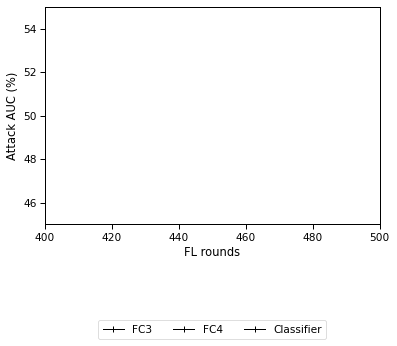

FC3
50
FC4
50
Classifier
50


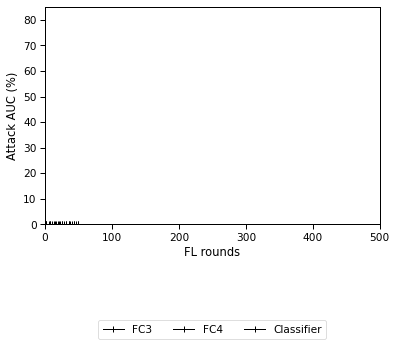

FC3
50
FC4
50
Classifier
50


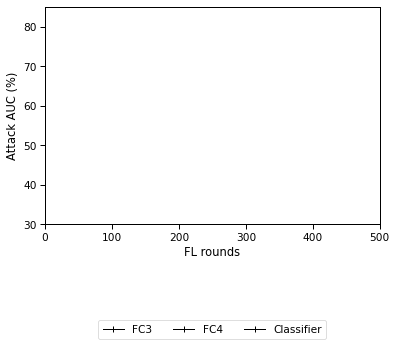

FC3
50
FC4
50
Classifier
50


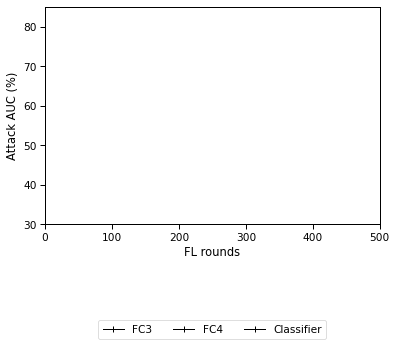

FC3
50
FC4
50
Classifier
50


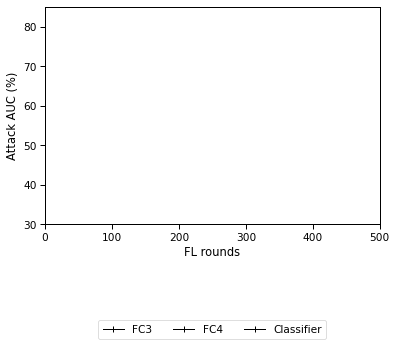

FC3
50
FC4
50
Classifier
50


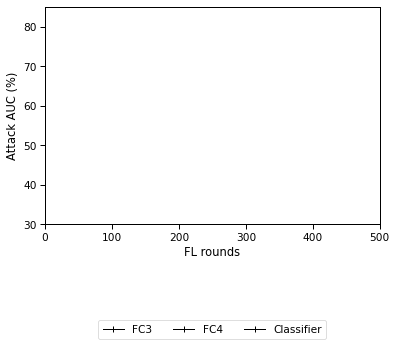

In [398]:
r = 50

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 45, 85, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 85, average=True, label_rotation=90, std = None, x_fontsize=5, bar_fontsize = 5)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 60, 100, average=True, label_rotation=90, x_fontsize=5, bar_fontsize = 5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 49, 55, 84.5, 87, average=True, markerscale = 0.5, legend_fontsize=5)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 55, 84.5, 87, average=True, markerscale = 0.5, legend_fontsize=5)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 0, 100, min_x=0, max_x = 50, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True,  max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

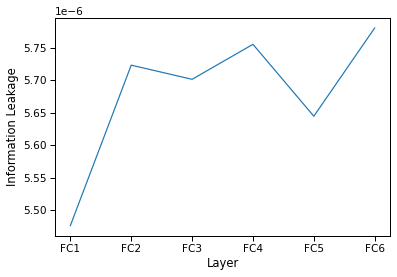

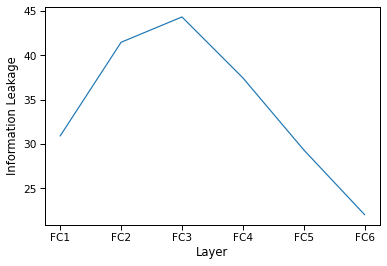

In [399]:
file = '/home2/cboscher/code/pastel2.0/results/test_layer_dummy_3rd_layer.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6'])
#results_by_layer_inf['Classifier'] = abs(aggregated_values['classifier'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6'])
#results_by_layer_global_inf['Classifier'] = abs(global_values['classifier'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_outputs_purchase_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_norm_outputs_purchase_6_global.pdf')
plt.show()

In [4]:
results_by_layer_global_inf

{'FC1': 969.225198453866,
 'FC2': 404.3357911382257,
 'FC3': 2491.4340725142574,
 'FC4': 3211.161593168084,
 'FC5': 3276.5940377854936,
 'FC6': 3153.9797467348985}

FileNotFoundError: [Errno 2] No such file or directory: '/home2/cboscher/code/pastel2.0/results/figures/latent_kullback_purchase_6.pdf'

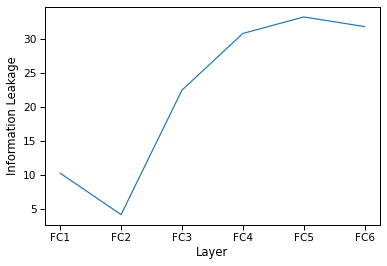

In [3]:
file = '/Users/tima/Desktop/pastel2.0/results/test_kullback_fcnn_6layers.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_kullback_purchase_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_kullback_purchase_6_global.pdf')
plt.show()

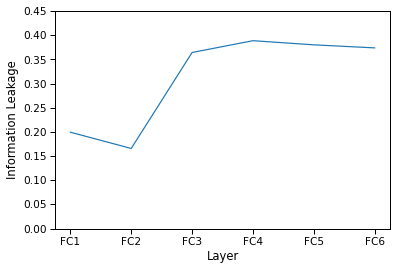

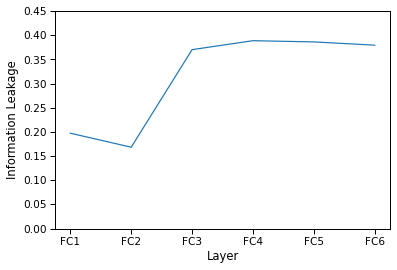

In [429]:
file = '/home2/cboscher/code/pastel2.0/results/test_hanssen_fcnn_6layers.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.45)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jensen_purchase_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.45)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jensen_purchase_6_global.pdf')
plt.show()

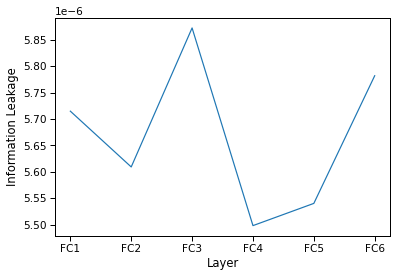

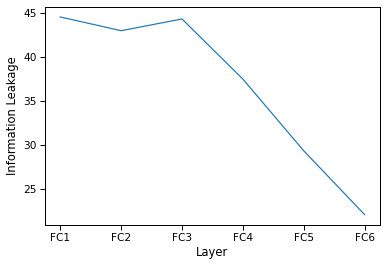

In [402]:
file = '/home2/cboscher/code/pastel2.0/results/latent_fcnn_6layers.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_softmax_grassmann_purchase_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_softmax_grassmann_purchase_6_global.pdf')
plt.show()

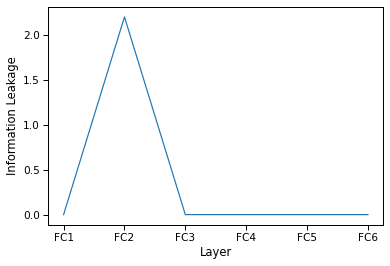

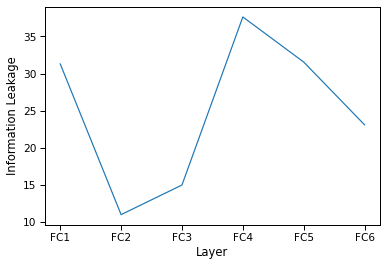

In [403]:
file = '/home2/cboscher/code/pastel2.0/results/texas_grassmann_fcnn_6layers.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    client_values.append(eval(str(df[column][-1:].values[0])))

aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        values.append(client[key])
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_softmax_grassmann_texas_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_softmax_grassmann_texas_6_global.pdf')
plt.show()

In [404]:
plot_config = {
                "dataset_name": "texas_6_layers_adagrad_layer_analysis",
                "dataset_pretty_name" : "CelebA_ResNet",

                "data":[


                     {
                            "exp_name" : "FC1",
                            "file_path": "test_attack_layer1.csv",
                            "color": "red",
                            "symbol" : "*"
                        },
                                               
                                                {
                            "exp_name" : "FC2",
                            "file_path": "test_attack_layer2.csv",
                            "color": "purple",
                            "symbol" : "x"
                        },
                                                              {
                            "exp_name" : "FC3",
                            "file_path": "test_attack_layer3.csv",
                            "color": "green",
                            "symbol" : "x"
                        },
                                                                                                      {
                            "exp_name" : "FC4",
                            "file_path": "test_attack_layer4.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                             {
                            "exp_name" : "FC5",
                            "file_path": "test_attack_layer5.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      },
                    {
                                "exp_name" : "FC6",
                            "file_path": "test_attack_layer6.csv",
                            "color": "pink",
                            "symbol" : "x"
                                                                                                      }
                            
                    ]
                }

Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[54.0, 53.0, 59.00000000000001, 55.00000000000001, 52.99999999999999, 58.00000000000001, 60.0, 53.0, 54.0, 55.99999999999999]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[62.0, 56.99999999999999, 55.00000000000001, 58.00000000000001, 56.00000000000001, 55.00000000000001, 57.99999999999999, 53.0, 54.0, 51.0]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[56.00000000000001, 52.0, 53.99999999999999, 58.00000000000001, 51.99999999999999, 52.0, 53.0, 57.00000000000001, 53.0, 56.99999999999999]
Columns to aggregate
['client_auc_1', 'client_auc_

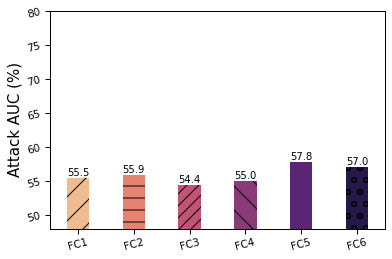

Columns to aggregate
['server_attack']
[50.53719845935536]
Columns to aggregate
['server_attack']
[51.05412527873505]
Columns to aggregate
['server_attack']
[50.47638353942834]
Columns to aggregate
['server_attack']
[50.38516115953781]
Columns to aggregate
['server_attack']
[49.837826880194605]
Columns to aggregate
['server_attack']
[50.85140887897831]
[0.09766744866012889, 0.20523471246013286, 0.21179983679526654, 0.22778550083222857, 0.09776732659061292, 0.2641251554416659]
Labels
['FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6']
[50.54, 51.05, 50.48, 50.39, 49.84, 50.85]
None


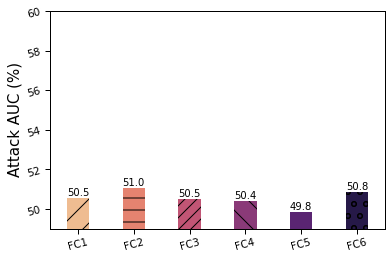

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[51.327792418406645, 51.67241029799311, 50.05067909993919, 51.61159537806609, 51.63186701804175, 49.84796270018245, 50.51692681937969, 50.17230893979323, 49.98986418001216, 50.09122237989053]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[50.39529697952564, 52.86843705655787, 51.77376849787147, 51.44942225826069, 52.422460977093046, 52.68599229677681, 52.280559497263326, 50.699371579160754, 52.13865801743361, 50.435840259477]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'cli

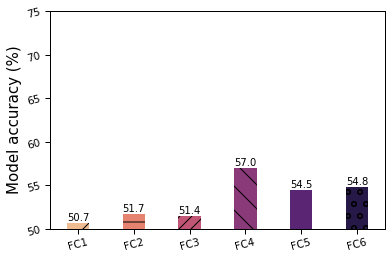

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[51.327792418406645, 51.67241029799311, 50.05067909993919, 51.61159537806609, 51.63186701804175, 49.84796270018245, 50.51692681937969, 50.17230893979323, 49.98986418001216, 50.09122237989053]
Columns to aggregate
['client_auc_1', 'client_auc_6', 'client_auc_4', 'client_auc_9', 'client_auc_3', 'client_auc_8', 'client_auc_5', 'client_auc_7', 'client_auc_2', 'client_auc_0']
[54.0, 53.0, 59.00000000000001, 55.00000000000001, 52.99999999999999, 58.00000000000001, 60.0, 53.0, 54.0, 55.99999999999999]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[50.39529697952564, 52.8684370565578

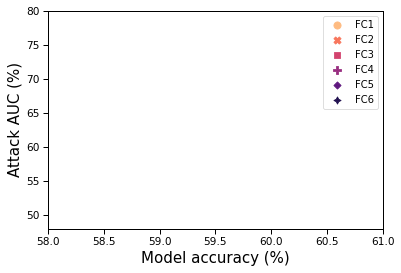

Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[51.327792418406645, 51.67241029799311, 50.05067909993919, 51.61159537806609, 51.63186701804175, 49.84796270018245, 50.51692681937969, 50.17230893979323, 49.98986418001216, 50.09122237989053]
Columns to aggregate
['server_attack']
[50.53719845935536]
Columns to aggregate
['client_accuracy_1', 'client_accuracy_6', 'client_accuracy_4', 'client_accuracy_9', 'client_accuracy_3', 'client_accuracy_8', 'client_accuracy_5', 'client_accuracy_7', 'client_accuracy_2', 'client_accuracy_0']
[50.39529697952564, 52.86843705655787, 51.77376849787147, 51.44942225826069, 52.422460977093046, 52.68599229677681, 52.280559497263326, 50.699371579160754, 52.13865801743361, 50.435840259477]
Columns to aggregate
['server_attack']
[51.05412527873505]
Columns to aggregate
['client_accu

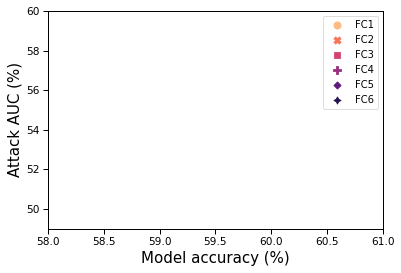

FC1
20
FC2
20
FC3
20
FC4
300


ValueError: x and y must have same first dimension, but have shapes (20,) and (300,)

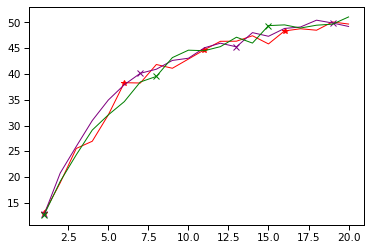

In [405]:
r = 300

generate_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_auc", 48, 80, average=True, label_rotation=15, std = None)
generate_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 49, 60, average=True, label_rotation=15, std = None)
#generate_xy_plot(plot_config, 'local_models_attack_accuracy', 'Attack AUC (%)', 'client_auc', 0, 100, average=True)
#generate_xy_plot(plot_config, 'global_model_attack_accuracy', 'Attack AUC (%)', 'server_attack', 0, 100, average=True)
#generate_xy_plot(plot_config, 'local_models_accuracy', 'Model accuracy (%)', 'client_accuracy', 0, 100, average=True)
generate_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "client_accuracy", 50, 75, average=True, label_rotation=15)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_auc', 48, 80, 58, 61, average=True)
generate_tradeoff_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 49, 60, 58, 61, average=True)

generate_xy_plot(plot_config, 'local_model0_accuracy', 'Model accuracy (%)', 'client_accuracy_0', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_accuracy', 'Model accuracy (%)', 'client_accuracy_1', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_accuracy', 'Model accuracy (%)', 'client_accuracy_2', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_accuracy', 'Model accuracy (%)', 'client_accuracy_3', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_accuracy', 'Model accuracy (%)', 'client_accuracy_4', 50, 65, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'server_auc', 'Attack AUC (%)', 'server_auc', 45, 55, min_x=400, max_x = 500, average=True, extension='.png', max_range=r)

generate_xy_plot(plot_config, 'local_model0_auc', 'Attack AUC (%)', 'client_auc_0', 0, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model1_auc', 'Attack AUC (%)', 'client_auc_1', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model2_auc', 'Attack AUC (%)', 'client_auc_2', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model3_auc', 'Attack AUC (%)', 'client_auc_3', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)
generate_xy_plot(plot_config, 'local_model4_auc', 'Attack AUC (%)', 'client_auc_4', 30, 85, min_x=0, max_x = 500, average=True, extension='.png', max_range=r)

In [ ]:
layers = ['FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6']
values_local = [55.5, 55.9, 56.4, 55.0, 57.8, 57.0]
values_global = [50.54, 50.48, 50.69,50.5, 50.85, 51.05]

In [ ]:
ax = sns.lineplot(x=layers, y=values_local)
ax.set_xlabel("Layer")
ax.set_ylabel("Attack AUC (%)")
plt.ylim(52, 60)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/attack_by_layer_purchase.pdf')
plt.show()

ax = sns.lineplot(x=layers, y=values_global)
ax.set_xlabel("Layer")
ax.set_ylabel("Attack AUC (%)")
plt.ylim(50, 51.5)

plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/attack_by_layer_purchase_global.pdf')
plt.show()

{'fc1': 0.44940196435548324, 'fc2': 0.16854681675800307, 'fc3': 3.78683324577775, 'fc4': 45.37119251560412, 'fc5': 77.49400092189893, 'fc6': 69.04879082488013, 'classifier': nan}
{'fc1': 0.4577189873566267, 'fc2': 0.1550707132376716, 'fc3': 3.739177446837046, 'fc4': 45.61344817786039, 'fc5': 75.79851967413578, 'fc6': 69.7515957488908, 'classifier': nan}
{'fc1': 0.45701279715632886, 'fc2': 0.15768550989615424, 'fc3': 3.64871574906993, 'fc4': 46.787094058428195, 'fc5': 75.55275485620467, 'fc6': 67.84499016481634, 'classifier': nan}
{'fc1': 0.4512474289173459, 'fc2': 0.1585467095299472, 'fc3': 3.776749054190571, 'fc4': 44.17802197712874, 'fc5': 79.82177459657616, 'fc6': 72.2598897336472, 'classifier': nan}
{'fc1': 0.4530562131952577, 'fc2': 0.17397295242165667, 'fc3': 3.58894143676976, 'fc4': 45.97139625810674, 'fc5': 75.67068002815166, 'fc6': 69.06642410568625, 'classifier': nan}
{'fc1': 0.44472079705239437, 'fc2': 0.1555923511400664, 'fc3': 3.7474027244267067, 'fc4': 45.827120740525054,

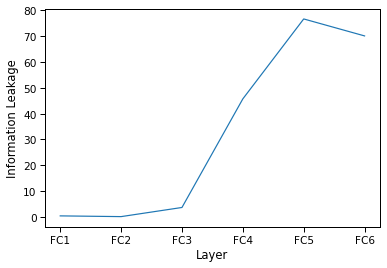

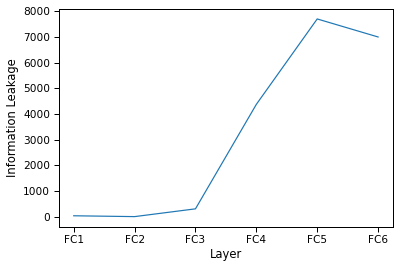

In [408]:
file = '/home2/cboscher/code/pastel2.0/results/texas_kullback_fcnn_6layers.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('nan', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_kullback_texas_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_kullback_texas_6_global.pdf')
plt.show()

{'fc1': 0.010332468520693465, 'fc2': 0.014594108421874807, 'fc3': 0.051509301542864705, 'fc4': 0.2858125481179741, 'fc5': 0.38092939619673416, 'fc6': 0.3686959419865161, 'classifier': inf}
{'fc1': 0.010515998399294556, 'fc2': 0.0141691606513632, 'fc3': 0.05265195375886833, 'fc4': 0.28041616186965257, 'fc5': 0.3741311121848412, 'fc6': 0.3596381508978084, 'classifier': inf}
{'fc1': 0.010367800044489145, 'fc2': 0.014111791028653897, 'fc3': 0.05015175637208813, 'fc4': 0.28401133942679735, 'fc5': 0.3766304905875586, 'fc6': 0.3661428124178201, 'classifier': inf}
{'fc1': 0.010420832133782953, 'fc2': 0.014770371184681608, 'fc3': 0.05156346466628747, 'fc4': 0.2913589133095229, 'fc5': 0.38733813364524394, 'fc6': 0.36520664871204644, 'classifier': inf}
{'fc1': 0.010282248215366626, 'fc2': 0.01443406547343784, 'fc3': 0.054264317129764095, 'fc4': 0.2922491606732365, 'fc5': 0.3769422732293606, 'fc6': 0.3633714831667021, 'classifier': inf}
{'fc1': 0.009960958351271143, 'fc2': 0.014805398852899998, 'f

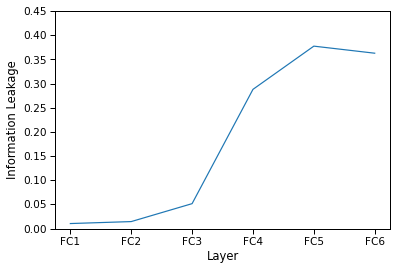

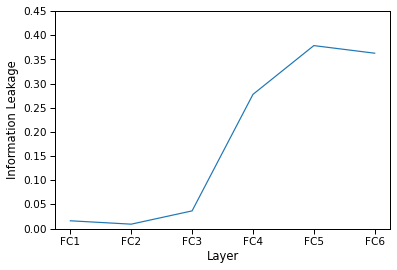

In [428]:
file = '/home2/cboscher/code/pastel2.0/results/texas_jenssen_fcnn_6layers.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values


results_by_layer_inf = {}

results_by_layer_inf['FC1'] = abs(aggregated_values['fc1'])
results_by_layer_inf['FC2'] = abs(aggregated_values['fc2'])
results_by_layer_inf['FC3'] = abs(aggregated_values['fc3'])
results_by_layer_inf['FC4'] = abs(aggregated_values['fc4'])
results_by_layer_inf['FC5'] = abs(aggregated_values['fc5'])
results_by_layer_inf['FC6'] = abs(aggregated_values['fc6'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('inf', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf['FC1'] = abs(global_values['fc1'])
results_by_layer_global_inf['FC2'] = abs(global_values['fc2'])
results_by_layer_global_inf['FC3'] = abs(global_values['fc3'])
results_by_layer_global_inf['FC4'] = abs(global_values['fc4'])
results_by_layer_global_inf['FC5'] = abs(global_values['fc5'])
results_by_layer_global_inf['FC6'] = abs(global_values['fc6'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.45)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_texas_6.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.45)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_texas_6_global.pdf')
plt.show()

{'conv1': 0.09764916, 'bn1': 0.09722355, 'conv2': 0.30645308, 'bn2': 0.1840322, 'conv3': 0.30467924, 'bn3': 0.18646877, 'conv4': 0.27814257, 'bn4': 0.19372788, 'conv5': 0.31838578, 'bn5': 0.20510599, 'conv6': 0.21438426, 'bn6': 0.32580775, 'conv7': 0.35659295, 'bn7': 0.7053627, 'conv8': 0.25868604, 'bn8': 0.60104}
{'conv1': 0.097084366, 'bn1': 0.098779604, 'conv2': 0.3075862, 'bn2': 0.18455976, 'conv3': 0.3027448, 'bn3': 0.18496074, 'conv4': 0.2781996, 'bn4': 0.19397816, 'conv5': 0.31207913, 'bn5': 0.19548798, 'conv6': 0.213755, 'bn6': 0.3050015, 'conv7': 0.36863738, 'bn7': 0.6837653, 'conv8': 0.25284964, 'bn8': 0.6001271}
{'conv1': 0.096785344, 'bn1': 0.09919903, 'conv2': 0.29814368, 'bn2': 0.18038335, 'conv3': 0.29836583, 'bn3': 0.18205005, 'conv4': 0.272763, 'bn4': 0.19038354, 'conv5': 0.3083381, 'bn5': 0.19602163, 'conv6': 0.20437032, 'bn6': 0.3119738, 'conv7': 0.34371346, 'bn7': 0.6584481, 'conv8': 0.25513512, 'bn8': 0.62219584}
{'conv1': 0.096983135, 'bn1': 0.098049365, 'conv2': 

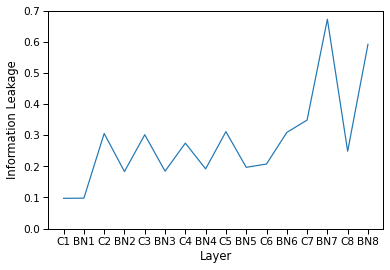

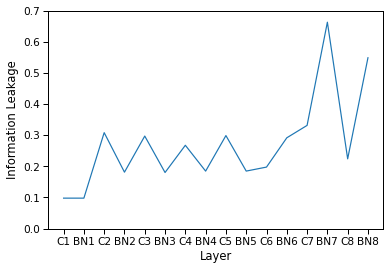

In [424]:
file = '/home2/cboscher/code/pastel2.0/results/layer_leakage_celeba_vgg_v2.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_inf = {}
results_by_layer_inf['C1'] = abs(aggregated_values['conv1'])
results_by_layer_inf['BN1'] = abs(aggregated_values['bn1'])
results_by_layer_inf['C2'] = abs(aggregated_values['conv2'])
results_by_layer_inf['BN2'] = abs(aggregated_values['bn2'])
results_by_layer_inf['C3'] = abs(aggregated_values['conv3'])
results_by_layer_inf['BN3'] = abs(aggregated_values['bn3'])
results_by_layer_inf['C4'] = abs(aggregated_values['conv4'])
results_by_layer_inf['BN4'] = abs(aggregated_values['bn4'])
results_by_layer_inf['C5'] = abs(aggregated_values['conv5'])
results_by_layer_inf['BN5'] = abs(aggregated_values['bn5'])
results_by_layer_inf['C6'] = abs(aggregated_values['conv6'])
results_by_layer_inf['BN6'] = abs(aggregated_values['bn6'])
results_by_layer_inf['C7'] = abs(aggregated_values['conv7'])
results_by_layer_inf['BN7'] = abs(aggregated_values['bn7'])
results_by_layer_inf['C8'] = abs(aggregated_values['conv8'])
results_by_layer_inf['BN8'] = abs(aggregated_values['bn8'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf['C1'] = abs(global_values['conv1'])
results_by_layer_global_inf['BN1'] = abs(global_values['bn1'])
results_by_layer_global_inf['C2'] = abs(global_values['conv2'])
results_by_layer_global_inf['BN2'] = abs(global_values['bn2'])
results_by_layer_global_inf['C3'] = abs(global_values['conv3'])
results_by_layer_global_inf['BN3'] = abs(global_values['bn3'])
results_by_layer_global_inf['C4'] = abs(global_values['conv4'])
results_by_layer_global_inf['BN4'] = abs(global_values['bn4'])
results_by_layer_global_inf['C5'] = abs(global_values['conv5'])
results_by_layer_global_inf['BN5'] = abs(global_values['bn5'])
results_by_layer_global_inf['C6'] = abs(global_values['conv6'])
results_by_layer_global_inf['BN6'] = abs(global_values['bn6'])
results_by_layer_global_inf['C7'] = abs(global_values['conv7'])
results_by_layer_global_inf['BN7'] = abs(global_values['bn7'])
results_by_layer_global_inf['C8'] = abs(global_values['conv8'])
results_by_layer_global_inf['BN8'] = abs(global_values['bn8'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.7)

plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_celeba_vgg.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.7)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_celeba_vgg_global.pdf')
plt.show()

In [ ]:
x=results_by_layer_inf.keys()
print(x)

{'conv1': 0.09764916, 'bn1': 0.09722355, 'conv2': 0.30645308, 'bn2': 0.1840322, 'conv3': 0.30467924, 'bn3': 0.18646877, 'conv4': 0.27814257, 'bn4': 0.19372788, 'conv5': 0.31838578, 'bn5': 0.20510599, 'conv6': 0.21438426, 'bn6': 0.32580775, 'conv7': 0.35659295, 'bn7': 0.7053627, 'conv8': 0.25868604, 'bn8': 0.60104}
{'conv1': 0.097084366, 'bn1': 0.098779604, 'conv2': 0.3075862, 'bn2': 0.18455976, 'conv3': 0.3027448, 'bn3': 0.18496074, 'conv4': 0.2781996, 'bn4': 0.19397816, 'conv5': 0.31207913, 'bn5': 0.19548798, 'conv6': 0.213755, 'bn6': 0.3050015, 'conv7': 0.36863738, 'bn7': 0.6837653, 'conv8': 0.25284964, 'bn8': 0.6001271}
{'conv1': 0.096785344, 'bn1': 0.09919903, 'conv2': 0.29814368, 'bn2': 0.18038335, 'conv3': 0.29836583, 'bn3': 0.18205005, 'conv4': 0.272763, 'bn4': 0.19038354, 'conv5': 0.3083381, 'bn5': 0.19602163, 'conv6': 0.20437032, 'bn6': 0.3119738, 'conv7': 0.34371346, 'bn7': 0.6584481, 'conv8': 0.25513512, 'bn8': 0.62219584}
{'conv1': 0.096983135, 'bn1': 0.098049365, 'conv2': 

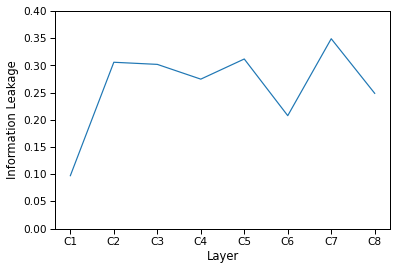

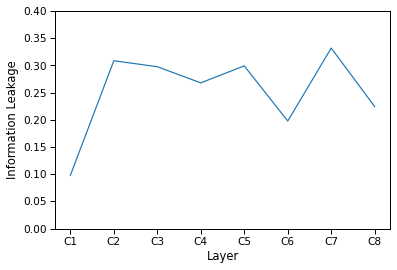

In [427]:
file = '/home2/cboscher/code/pastel2.0/results/layer_leakage_celeba_vgg_v2.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values
results_by_layer_inf = {}

results_by_layer_inf['C1'] = abs(aggregated_values['conv1'])
results_by_layer_inf['C2'] = abs(aggregated_values['conv2'])
results_by_layer_inf['C3'] = abs(aggregated_values['conv3'])
results_by_layer_inf['C4'] = abs(aggregated_values['conv4'])
results_by_layer_inf['C5'] = abs(aggregated_values['conv5'])
results_by_layer_inf['C6'] = abs(aggregated_values['conv6'])
results_by_layer_inf['C7'] = abs(aggregated_values['conv7'])
results_by_layer_inf['C8'] = abs(aggregated_values['conv8'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf['C1'] = abs(global_values['conv1'])
results_by_layer_global_inf['C2'] = abs(global_values['conv2'])
results_by_layer_global_inf['C3'] = abs(global_values['conv3'])
results_by_layer_global_inf['C4'] = abs(global_values['conv4'])
results_by_layer_global_inf['C5'] = abs(global_values['conv5'])
results_by_layer_global_inf['C6'] = abs(global_values['conv6'])
results_by_layer_global_inf['C7'] = abs(global_values['conv7'])
results_by_layer_global_inf['C8'] = abs(global_values['conv8'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.4)

plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_celeba_vgg_conv.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.4)

plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_celeba_vgg_global_conv.pdf')
plt.show()

{'conv1': 0.09764916, 'bn1': 0.09722355, 'conv2': 0.30645308, 'bn2': 0.1840322, 'conv3': 0.30467924, 'bn3': 0.18646877, 'conv4': 0.27814257, 'bn4': 0.19372788, 'conv5': 0.31838578, 'bn5': 0.20510599, 'conv6': 0.21438426, 'bn6': 0.32580775, 'conv7': 0.35659295, 'bn7': 0.7053627, 'conv8': 0.25868604, 'bn8': 0.60104}
{'conv1': 0.097084366, 'bn1': 0.098779604, 'conv2': 0.3075862, 'bn2': 0.18455976, 'conv3': 0.3027448, 'bn3': 0.18496074, 'conv4': 0.2781996, 'bn4': 0.19397816, 'conv5': 0.31207913, 'bn5': 0.19548798, 'conv6': 0.213755, 'bn6': 0.3050015, 'conv7': 0.36863738, 'bn7': 0.6837653, 'conv8': 0.25284964, 'bn8': 0.6001271}
{'conv1': 0.096785344, 'bn1': 0.09919903, 'conv2': 0.29814368, 'bn2': 0.18038335, 'conv3': 0.29836583, 'bn3': 0.18205005, 'conv4': 0.272763, 'bn4': 0.19038354, 'conv5': 0.3083381, 'bn5': 0.19602163, 'conv6': 0.20437032, 'bn6': 0.3119738, 'conv7': 0.34371346, 'bn7': 0.6584481, 'conv8': 0.25513512, 'bn8': 0.62219584}
{'conv1': 0.096983135, 'bn1': 0.098049365, 'conv2': 

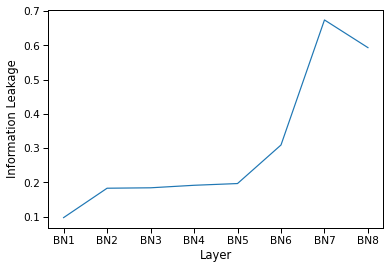

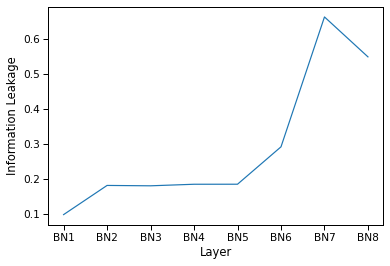

In [407]:
file = '/home2/cboscher/code/pastel2.0/results/layer_leakage_celeba_vgg_v2.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values
results_by_layer_inf = {}

results_by_layer_inf['BN1'] = abs(aggregated_values['bn1'])
results_by_layer_inf['BN2'] = abs(aggregated_values['bn2'])
results_by_layer_inf['BN3'] = abs(aggregated_values['bn3'])
results_by_layer_inf['BN4'] = abs(aggregated_values['bn4'])
results_by_layer_inf['BN5'] = abs(aggregated_values['bn5'])
results_by_layer_inf['BN6'] = abs(aggregated_values['bn6'])
results_by_layer_inf['BN7'] = abs(aggregated_values['bn7'])
results_by_layer_inf['BN8'] = abs(aggregated_values['bn8'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf['BN1'] = abs(global_values['bn1'])
results_by_layer_global_inf['BN2'] = abs(global_values['bn2'])
results_by_layer_global_inf['BN3'] = abs(global_values['bn3'])
results_by_layer_global_inf['BN4'] = abs(global_values['bn4'])
results_by_layer_global_inf['BN5'] = abs(global_values['bn5'])
results_by_layer_global_inf['BN6'] = abs(global_values['bn6'])
results_by_layer_global_inf['BN7'] = abs(global_values['bn7'])
results_by_layer_global_inf['BN8'] = abs(global_values['bn8'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_celeba_vgg_bn.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_celeba_vgg_global_bn.pdf')
plt.show()

{'conv1': 0.035373423, 'bn1': 0.035106488, 'conv2': 0.269462, 'bn2': 0.18395932, 'conv3': 0.26802993, 'bn3': 0.1730121, 'conv4': 0.23651525, 'bn4': 0.19835937, 'conv5': 0.30581394, 'bn5': 0.20541058, 'conv6': 0.23882835, 'bn6': 0.25789422, 'conv7': 0.30539718, 'bn7': 0.27606493, 'conv8': 0.24405111, 'bn8': 0.2101403}
{'conv1': 0.03359136, 'bn1': 0.033459477, 'conv2': 0.25915977, 'bn2': 0.17865334, 'conv3': 0.26205122, 'bn3': 0.1691665, 'conv4': 0.2373079, 'bn4': 0.20121083, 'conv5': 0.3121015, 'bn5': 0.20973973, 'conv6': 0.23559771, 'bn6': 0.23971367, 'conv7': 0.32319647, 'bn7': 0.28498775, 'conv8': 0.2518515, 'bn8': 0.214372}
{'conv1': 0.034727674, 'bn1': 0.034000944, 'conv2': 0.27376074, 'bn2': 0.186203, 'conv3': 0.26648766, 'bn3': 0.17706469, 'conv4': 0.24411991, 'bn4': 0.21862763, 'conv5': 0.3132572, 'bn5': 0.22908191, 'conv6': 0.24710491, 'bn6': 0.26549295, 'conv7': 0.32115075, 'bn7': 0.2991914, 'conv8': 0.25106445, 'bn8': 0.227247}
{'conv1': 0.03405239, 'bn1': 0.03447412, 'conv2'

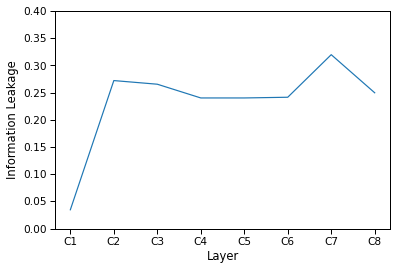

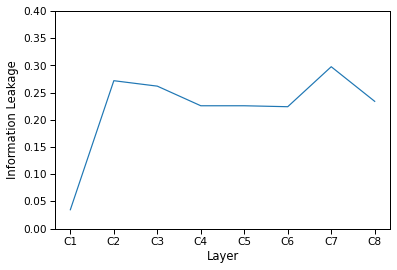

In [426]:
file = '/home2/cboscher/code/pastel2.0/results/layer_leakage_gtsrb_vgg.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values
results_by_layer_inf = {}

results_by_layer_inf['C1'] = abs(aggregated_values['conv1'])
results_by_layer_inf['C2'] = abs(aggregated_values['conv2'])
results_by_layer_inf['C3'] = abs(aggregated_values['conv3'])
results_by_layer_inf['C4'] = abs(aggregated_values['conv4'])
results_by_layer_inf['C5'] = abs(aggregated_values['conv4'])
results_by_layer_inf['C6'] = abs(aggregated_values['conv6'])
results_by_layer_inf['C7'] = abs(aggregated_values['conv7'])
results_by_layer_inf['C8'] = abs(aggregated_values['conv8'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf['C1'] = abs(global_values['conv1'])
results_by_layer_global_inf['C2'] = abs(global_values['conv2'])
results_by_layer_global_inf['C3'] = abs(global_values['conv3'])
results_by_layer_global_inf['C4'] = abs(global_values['conv4'])
results_by_layer_global_inf['C5'] = abs(global_values['conv4'])
results_by_layer_global_inf['C6'] = abs(global_values['conv6'])
results_by_layer_global_inf['C7'] = abs(global_values['conv7'])
results_by_layer_global_inf['C8'] = abs(global_values['conv8'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.4)

plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_gtsrb_vgg_conv.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.ylim(0, 0.4)
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_gtsrb_vgg_global_conv.pdf')
plt.show()

{'conv1': 0.035373423, 'bn1': 0.035106488, 'conv2': 0.269462, 'bn2': 0.18395932, 'conv3': 0.26802993, 'bn3': 0.1730121, 'conv4': 0.23651525, 'bn4': 0.19835937, 'conv5': 0.30581394, 'bn5': 0.20541058, 'conv6': 0.23882835, 'bn6': 0.25789422, 'conv7': 0.30539718, 'bn7': 0.27606493, 'conv8': 0.24405111, 'bn8': 0.2101403}
{'conv1': 0.03359136, 'bn1': 0.033459477, 'conv2': 0.25915977, 'bn2': 0.17865334, 'conv3': 0.26205122, 'bn3': 0.1691665, 'conv4': 0.2373079, 'bn4': 0.20121083, 'conv5': 0.3121015, 'bn5': 0.20973973, 'conv6': 0.23559771, 'bn6': 0.23971367, 'conv7': 0.32319647, 'bn7': 0.28498775, 'conv8': 0.2518515, 'bn8': 0.214372}
{'conv1': 0.034727674, 'bn1': 0.034000944, 'conv2': 0.27376074, 'bn2': 0.186203, 'conv3': 0.26648766, 'bn3': 0.17706469, 'conv4': 0.24411991, 'bn4': 0.21862763, 'conv5': 0.3132572, 'bn5': 0.22908191, 'conv6': 0.24710491, 'bn6': 0.26549295, 'conv7': 0.32115075, 'bn7': 0.2991914, 'conv8': 0.25106445, 'bn8': 0.227247}
{'conv1': 0.03405239, 'bn1': 0.03447412, 'conv2'

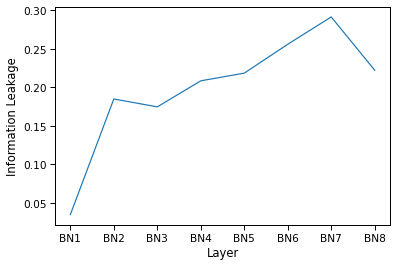

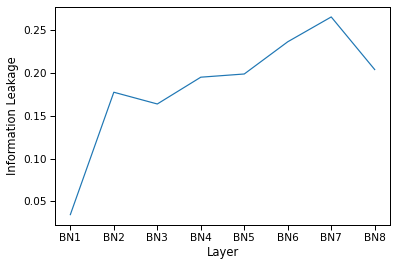

In [413]:
file = '/home2/cboscher/code/pastel2.0/results/layer_leakage_gtsrb_vgg.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values
results_by_layer_inf = {}

results_by_layer_inf['BN1'] = abs(aggregated_values['bn1'])
results_by_layer_inf['BN2'] = abs(aggregated_values['bn2'])
results_by_layer_inf['BN3'] = abs(aggregated_values['bn3'])
results_by_layer_inf['BN4'] = abs(aggregated_values['bn4'])
results_by_layer_inf['BN5'] = abs(aggregated_values['bn5'])
results_by_layer_inf['BN6'] = abs(aggregated_values['bn6'])
results_by_layer_inf['BN7'] = abs(aggregated_values['bn7'])
results_by_layer_inf['BN8'] = abs(aggregated_values['bn8'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf['BN1'] = abs(global_values['bn1'])
results_by_layer_global_inf['BN2'] = abs(global_values['bn2'])
results_by_layer_global_inf['BN3'] = abs(global_values['bn3'])
results_by_layer_global_inf['BN4'] = abs(global_values['bn4'])
results_by_layer_global_inf['BN5'] = abs(global_values['bn5'])
results_by_layer_global_inf['BN6'] = abs(global_values['bn6'])
results_by_layer_global_inf['BN7'] = abs(global_values['bn7'])
results_by_layer_global_inf['BN8'] = abs(global_values['bn8'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")

plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_gtsrb_vgg_bn.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_gtsrb_vgg_global_bn.pdf')
plt.show()

In [1]:
file = '/Users/tima/Desktop/pastel2.0/results/layer_leakage_gtsrb_vgg.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_inf = {}
results_by_layer_inf['C1'] = abs(aggregated_values['conv1'])
results_by_layer_inf['BN1'] = abs(aggregated_values['bn1'])
results_by_layer_inf['C2'] = abs(aggregated_values['conv2'])
results_by_layer_inf['BN2'] = abs(aggregated_values['bn2'])
results_by_layer_inf['C3'] = abs(aggregated_values['conv3'])
results_by_layer_inf['BN3'] = abs(aggregated_values['bn3'])
results_by_layer_inf['C4'] = abs(aggregated_values['conv4'])
results_by_layer_inf['BN4'] = abs(aggregated_values['bn4'])
results_by_layer_inf['C5'] = abs(aggregated_values['conv4'])
results_by_layer_inf['BN5'] = abs(aggregated_values['bn5'])
results_by_layer_inf['C6'] = abs(aggregated_values['conv6'])
results_by_layer_inf['BN6'] = abs(aggregated_values['bn6'])
results_by_layer_inf['C7'] = abs(aggregated_values['conv7'])
results_by_layer_inf['BN7'] = abs(aggregated_values['bn7'])
results_by_layer_inf['C8'] = abs(aggregated_values['conv8'])
results_by_layer_inf['BN8'] = abs(aggregated_values['bn8'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf['C1'] = abs(global_values['conv1'])
results_by_layer_global_inf['BN1'] = abs(global_values['bn1'])
results_by_layer_global_inf['C2'] = abs(global_values['conv2'])
results_by_layer_global_inf['BN2'] = abs(global_values['bn2'])
results_by_layer_global_inf['C3'] = abs(global_values['conv3'])
results_by_layer_global_inf['BN3'] = abs(global_values['bn3'])
results_by_layer_global_inf['C4'] = abs(global_values['conv4'])
results_by_layer_global_inf['BN4'] = abs(global_values['bn4'])
results_by_layer_global_inf['C5'] = abs(global_values['conv4'])
results_by_layer_global_inf['BN5'] = abs(global_values['bn5'])
results_by_layer_global_inf['C6'] = abs(global_values['conv6'])
results_by_layer_global_inf['BN6'] = abs(global_values['bn6'])
results_by_layer_global_inf['C7'] = abs(global_values['conv7'])
results_by_layer_global_inf['BN7'] = abs(global_values['bn7'])
results_by_layer_global_inf['C8'] = abs(global_values['conv8'])
results_by_layer_global_inf['BN8'] = abs(global_values['bn8'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_gtsrb_vgg.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_gtsrb_vgg_global.pdf')
plt.show()

NameError: name 'pd' is not defined

{'conv1': 0.021791952, 'bn1': 0.28112084, 'conv2': 0.19359113, 'bn2': 0.26186058, 'conv3': 0.15345016, 'bn3': 0.26819614, 'conv4': 0.1442299, 'bn4': 0.28279185, 'conv5': 0.15876856, 'bn5': 0.30741623, 'conv6': 0.19733046, 'bn6': 0.3171986, 'conv7': 0.18283254, 'bn7': 0.33666083, 'conv8': 0.19709934, 'bn8': 0.35076228, 'conv9': 0.21379739, 'bn9': 0.36769816, 'conv10': 0.23258993, 'bn10': 0.36090666, 'conv11': 0.2596174, 'bn11': 0.36851126, 'conv12': 0.28116837, 'bn12': 0.38382435, 'conv13': 0.29441792, 'bn13': 0.40215677, 'conv16': 0.3111991, 'bn16': 0.36690706, 'conv15': 0.2598728, 'bn15': 0.37991026, 'conv14': 0.24315654, 'bn14': 0.39687032, 'conv17': 0.339689, 'bn17': 0.4274545}
{'conv1': 0.020953704, 'bn1': 0.2842177, 'conv2': 0.19086187, 'bn2': 0.25829002, 'conv3': 0.15106088, 'bn3': 0.27676868, 'conv4': 0.14539237, 'bn4': 0.2965413, 'conv5': 0.16409102, 'bn5': 0.3094196, 'conv6': 0.20470054, 'bn6': 0.31755233, 'conv7': 0.18715258, 'bn7': 0.34325233, 'conv8': 0.20318305, 'bn8': 0.3

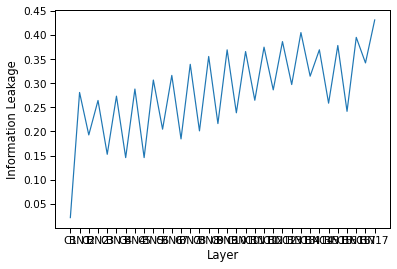

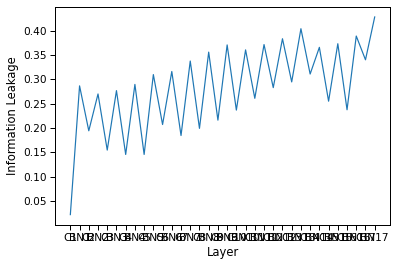

In [420]:
file = '/home2/cboscher/code/pastel2.0/results/layer_leakage_speechcommands.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_inf = {}
results_by_layer_inf['C1'] = abs(aggregated_values['conv1'])
results_by_layer_inf['BN1'] = abs(aggregated_values['bn1'])
results_by_layer_inf['C2'] = abs(aggregated_values['conv2'])
results_by_layer_inf['BN2'] = abs(aggregated_values['bn2'])
results_by_layer_inf['C3'] = abs(aggregated_values['conv3'])
results_by_layer_inf['BN3'] = abs(aggregated_values['bn3'])
results_by_layer_inf['C4'] = abs(aggregated_values['conv4'])
results_by_layer_inf['BN4'] = abs(aggregated_values['bn4'])
results_by_layer_inf['C5'] = abs(aggregated_values['conv4'])
results_by_layer_inf['BN5'] = abs(aggregated_values['bn5'])
results_by_layer_inf['C6'] = abs(aggregated_values['conv6'])
results_by_layer_inf['BN6'] = abs(aggregated_values['bn6'])
results_by_layer_inf['C7'] = abs(aggregated_values['conv7'])
results_by_layer_inf['BN7'] = abs(aggregated_values['bn7'])
results_by_layer_inf['C8'] = abs(aggregated_values['conv8'])
results_by_layer_inf['BN8'] = abs(aggregated_values['bn8'])
results_by_layer_inf['C9'] = abs(aggregated_values['conv9'])
results_by_layer_inf['BN9'] = abs(aggregated_values['bn9'])
results_by_layer_inf['C10'] = abs(aggregated_values['conv10'])
results_by_layer_inf['BN10'] = abs(aggregated_values['bn10'])
results_by_layer_inf['C11'] = abs(aggregated_values['conv11'])
results_by_layer_inf['BN11'] = abs(aggregated_values['bn11'])
results_by_layer_inf['C12'] = abs(aggregated_values['conv12'])
results_by_layer_inf['BN12'] = abs(aggregated_values['bn12'])
results_by_layer_inf['C13'] = abs(aggregated_values['conv13'])
results_by_layer_inf['BN13'] = abs(aggregated_values['bn13'])
results_by_layer_inf['C14'] = abs(aggregated_values['conv16'])
results_by_layer_inf['BN14'] = abs(aggregated_values['bn16'])
results_by_layer_inf['C15'] = abs(aggregated_values['conv15'])
results_by_layer_inf['BN15'] = abs(aggregated_values['bn15'])
results_by_layer_inf['C16'] = abs(aggregated_values['conv14'])
results_by_layer_inf['BN16'] = abs(aggregated_values['bn14'])
results_by_layer_inf['C17'] = abs(aggregated_values['conv17'])
results_by_layer_inf['BN17'] = abs(aggregated_values['bn17'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf = {}
results_by_layer_global_inf['C1'] = abs(global_values['conv1'])
results_by_layer_global_inf['BN1'] = abs(global_values['bn1'])
results_by_layer_global_inf['C2'] = abs(global_values['conv2'])
results_by_layer_global_inf['BN2'] = abs(global_values['bn2'])
results_by_layer_global_inf['C3'] = abs(global_values['conv3'])
results_by_layer_global_inf['BN3'] = abs(global_values['bn3'])
results_by_layer_global_inf['C4'] = abs(global_values['conv4'])
results_by_layer_global_inf['BN4'] = abs(global_values['bn4'])
results_by_layer_global_inf['C5'] = abs(global_values['conv4'])
results_by_layer_global_inf['BN5'] = abs(global_values['bn5'])
results_by_layer_global_inf['C6'] = abs(global_values['conv6'])
results_by_layer_global_inf['BN6'] = abs(global_values['bn6'])
results_by_layer_global_inf['C7'] = abs(global_values['conv7'])
results_by_layer_global_inf['BN7'] = abs(global_values['bn7'])
results_by_layer_global_inf['C8'] = abs(global_values['conv8'])
results_by_layer_global_inf['BN8'] = abs(global_values['bn8'])
results_by_layer_global_inf['C9'] = abs(global_values['conv9'])
results_by_layer_global_inf['BN9'] = abs(global_values['bn9'])
results_by_layer_global_inf['C10'] = abs(global_values['conv10'])
results_by_layer_global_inf['BN10'] = abs(global_values['bn10'])
results_by_layer_global_inf['C11'] = abs(global_values['conv11'])
results_by_layer_global_inf['BN11'] = abs(global_values['bn11'])
results_by_layer_global_inf['C12'] = abs(global_values['conv12'])
results_by_layer_global_inf['BN12'] = abs(global_values['bn12'])
results_by_layer_global_inf['C13'] = abs(global_values['conv13'])
results_by_layer_global_inf['BN13'] = abs(global_values['bn13'])
results_by_layer_global_inf['C14'] = abs(global_values['conv16'])
results_by_layer_global_inf['BN14'] = abs(global_values['bn16'])
results_by_layer_global_inf['C15'] = abs(global_values['conv15'])
results_by_layer_global_inf['BN15'] = abs(global_values['bn15'])
results_by_layer_global_inf['C16'] = abs(global_values['conv14'])
results_by_layer_global_inf['BN16'] = abs(global_values['bn14'])
results_by_layer_global_inf['C17'] = abs(global_values['conv17'])
results_by_layer_global_inf['BN17'] = abs(global_values['bn17'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_speechcommands.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_speechcommands_global.pdf')
plt.show()

{'conv1': 0.021791952, 'bn1': 0.28112084, 'conv2': 0.19359113, 'bn2': 0.26186058, 'conv3': 0.15345016, 'bn3': 0.26819614, 'conv4': 0.1442299, 'bn4': 0.28279185, 'conv5': 0.15876856, 'bn5': 0.30741623, 'conv6': 0.19733046, 'bn6': 0.3171986, 'conv7': 0.18283254, 'bn7': 0.33666083, 'conv8': 0.19709934, 'bn8': 0.35076228, 'conv9': 0.21379739, 'bn9': 0.36769816, 'conv10': 0.23258993, 'bn10': 0.36090666, 'conv11': 0.2596174, 'bn11': 0.36851126, 'conv12': 0.28116837, 'bn12': 0.38382435, 'conv13': 0.29441792, 'bn13': 0.40215677, 'conv16': 0.3111991, 'bn16': 0.36690706, 'conv15': 0.2598728, 'bn15': 0.37991026, 'conv14': 0.24315654, 'bn14': 0.39687032, 'conv17': 0.339689, 'bn17': 0.4274545}
{'conv1': 0.020953704, 'bn1': 0.2842177, 'conv2': 0.19086187, 'bn2': 0.25829002, 'conv3': 0.15106088, 'bn3': 0.27676868, 'conv4': 0.14539237, 'bn4': 0.2965413, 'conv5': 0.16409102, 'bn5': 0.3094196, 'conv6': 0.20470054, 'bn6': 0.31755233, 'conv7': 0.18715258, 'bn7': 0.34325233, 'conv8': 0.20318305, 'bn8': 0.3

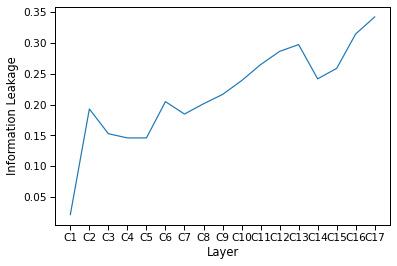

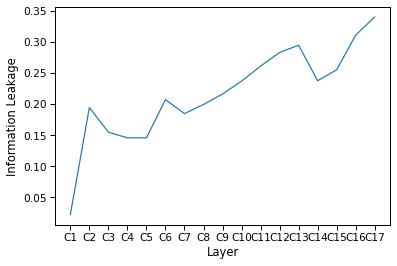

In [421]:
file = '/home2/cboscher/code/pastel2.0/results/layer_leakage_speechcommands.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_inf = {}
results_by_layer_inf['C1'] = abs(aggregated_values['conv1'])
results_by_layer_inf['C2'] = abs(aggregated_values['conv2'])
results_by_layer_inf['C3'] = abs(aggregated_values['conv3'])
results_by_layer_inf['C4'] = abs(aggregated_values['conv4'])
results_by_layer_inf['C5'] = abs(aggregated_values['conv4'])
results_by_layer_inf['C6'] = abs(aggregated_values['conv6'])
results_by_layer_inf['C7'] = abs(aggregated_values['conv7'])
results_by_layer_inf['C8'] = abs(aggregated_values['conv8'])
results_by_layer_inf['C9'] = abs(aggregated_values['conv9'])
results_by_layer_inf['C10'] = abs(aggregated_values['conv10'])
results_by_layer_inf['C11'] = abs(aggregated_values['conv11'])
results_by_layer_inf['C12'] = abs(aggregated_values['conv12'])
results_by_layer_inf['C13'] = abs(aggregated_values['conv13'])
results_by_layer_inf['C14'] = abs(aggregated_values['conv14'])
results_by_layer_inf['C15'] = abs(aggregated_values['conv15'])
results_by_layer_inf['C16'] = abs(aggregated_values['conv16'])
results_by_layer_inf['C17'] = abs(aggregated_values['conv17'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf = {}
results_by_layer_global_inf['C1'] = abs(global_values['conv1'])
results_by_layer_global_inf['C2'] = abs(global_values['conv2'])
results_by_layer_global_inf['C3'] = abs(global_values['conv3'])
results_by_layer_global_inf['C4'] = abs(global_values['conv4'])
results_by_layer_global_inf['C5'] = abs(global_values['conv4'])
results_by_layer_global_inf['C6'] = abs(global_values['conv6'])
results_by_layer_global_inf['C7'] = abs(global_values['conv7'])
results_by_layer_global_inf['C8'] = abs(global_values['conv8'])
results_by_layer_global_inf['C9'] = abs(global_values['conv9'])
results_by_layer_global_inf['C10'] = abs(global_values['conv10'])
results_by_layer_global_inf['C11'] = abs(global_values['conv11'])
results_by_layer_global_inf['C12'] = abs(global_values['conv12'])
results_by_layer_global_inf['C13'] = abs(global_values['conv13'])
results_by_layer_global_inf['C14'] = abs(global_values['conv14'])
results_by_layer_global_inf['C15'] = abs(global_values['conv15'])
results_by_layer_global_inf['C16'] = abs(global_values['conv16'])
results_by_layer_global_inf['C17'] = abs(global_values['conv17'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_speechcommands_global_conv.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_speechcommands_global_conv.pdf')
plt.show()

{'conv1': 0.021791952, 'bn1': 0.28112084, 'conv2': 0.19359113, 'bn2': 0.26186058, 'conv3': 0.15345016, 'bn3': 0.26819614, 'conv4': 0.1442299, 'bn4': 0.28279185, 'conv5': 0.15876856, 'bn5': 0.30741623, 'conv6': 0.19733046, 'bn6': 0.3171986, 'conv7': 0.18283254, 'bn7': 0.33666083, 'conv8': 0.19709934, 'bn8': 0.35076228, 'conv9': 0.21379739, 'bn9': 0.36769816, 'conv10': 0.23258993, 'bn10': 0.36090666, 'conv11': 0.2596174, 'bn11': 0.36851126, 'conv12': 0.28116837, 'bn12': 0.38382435, 'conv13': 0.29441792, 'bn13': 0.40215677, 'conv16': 0.3111991, 'bn14': 0.36690706, 'conv15': 0.2598728, 'bn15': 0.37991026, 'conv14': 0.24315654, 'bn16': 0.39687032, 'conv17': 0.339689, 'bn17': 0.4274545}
{'conv1': 0.020953704, 'bn1': 0.2842177, 'conv2': 0.19086187, 'bn2': 0.25829002, 'conv3': 0.15106088, 'bn3': 0.27676868, 'conv4': 0.14539237, 'bn4': 0.2965413, 'conv5': 0.16409102, 'bn5': 0.3094196, 'conv6': 0.20470054, 'bn6': 0.31755233, 'conv7': 0.18715258, 'bn7': 0.34325233, 'conv8': 0.20318305, 'bn8': 0.3

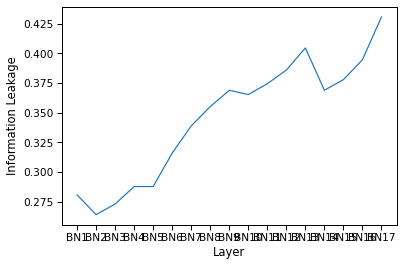

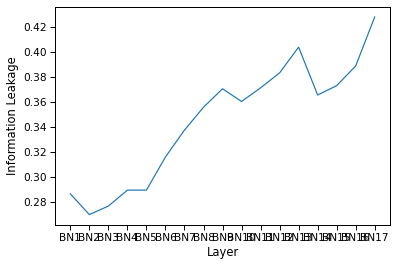

In [423]:
file = '/home2/cboscher/code/pastel2.0/results/layer_leakage_speechcommands.csv'
df = pd.read_csv(file)
column_name = 'client_layer_leakage'
columns_to_aggregate = df.columns[df.columns.str.contains(column_name)]

client_values = []
for column in columns_to_aggregate:
    print(str(df[column][-1:].values[0]))
    client_values.append(eval(str(df[column][-1:].values[0]).replace('inf', '0')))


aggregated_values = {}
for key in client_values[0].keys():
    values = []
    for client in client_values:
        try :
            values.append(client[key])
        except:
            continue
    aggregated_values[key] = sum(values)/len(values)
    
    
aggregated_values

results_by_layer_inf = {}
results_by_layer_inf['BN1'] = abs(aggregated_values['bn1'])
results_by_layer_inf['BN2'] = abs(aggregated_values['bn2'])
results_by_layer_inf['BN3'] = abs(aggregated_values['bn3'])
results_by_layer_inf['BN4'] = abs(aggregated_values['bn4'])
results_by_layer_inf['BN5'] = abs(aggregated_values['bn4'])
results_by_layer_inf['BN6'] = abs(aggregated_values['bn6'])
results_by_layer_inf['BN7'] = abs(aggregated_values['bn7'])
results_by_layer_inf['BN8'] = abs(aggregated_values['bn8'])
results_by_layer_inf['BN9'] = abs(aggregated_values['bn9'])
results_by_layer_inf['BN10'] = abs(aggregated_values['bn10'])
results_by_layer_inf['BN11'] = abs(aggregated_values['bn11'])
results_by_layer_inf['BN12'] = abs(aggregated_values['bn12'])
results_by_layer_inf['BN13'] = abs(aggregated_values['bn13'])
results_by_layer_inf['BN14'] = abs(aggregated_values['bn14'])
results_by_layer_inf['BN15'] = abs(aggregated_values['bn15'])
results_by_layer_inf['BN16'] = abs(aggregated_values['bn16'])
results_by_layer_inf['BN17'] = abs(aggregated_values['bn17'])

global_values = eval(str(df['server_layer_leakage'][-1:].values[0]).replace('nan', '0'))
results_by_layer_global_inf = {}

results_by_layer_global_inf = {}
results_by_layer_global_inf['BN1'] = abs(global_values['bn1'])
results_by_layer_global_inf['BN2'] = abs(global_values['bn2'])
results_by_layer_global_inf['BN3'] = abs(global_values['bn3'])
results_by_layer_global_inf['BN4'] = abs(global_values['bn4'])
results_by_layer_global_inf['BN5'] = abs(global_values['bn4'])
results_by_layer_global_inf['BN6'] = abs(global_values['bn6'])
results_by_layer_global_inf['BN7'] = abs(global_values['bn7'])
results_by_layer_global_inf['BN8'] = abs(global_values['bn8'])
results_by_layer_global_inf['BN9'] = abs(global_values['bn9'])
results_by_layer_global_inf['BN10'] = abs(global_values['bn10'])
results_by_layer_global_inf['BN11'] = abs(global_values['bn11'])
results_by_layer_global_inf['BN12'] = abs(global_values['bn12'])
results_by_layer_global_inf['BN13'] = abs(global_values['bn13'])
results_by_layer_global_inf['BN14'] = abs(global_values['bn14'])
results_by_layer_global_inf['BN15'] = abs(global_values['bn15'])
results_by_layer_global_inf['BN16'] = abs(global_values['bn16'])
results_by_layer_global_inf['BN17'] = abs(global_values['bn17'])

ax = sns.lineplot(x=results_by_layer_inf.keys(), y=results_by_layer_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_speechcommands_global_bn.pdf')
plt.show()

ax = sns.lineplot(x=results_by_layer_global_inf.keys(), y=results_by_layer_global_inf.values())
ax.set_xlabel("Layer")
ax.set_ylabel("Information Leakage")
plt.savefig('/home2/cboscher/code/pastel2.0/results/figures/latent_jenssen_speechcommands_global_bn.pdf')
plt.show()

In [47]:
plot_config = {
                "dataset_name": "cifar10_resnet_dp",
                "dataset_pretty_name" : "Speech Commands",

                "data":[
                                                                            {
                            "exp_name" : "PASTEL",
                            "file_path": "ppm_cdp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        },
                                                         {
                            "exp_name" : "PASTEL-L",
                            "file_path": "ppm_cdp_celeba_resnet.csv",
                            "color": "black",
                            "symbol" : "+"
                        }
                           
                    ]
                }
            


[]
Labels
['PASTEL', 'PASTEL-L']
[50.4, 50]
None


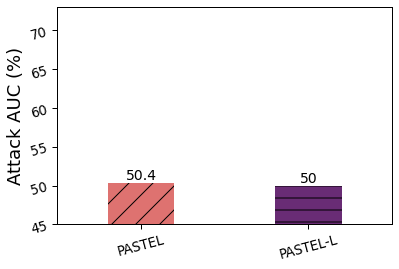

[]
Labels
['PASTEL', 'PASTEL-L']
[50.9, 50]
None


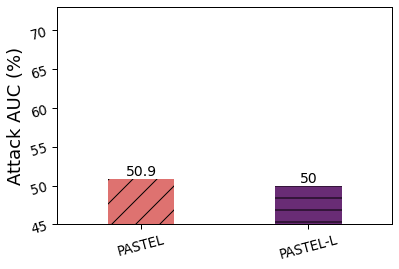

[]
Labels
['PASTEL', 'PASTEL-L']
[68.9, 69.8]
None


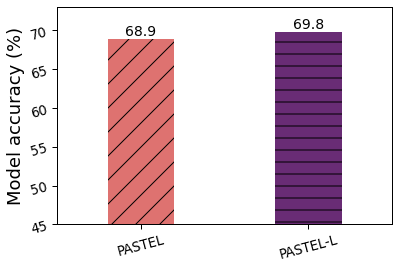

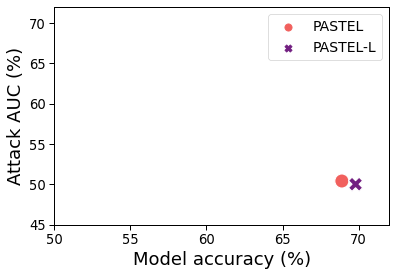

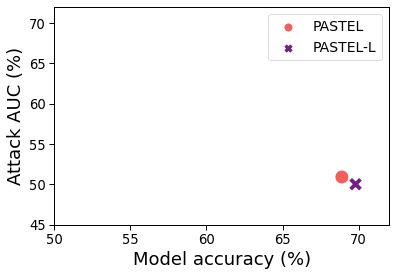

In [49]:
local_auc_values = [50.4,50]
global_auc_values = [50.9,50]

accuracy_values = [68.9, 69.8]
generate_manual_histogram(plot_config, "local_model_attack_accuracy_hist", "Attack AUC (%)", "client_attack", 45, 73, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10/ex',average=True, values=local_auc_values)
generate_manual_histogram(plot_config, "global_model_attack_accuracy_hist", "Attack AUC (%)", "server_attack", 45, 73,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10/ex', average=True, values= global_auc_values)
generate_manual_histogram(plot_config, "local_models_accuracy_hist", "Model accuracy (%)", "server_attack", 45, 73,'/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10/ex', average=True, values= accuracy_values)

generate_tradeoff_manual_plot(plot_config, 'attack_accuracy_tradeoff_client', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'client_attack', 45, 72, 50, 72, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10/ex',average=True, x_values = accuracy_values, y_values=local_auc_values)
generate_tradeoff_manual_plot(plot_config, 'attack_accuracy_tradeoff_server', 'Model accuracy (%)', 'Attack AUC (%)', 'client_accuracy', 'server_attack', 45, 72, 50, 72, '/Users/tima/Documents/Papers/ubicomp-2023-pastel-extended/Figures/DP/Cifar10/ex',average=True, x_values = accuracy_values, y_values=global_auc_values)
